In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import requests

In [4]:
page = requests.get("https://www.worldometers.info/coronavirus/")
df = pd.read_html(page.content)

ValueError: No tables found matching pattern '.+'

In [65]:
data = pd.read_csv("full_data.csv")

In [6]:
data.head()

date     location  new_cases  new_deaths  total_cases  total_deaths
0  2019-12-31  Afghanistan          0           0            0             0
1  2020-01-01  Afghanistan          0           0            0             0
2  2020-01-02  Afghanistan          0           0            0             0
3  2020-01-03  Afghanistan          0           0            0             0
4  2020-01-04  Afghanistan          0           0            0             0

In [7]:
data.shape

(22335, 6)

In [8]:
data.tail()

date  location  new_cases  new_deaths  total_cases  total_deaths
22330  2020-06-04  Zimbabwe         16           0          222             4
22331  2020-06-05  Zimbabwe         15           0          237             4
22332  2020-06-06  Zimbabwe         28           0          265             4
22333  2020-06-07  Zimbabwe         14           0          279             4
22334  2020-06-08  Zimbabwe          3           0          282             4

In [12]:
page = requests.get("https://www.mygov.in/corona-data/covid19-statewise-status")
data = pd.read_html(page.content)

ValueError: No tables found

In [13]:
data['location'].value_counts()

Denmark           161
Brazil            161
Iran              161
World             161
Iceland           161
                 ... 
Yemen              60
Western Sahara     44
Tajikistan         39
Comoros            38
Lesotho            25
Name: location, Length: 211, dtype: int64

In [15]:
#the ranking of contries according to their total cases

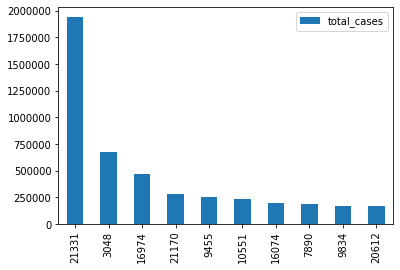

In [20]:
data[data['date']=='2020-06-08'].sort_values(by='total_cases',ascending=False)[['location','total_cases']][1:11].plot(kind="bar")

In [21]:
plt.rcParams['figure.figsize'] = 12,7
plt.rcParams['xtick.color'] = "red"
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.color'] = "#EDFF33"
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelcolor'] = "coral"
plt.rcParams['axes.labelsize'] = 25

In [22]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [23]:
plt.style.use('seaborn-ticks')

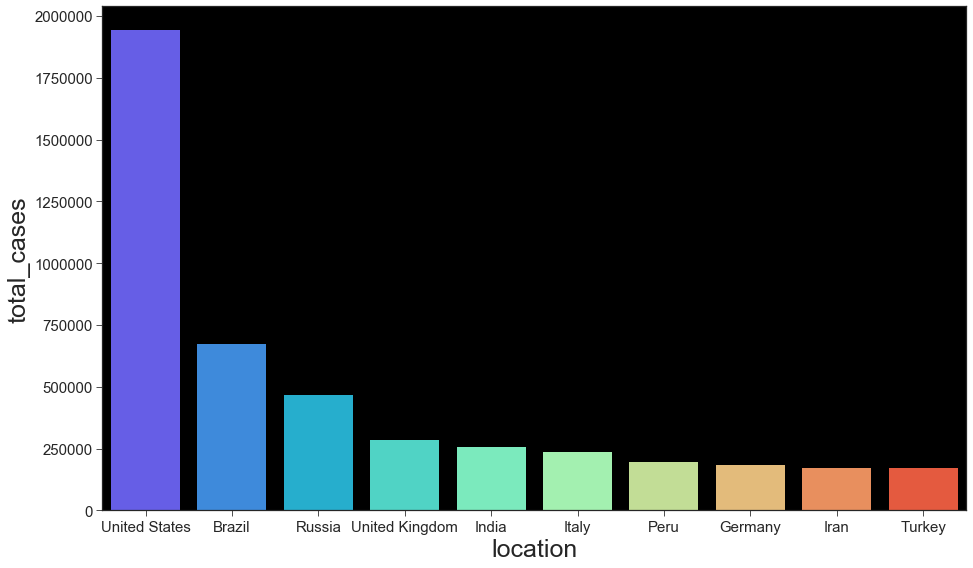

In [26]:
new= data[data['date']=='2020-06-08'].sort_values(by='total_cases',ascending=False)[['location','total_cases']][1:11]
label = new['location']
cases = new['total_cases']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1],facecolor="black")
sns.barplot(label,cases,ax=ax,palette="rainbow")
plt.show()

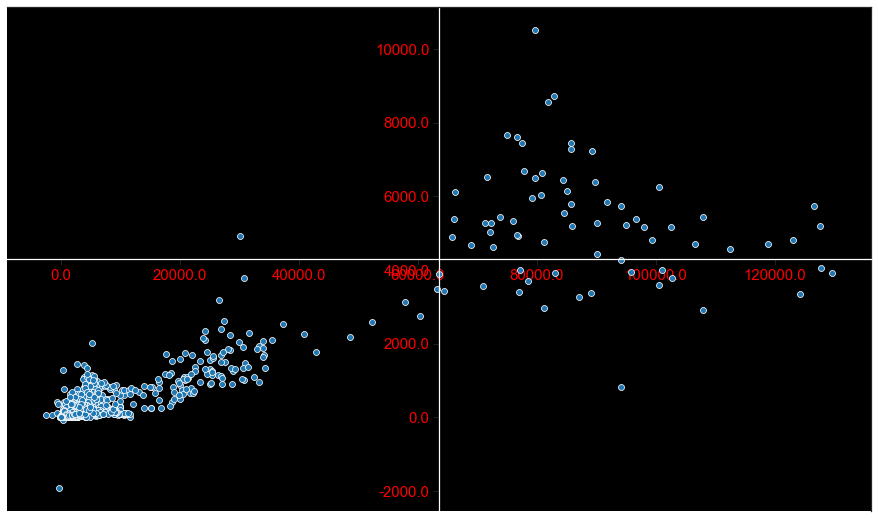

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1],facecolor="black")
sns.scatterplot(data['new_cases'],data['new_deaths'])
for sp in ["left","bottom"]:
    ax.spines[sp].set_position(('axes',0.5))
    ax.spines[sp].set_color("white")
ax.set_xticklabels(ax.get_xticks(),color="red")
ax.set_yticklabels(ax.get_yticks(),color="red")
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

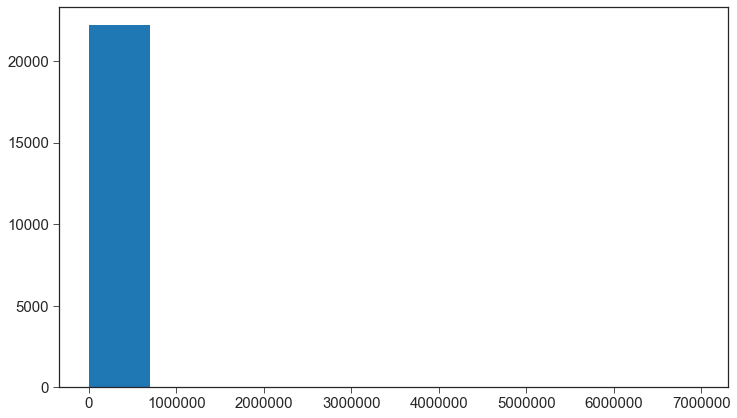

In [41]:
plt.hist(data["total_cases"])
plt.show()

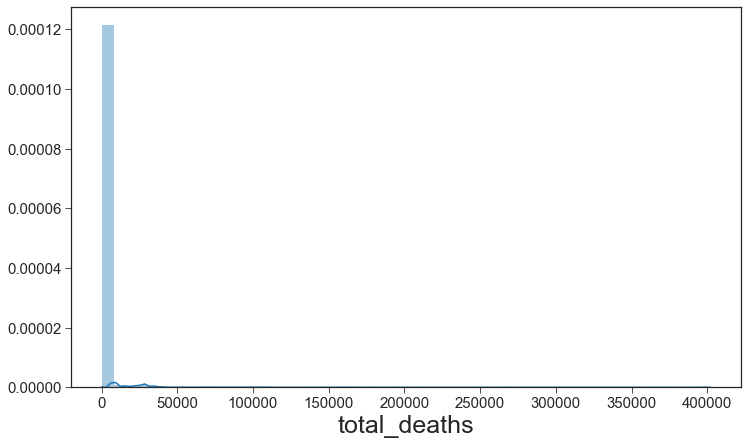

In [44]:
sns.distplot(data['total_deaths'])

In [46]:
data.head()

date     location  new_cases  new_deaths  total_cases  total_deaths
0  2019-12-31  Afghanistan          0           0            0             0
1  2020-01-01  Afghanistan          0           0            0             0
2  2020-01-02  Afghanistan          0           0            0             0
3  2020-01-03  Afghanistan          0           0            0             0
4  2020-01-04  Afghanistan          0           0            0             0

In [48]:
data.groupby("location").count()

date  new_cases  new_deaths  total_cases  total_deaths
location                                                              
Afghanistan      151        151         151          151           151
Albania           92         92          92           92            92
Algeria          156        156         156          156           156
Andorra           87         87          87           87            87
Angola            79         79          79           79            79
...              ...        ...         ...          ...           ...
Western Sahara    44         44          44           44            44
World            161        161         161          161           161
Yemen             60         60          60           60            60
Zambia            82         82          82           82            82
Zimbabwe          80         80          80           80            80

[211 rows x 5 columns]

In [49]:
#remove the rows whose all values are 0
#cleaning

#### Cleaning

In [76]:
for i in range(data.shape[0]):
    for j in ["new_cases","new_deaths","total_cases","total_deaths"]:
        if data.loc[i,j] == 0:
            pass
        elif data.loc[i,j] != 0:
            break
    else:
        data.drop(i,inplace=True)

In [63]:
data.drop(1,inplace=True)

In [64]:
data

date     location  new_cases  new_deaths  total_cases  \
0      2019-12-31  Afghanistan          0           0            0   
2      2020-01-02  Afghanistan          0           0            0   
3      2020-01-03  Afghanistan          0           0            0   
4      2020-01-04  Afghanistan          0           0            0   
5      2020-01-05  Afghanistan          0           0            0   
...           ...          ...        ...         ...          ...   
22330  2020-06-04     Zimbabwe         16           0          222   
22331  2020-06-05     Zimbabwe         15           0          237   
22332  2020-06-06     Zimbabwe         28           0          265   
22333  2020-06-07     Zimbabwe         14           0          279   
22334  2020-06-08     Zimbabwe          3           0          282   

       total_deaths  
0                 0  
2                 0  
3                 0  
4                 0  
5                 0  
...             ...  
22330             4  
22331             4  
22332             4  
22333             4  
22334             4  

[22334 rows x 6 columns]

In [77]:
data.shape

(19324, 6)

In [78]:
data

date     location  new_cases  new_deaths  total_cases  \
56     2020-02-25  Afghanistan          1           0            1   
57     2020-02-26  Afghanistan          0           0            1   
58     2020-02-27  Afghanistan          0           0            1   
59     2020-02-28  Afghanistan          0           0            1   
60     2020-02-29  Afghanistan          0           0            1   
...           ...          ...        ...         ...          ...   
22330  2020-06-04     Zimbabwe         16           0          222   
22331  2020-06-05     Zimbabwe         15           0          237   
22332  2020-06-06     Zimbabwe         28           0          265   
22333  2020-06-07     Zimbabwe         14           0          279   
22334  2020-06-08     Zimbabwe          3           0          282   

       total_deaths  
56                0  
57                0  
58                0  
59                0  
60                0  
...             ...  
22330             4  
22331             4  
22332             4  
22333             4  
22334             4  

[19324 rows x 6 columns]

In [72]:
data.loc[0,"location"]

'Afghanistan'

In [81]:
data.reindex()

date     location  new_cases  new_deaths  total_cases  \
56     2020-02-25  Afghanistan          1           0            1   
57     2020-02-26  Afghanistan          0           0            1   
58     2020-02-27  Afghanistan          0           0            1   
59     2020-02-28  Afghanistan          0           0            1   
60     2020-02-29  Afghanistan          0           0            1   
...           ...          ...        ...         ...          ...   
22330  2020-06-04     Zimbabwe         16           0          222   
22331  2020-06-05     Zimbabwe         15           0          237   
22332  2020-06-06     Zimbabwe         28           0          265   
22333  2020-06-07     Zimbabwe         14           0          279   
22334  2020-06-08     Zimbabwe          3           0          282   

       total_deaths  
56                0  
57                0  
58                0  
59                0  
60                0  
...             ...  
22330             4  
22331             4  
22332             4  
22333             4  
22334             4  

[19324 rows x 6 columns]

In [84]:
india = data[data['location'] == "India"]

In [85]:
india

date location  new_cases  new_deaths  total_cases  total_deaths
9326  2020-01-30    India          1           0            1             0
9327  2020-01-31    India          0           0            1             0
9328  2020-02-01    India          0           0            1             0
9329  2020-02-02    India          1           0            2             0
9330  2020-02-03    India          0           0            2             0
...          ...      ...        ...         ...          ...           ...
9451  2020-06-04    India       9304         260       216919          6075
9452  2020-06-05    India       9851         273       226770          6348
9453  2020-06-06    India       9887         294       236657          6642
9454  2020-06-07    India       9971         287       246628          6929
9455  2020-06-08    India       9983         206       256611          7135

[130 rows x 6 columns]

In [101]:
n = india[india['date'].apply(lambda x : True if x.split("-")[1] in ["05","06"] else False)][['date','total_cases']]

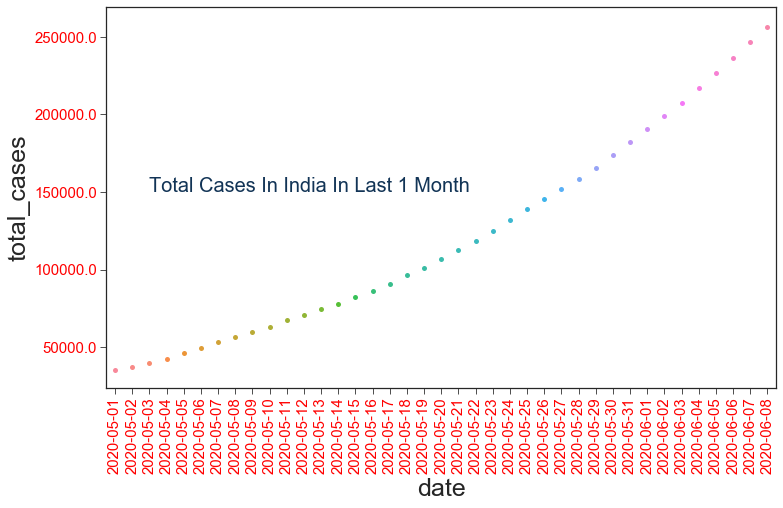

In [105]:
fig,ax = plt.subplots(1,1)
sns.swarmplot(n['date'],n['total_cases'],ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,color="red")
ax.set_yticklabels(ax.get_yticks(),color="red")
ax.text(2,150000,"Total Cases In India In Last 1 Month",color="#123456",fontsize=20)
plt.show()

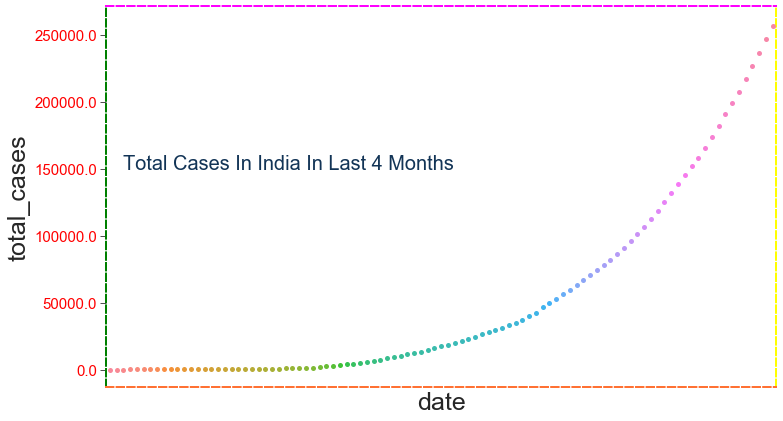

In [108]:
n = india[india['date'].apply(lambda x : True if x.split("-")[1] in ["03","04","05","06"] else False)][['date','total_cases']]
fig,ax = plt.subplots(1,1)
sns.swarmplot(n['date'],n['total_cases'],ax=ax)
ax.set_xticks([])
ax.set_yticklabels(ax.get_yticks(),color="red")
ax.text(2,150000,"Total Cases In India In Last 4 Months",color="#123456",fontsize=20)
ax.spines["left"].set_color("green")
ax.spines["right"].set_color("yellow")
ax.spines["top"].set_color("magenta")
ax.spines["bottom"].set_color("#FF7133")
for sp in ["left","right","top","bottom"]:
    ax.spines[sp].set_linewidth(2)
    ax.spines[sp].set_linestyle("--")
plt.show()

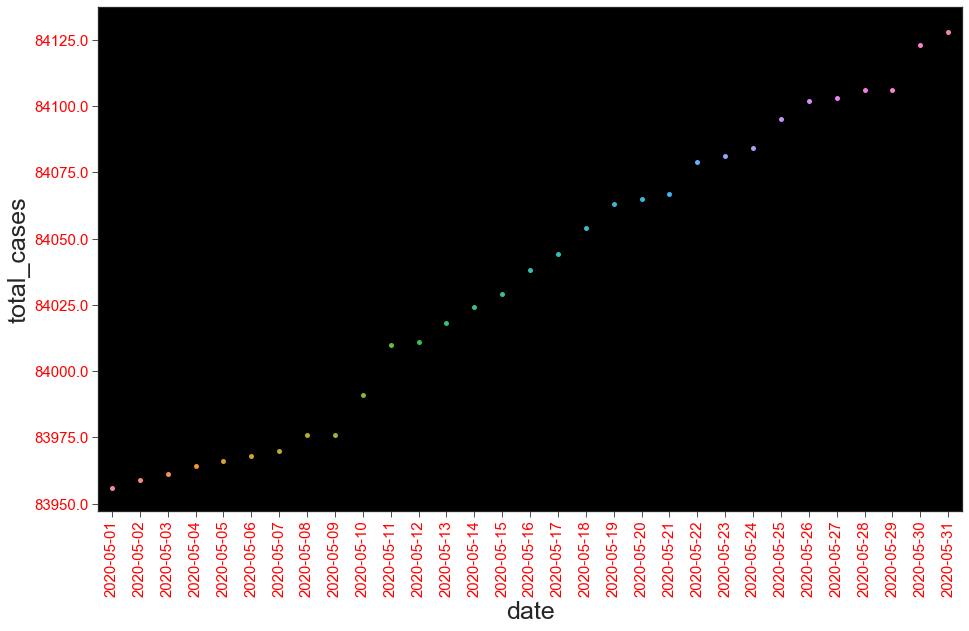

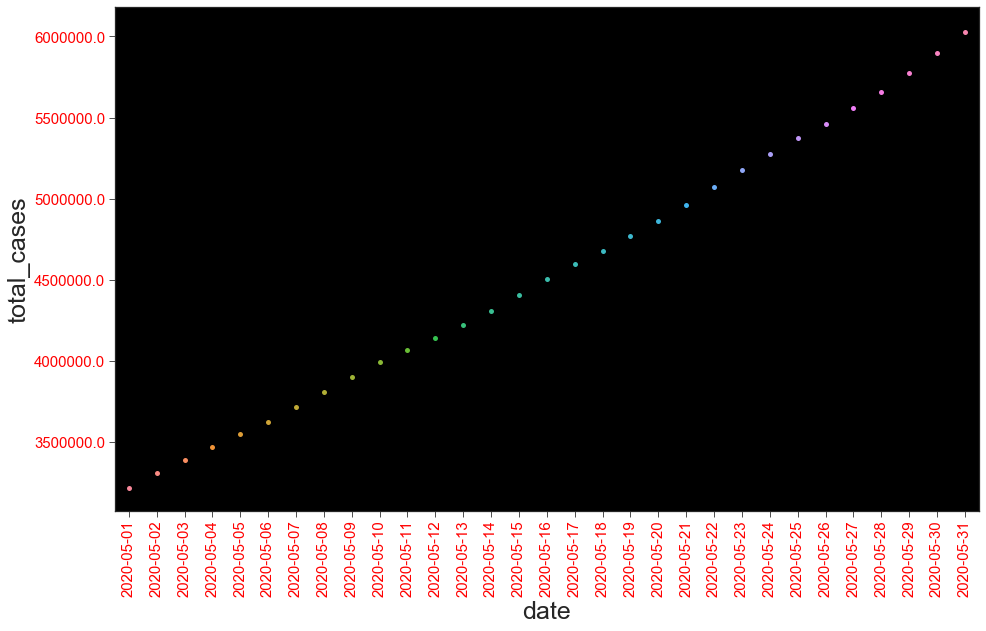

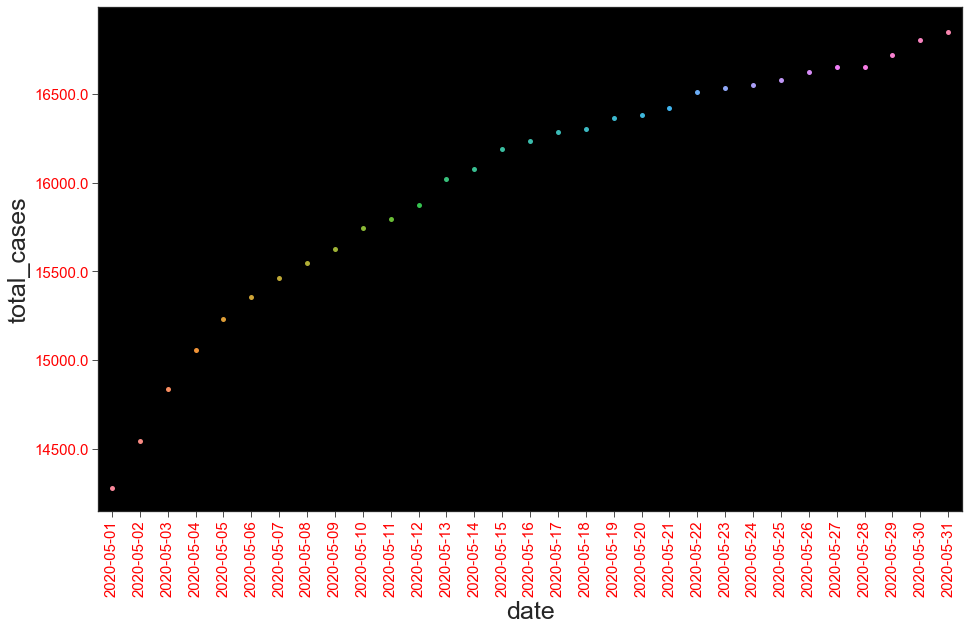

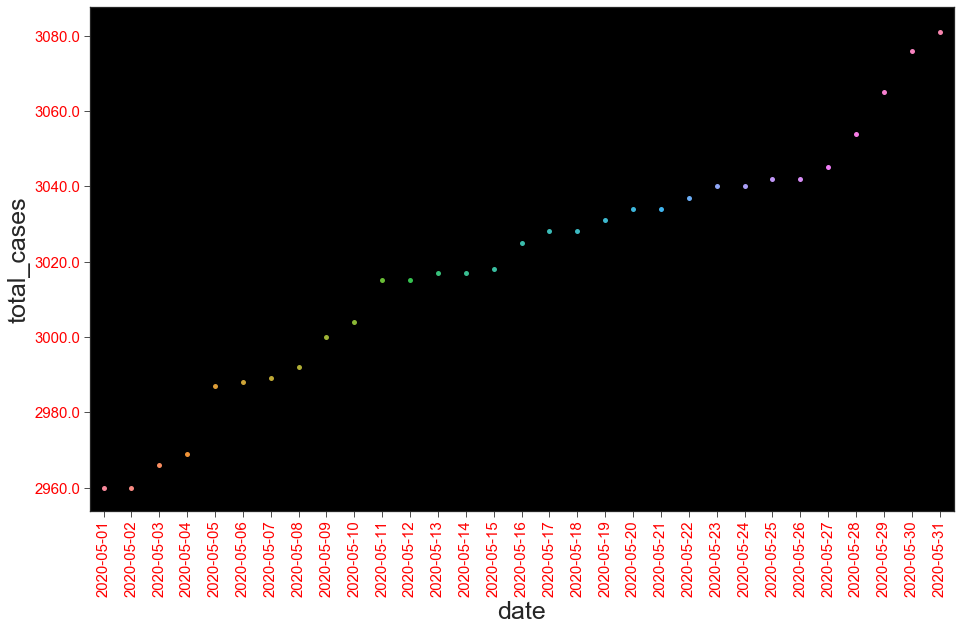

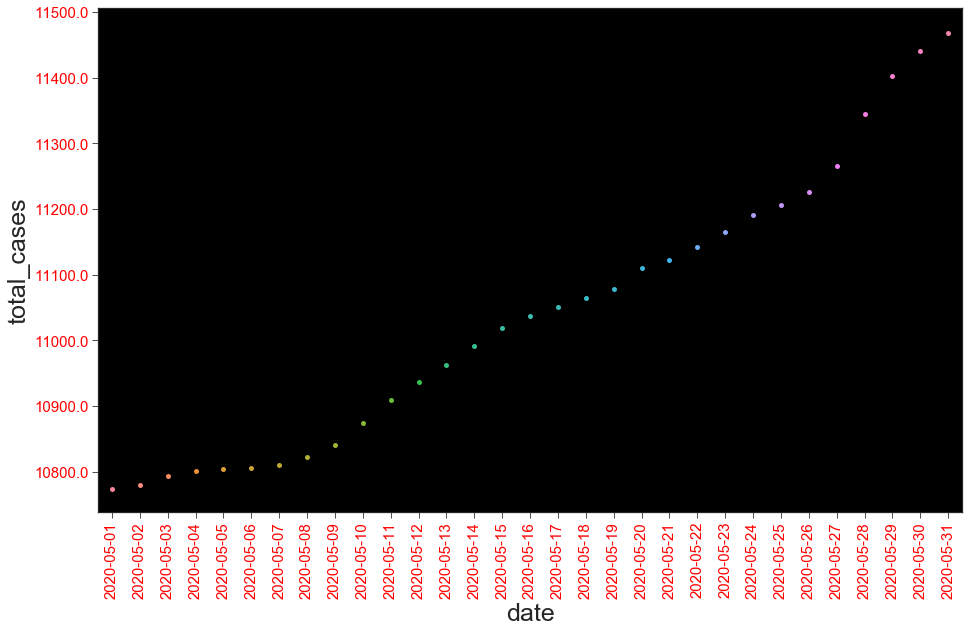

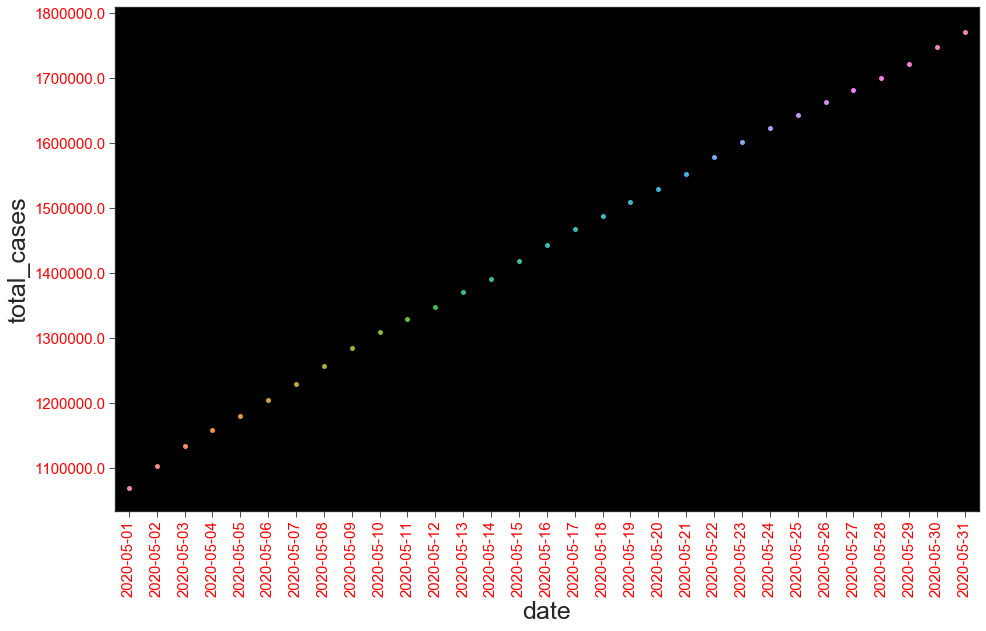

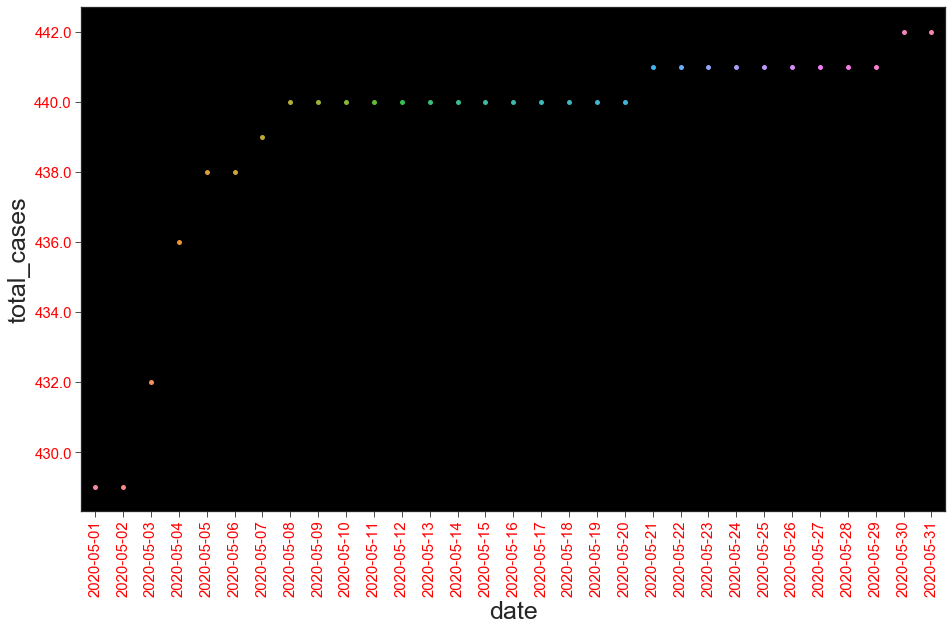

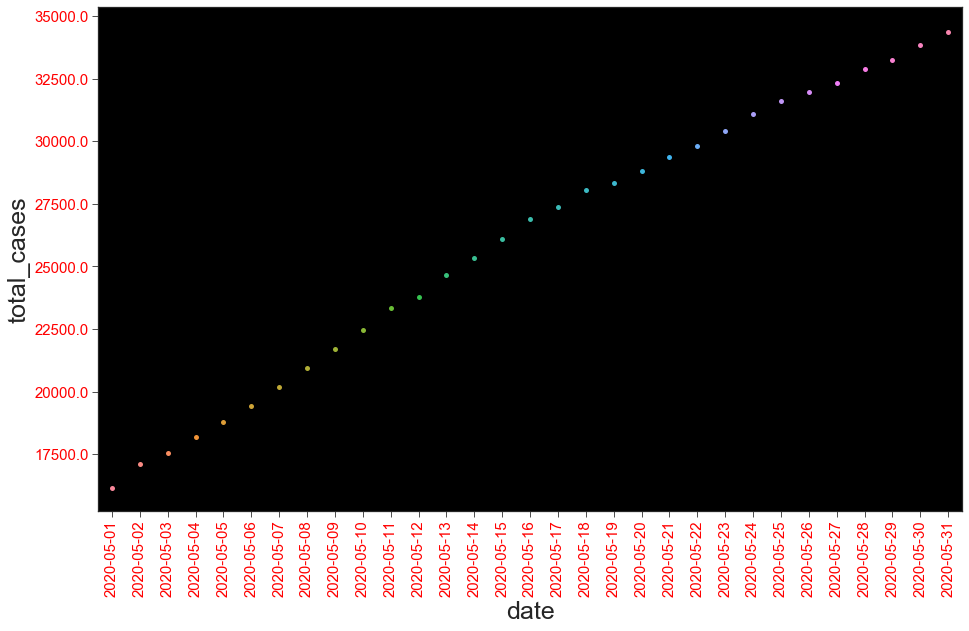

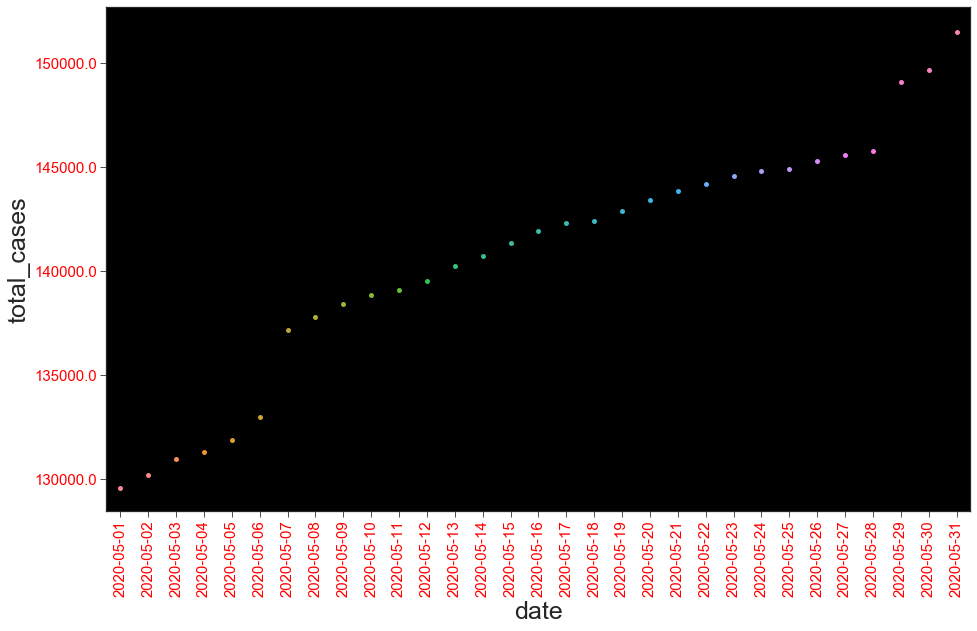

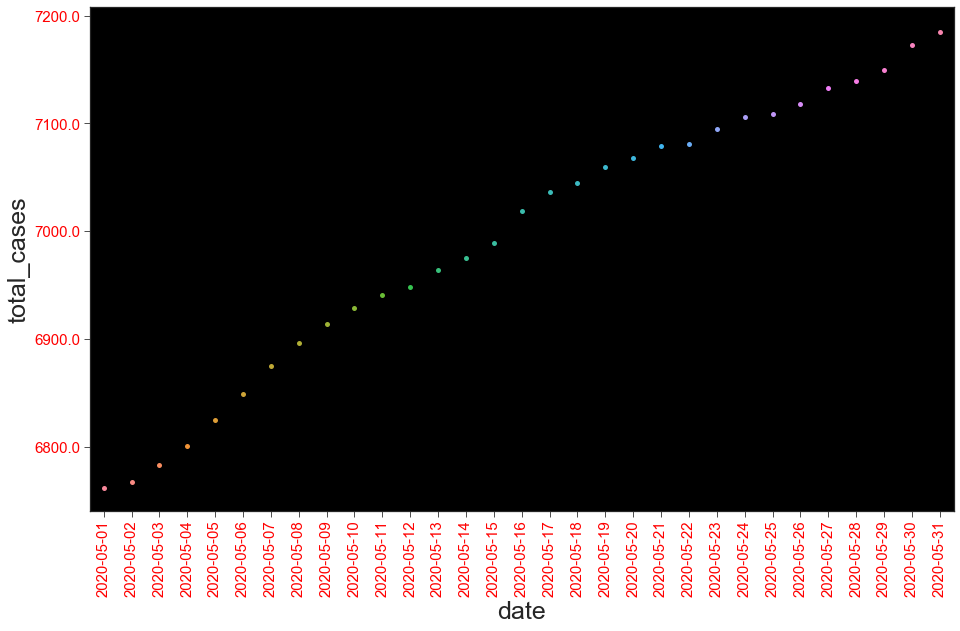

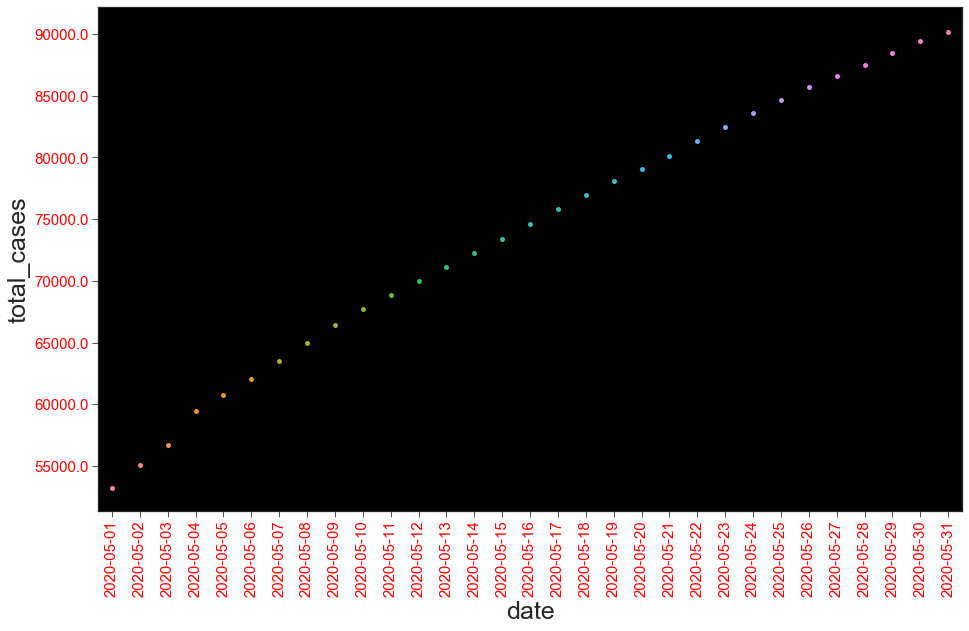

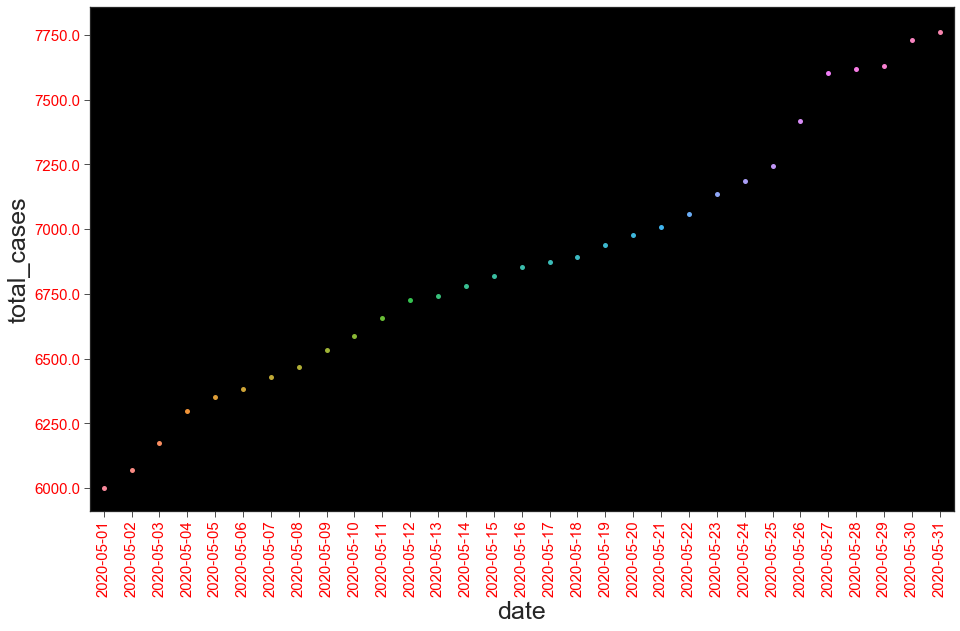

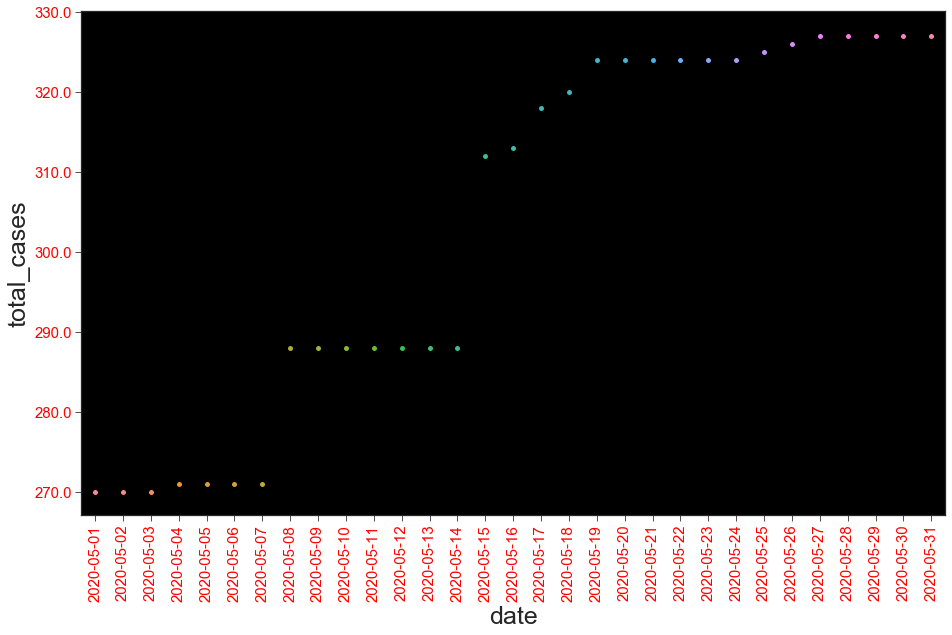

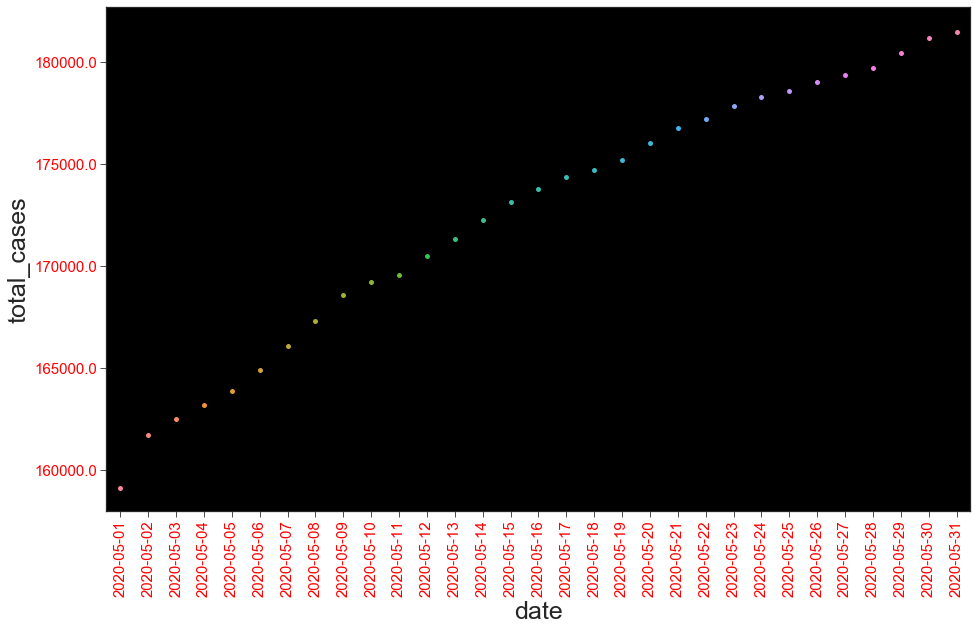

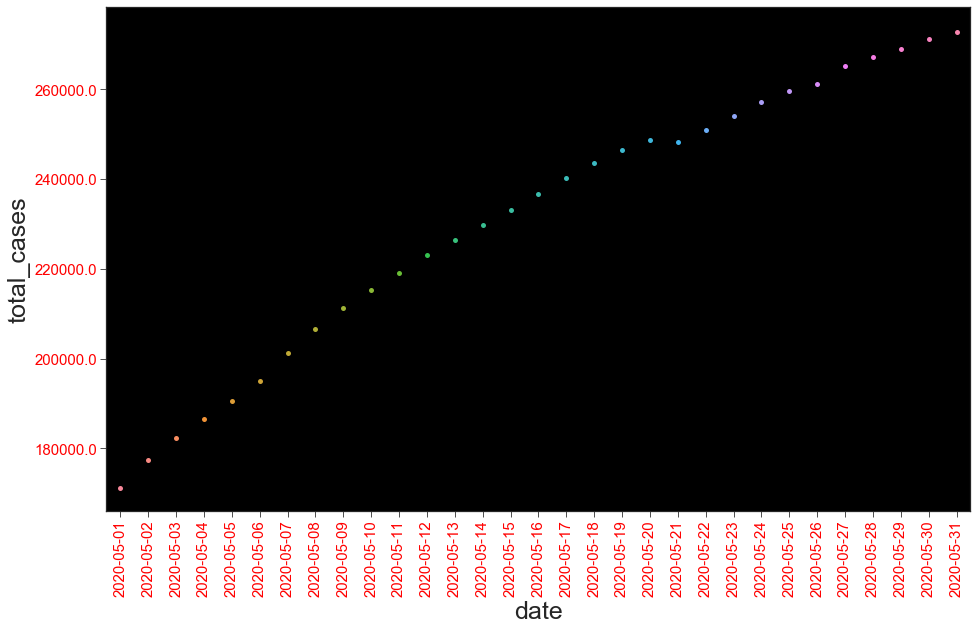

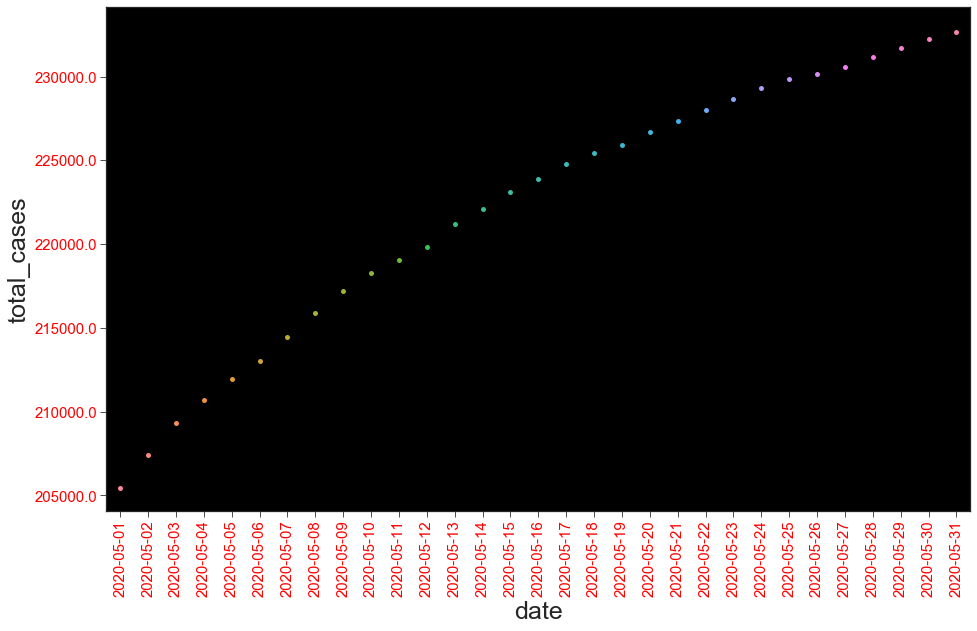

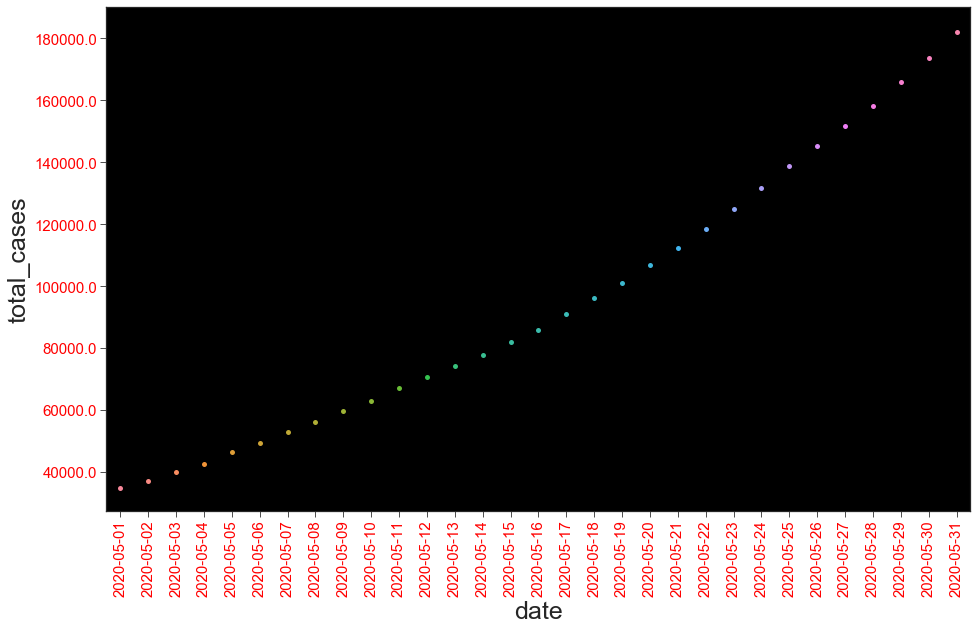

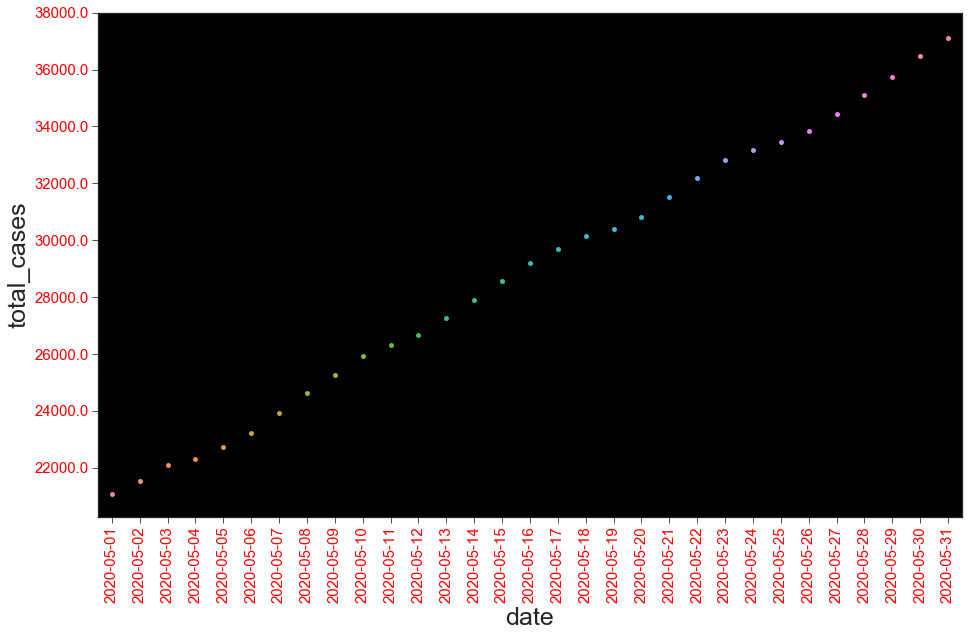

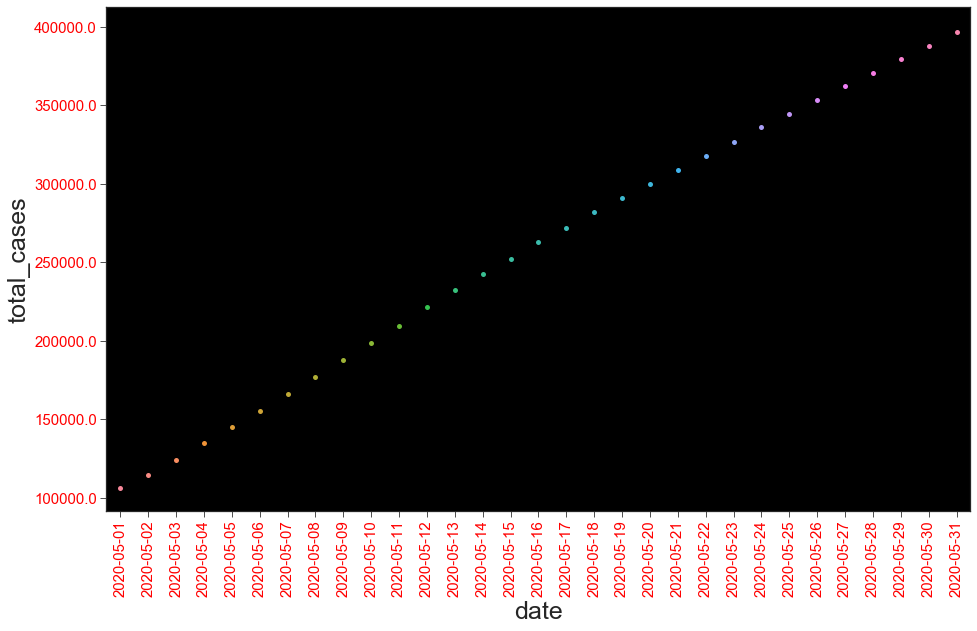

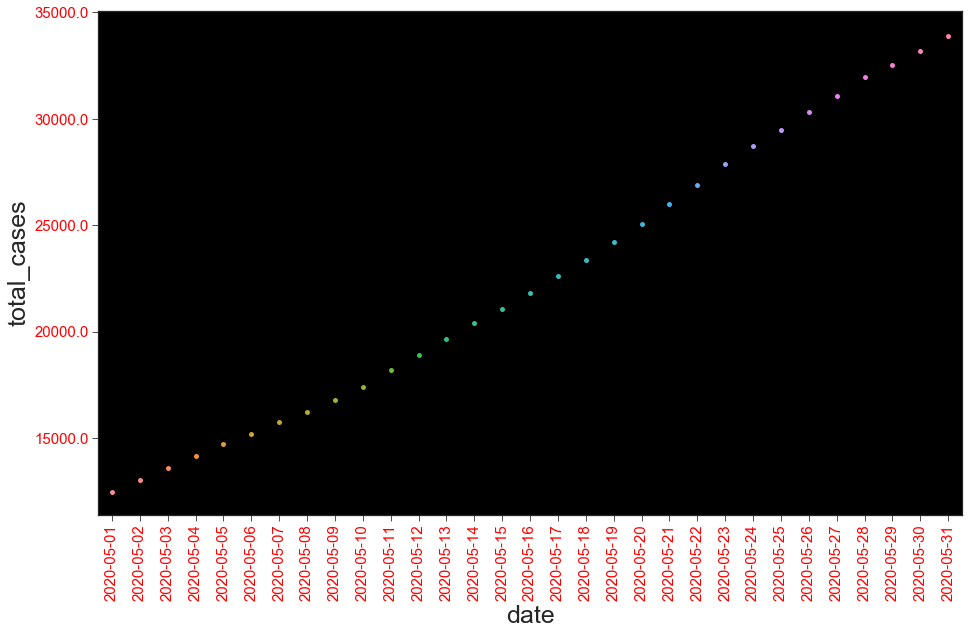

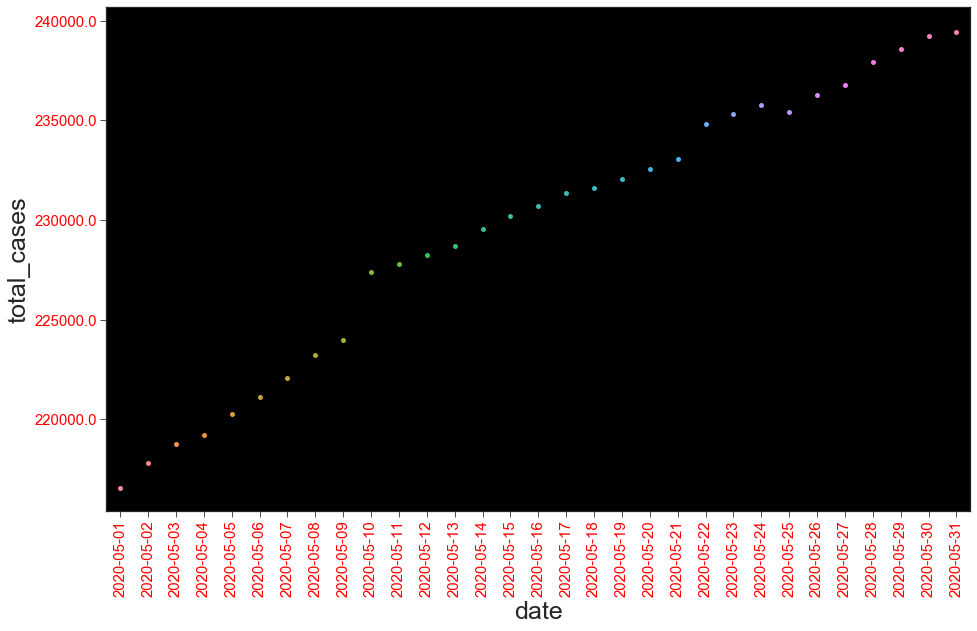

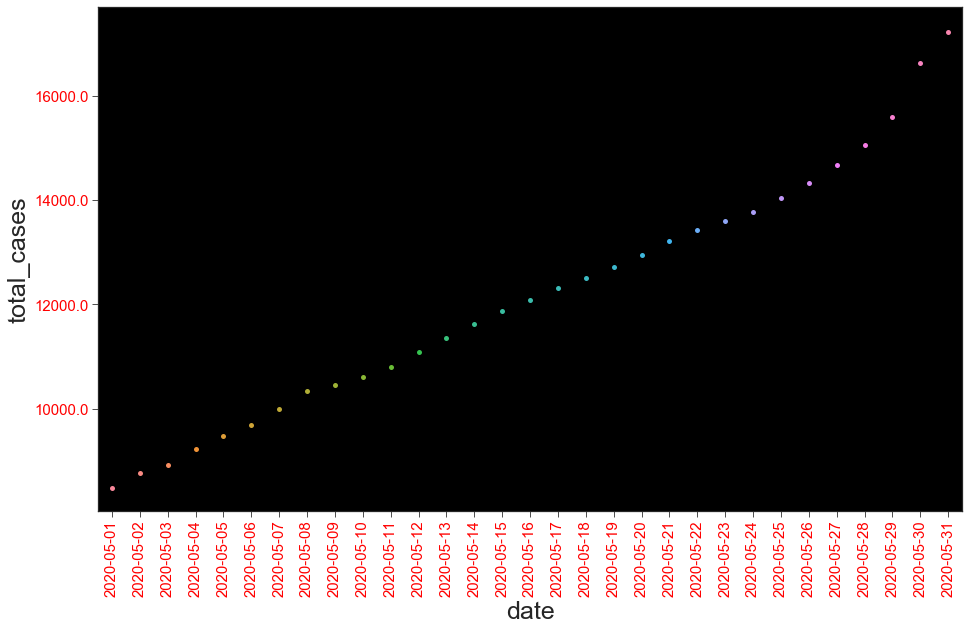

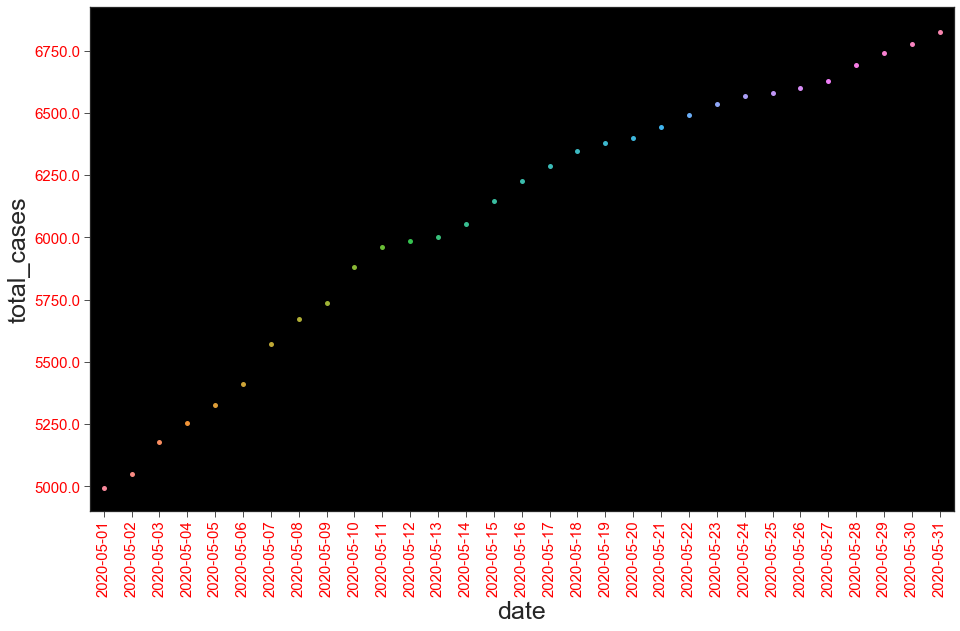

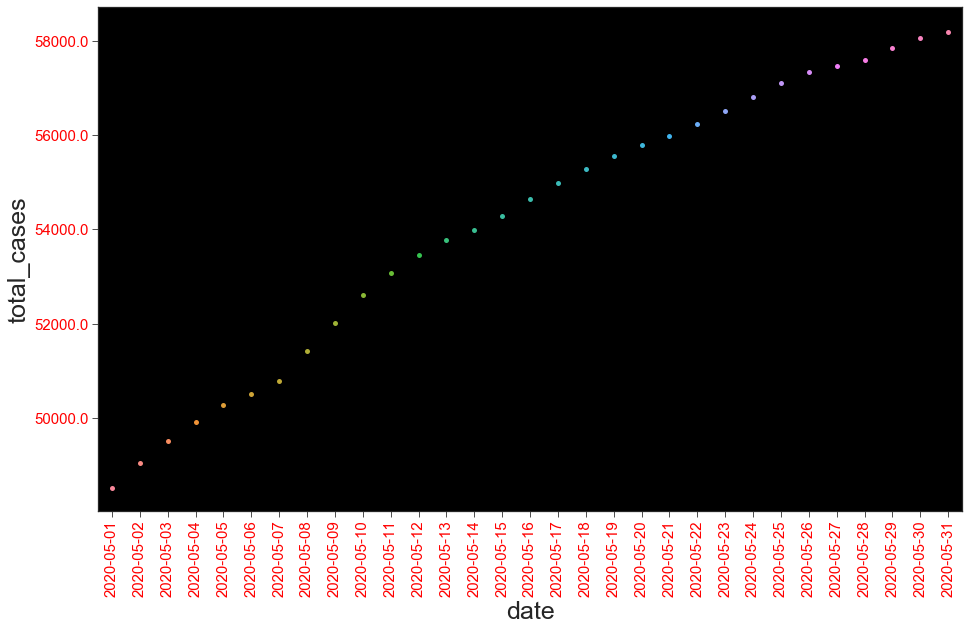

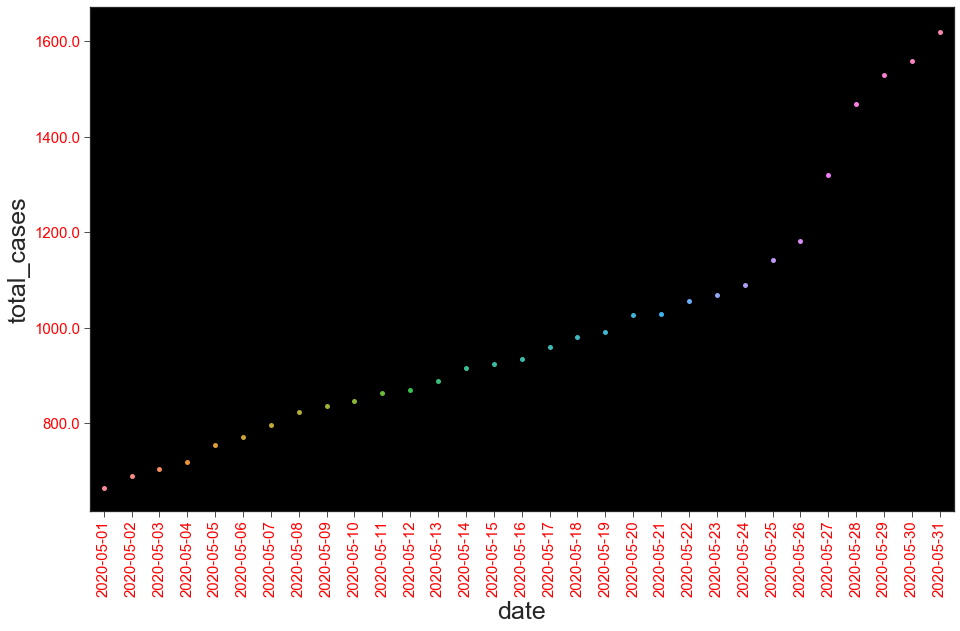

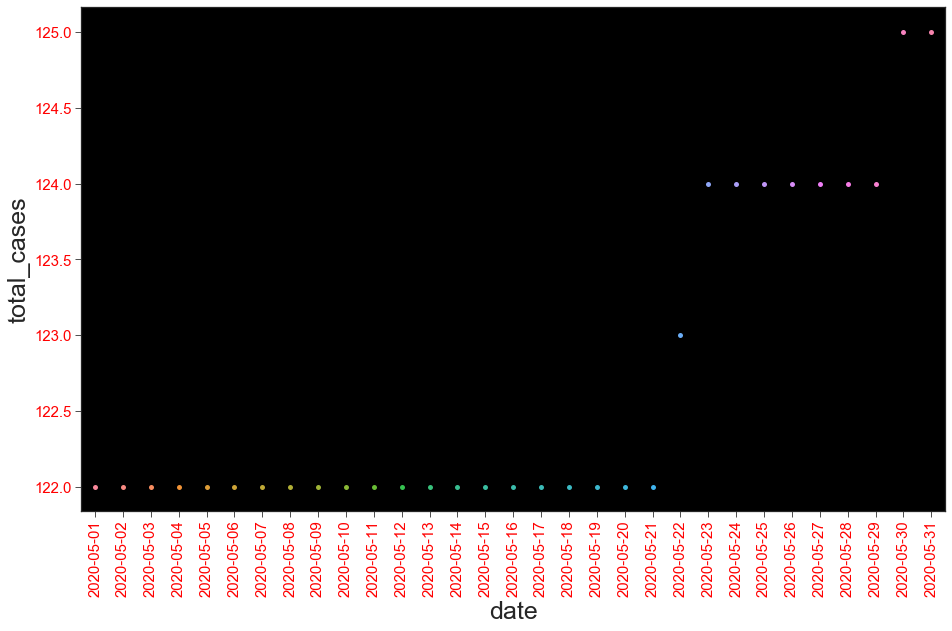

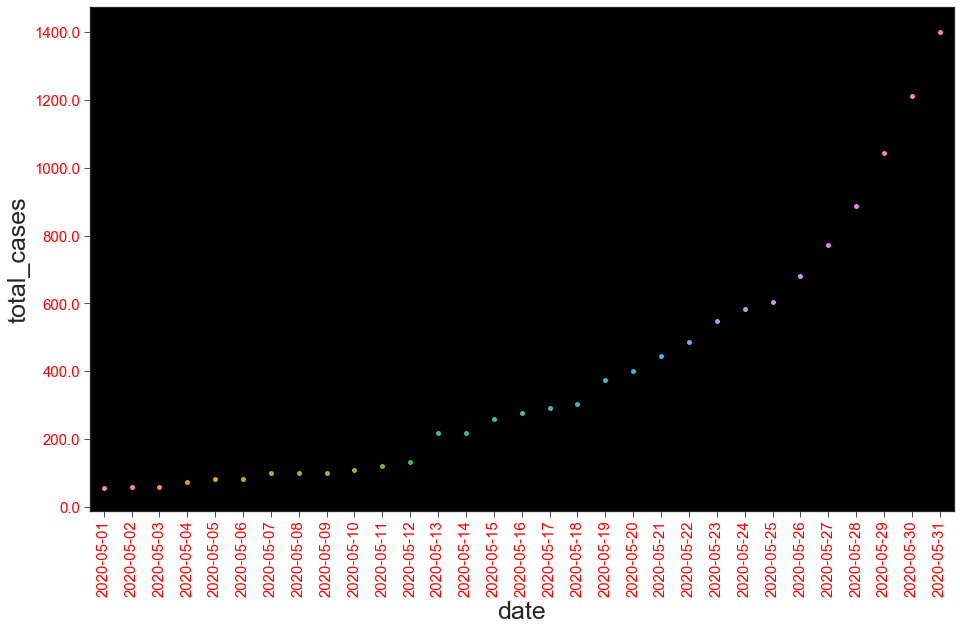

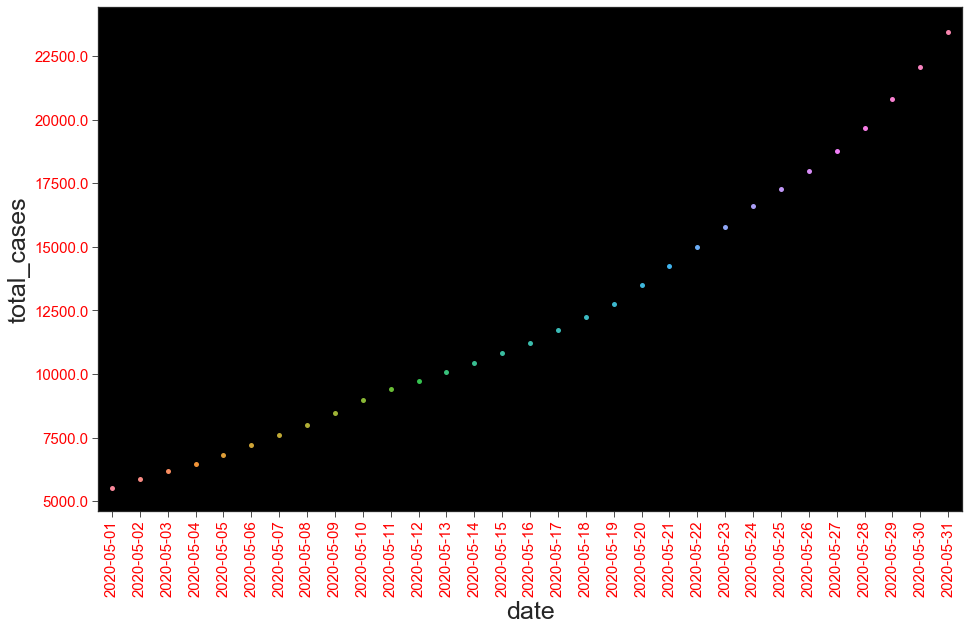

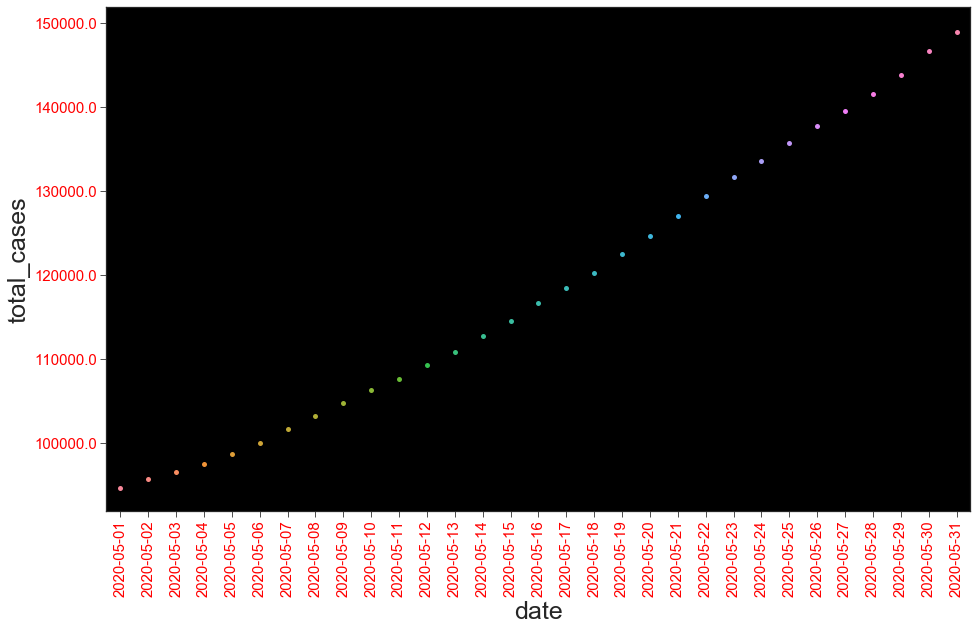

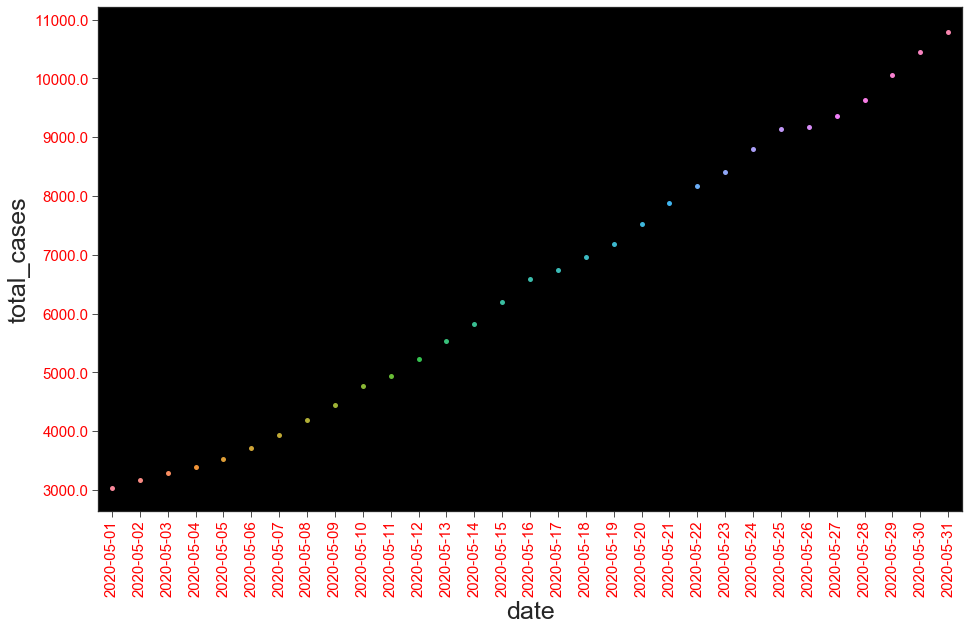

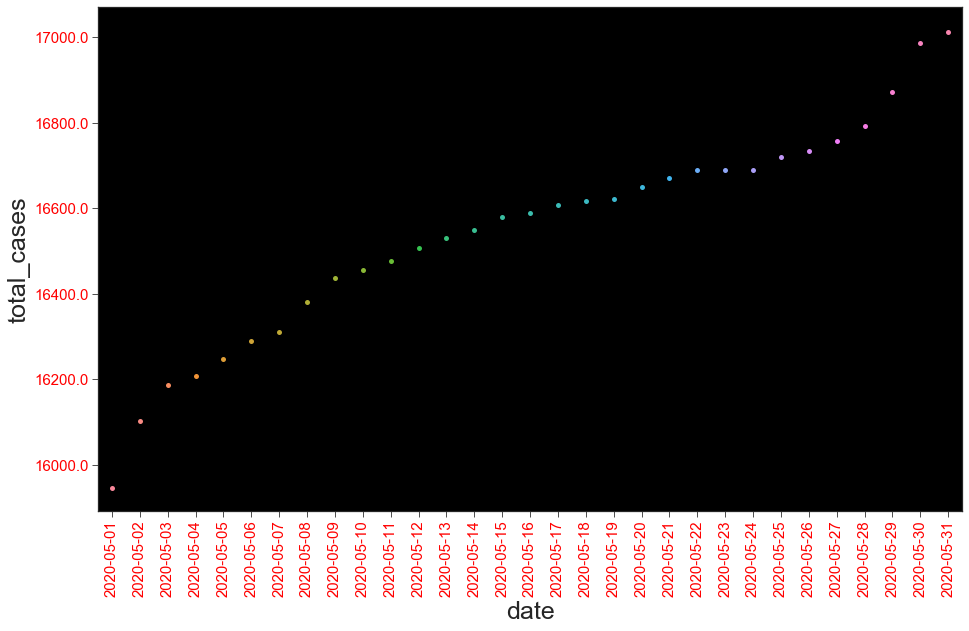

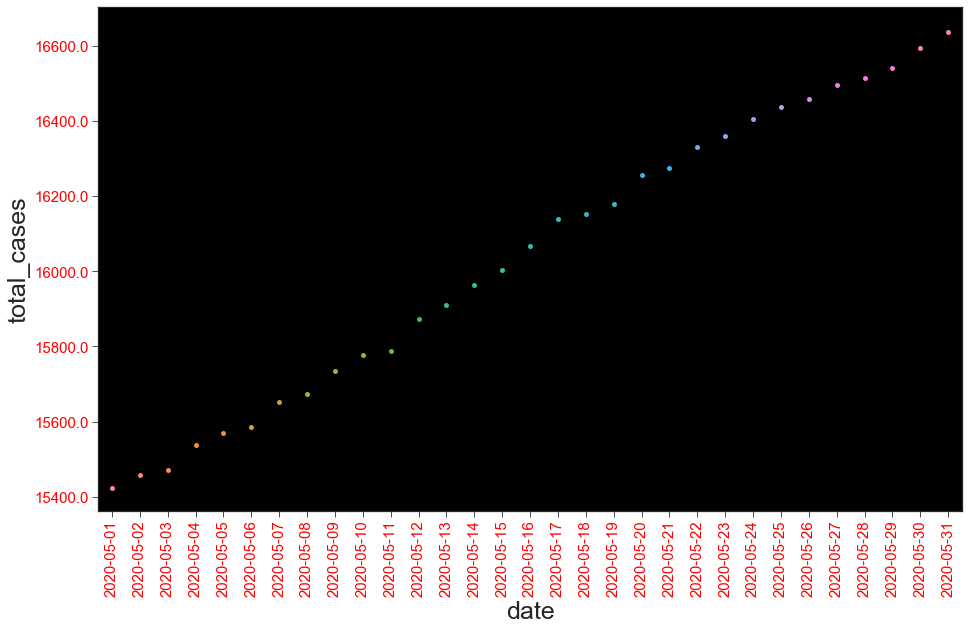

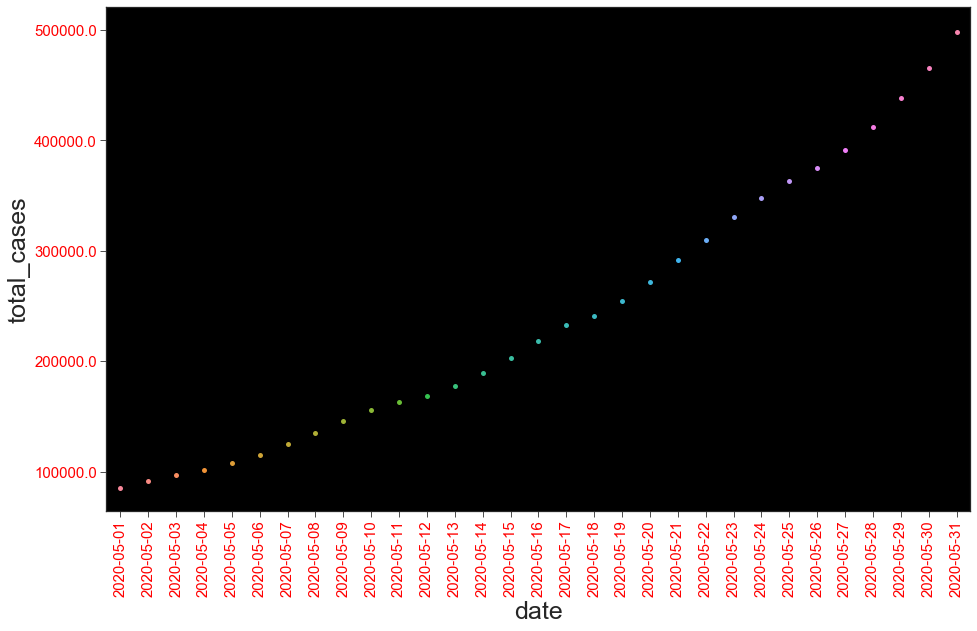

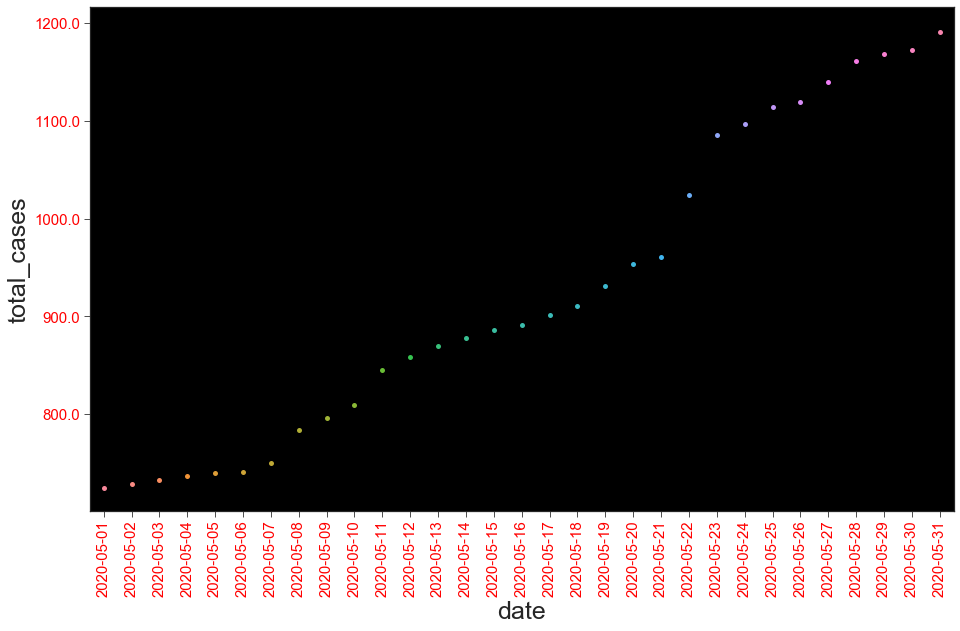

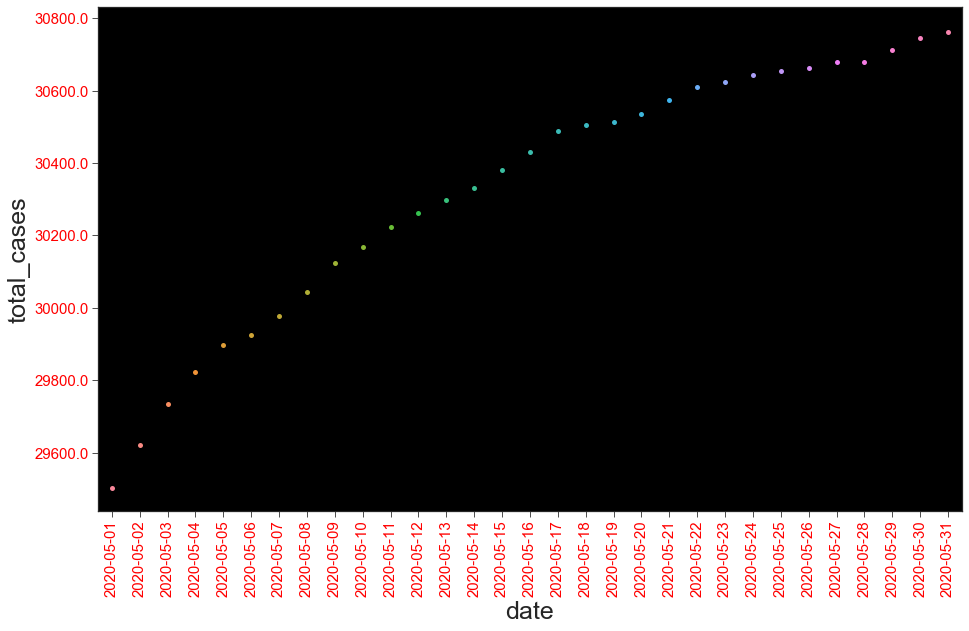

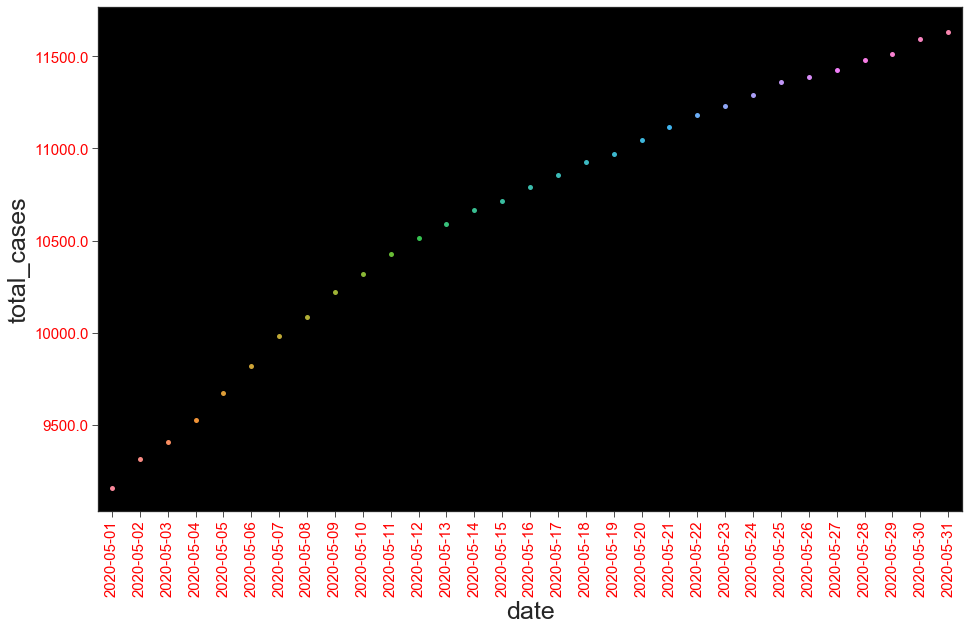

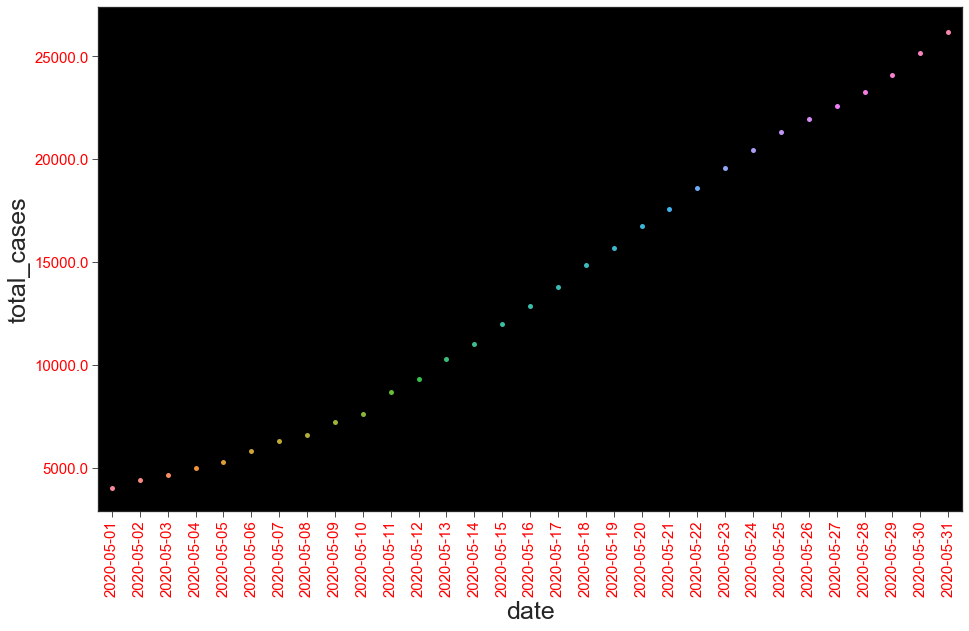

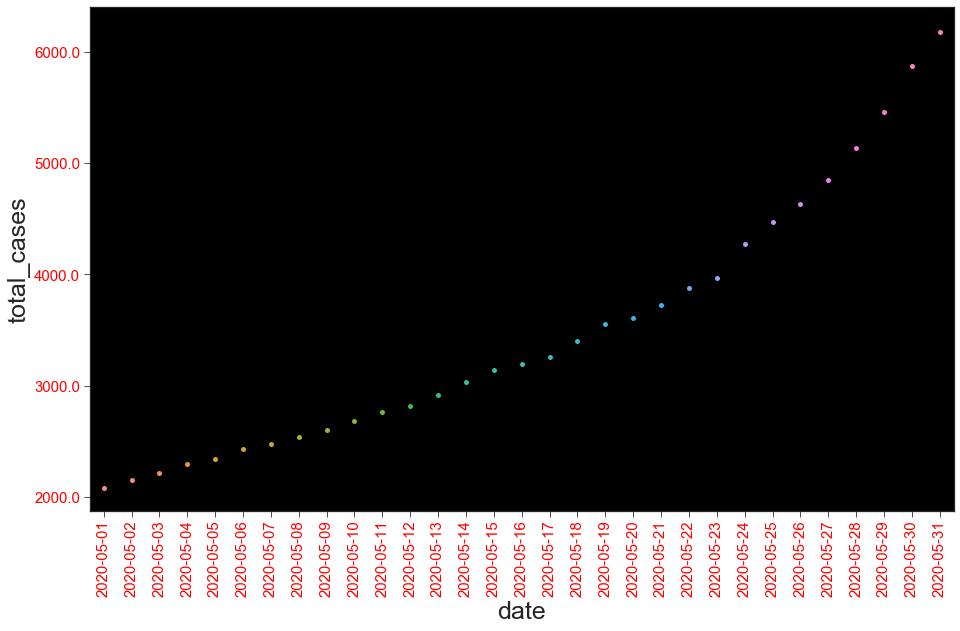

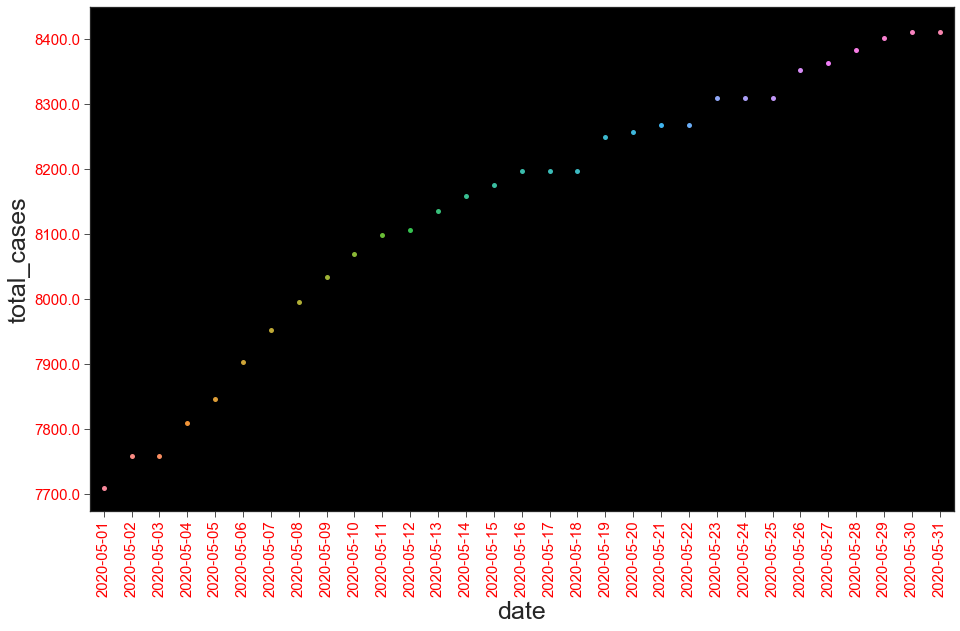

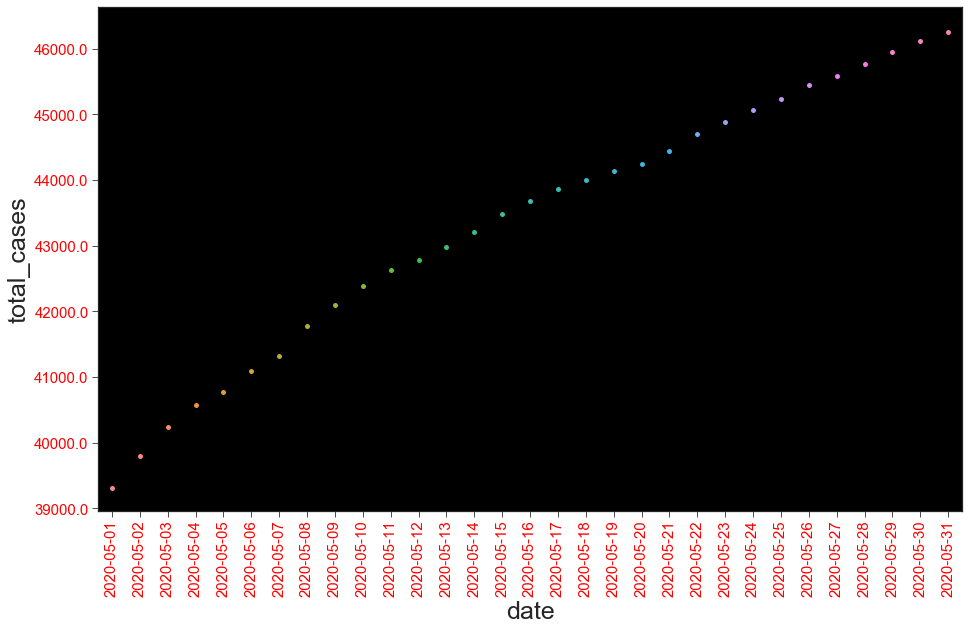

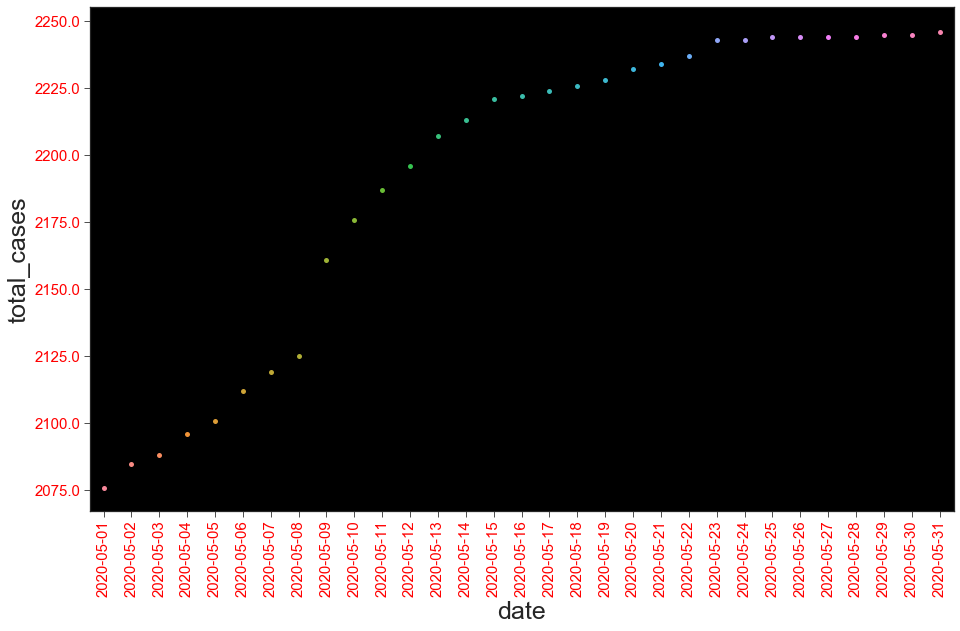

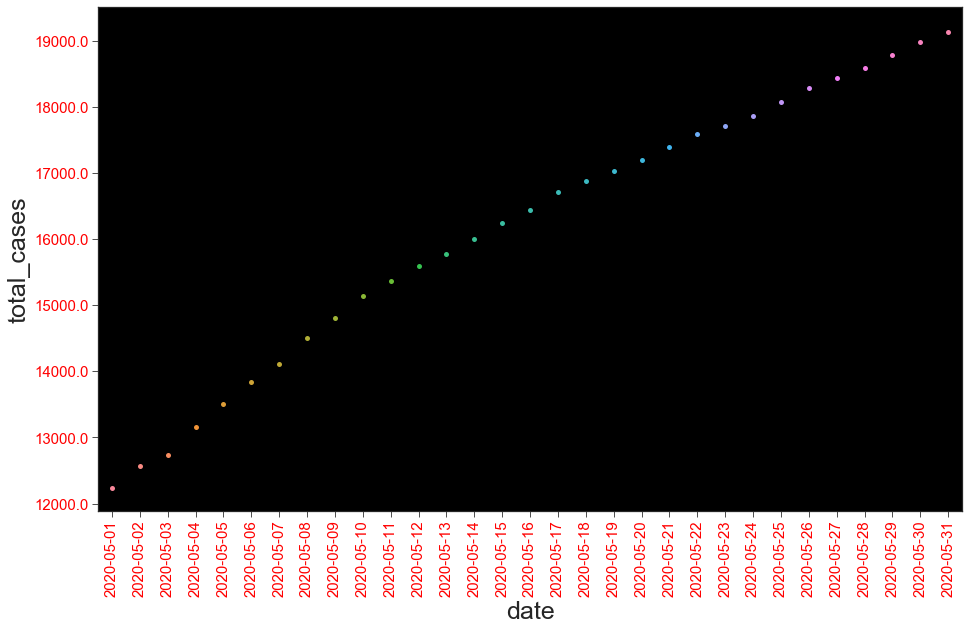

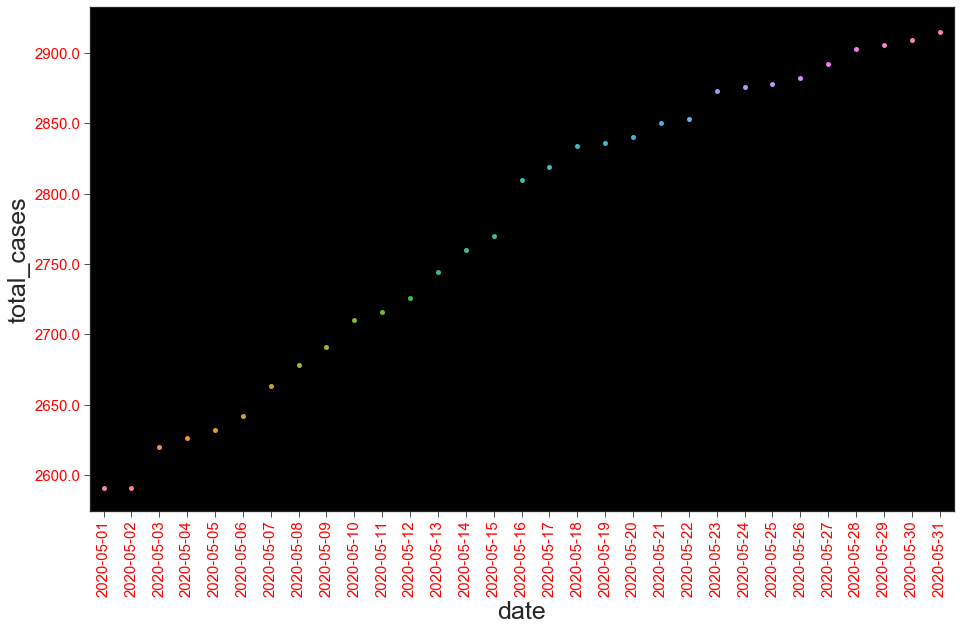

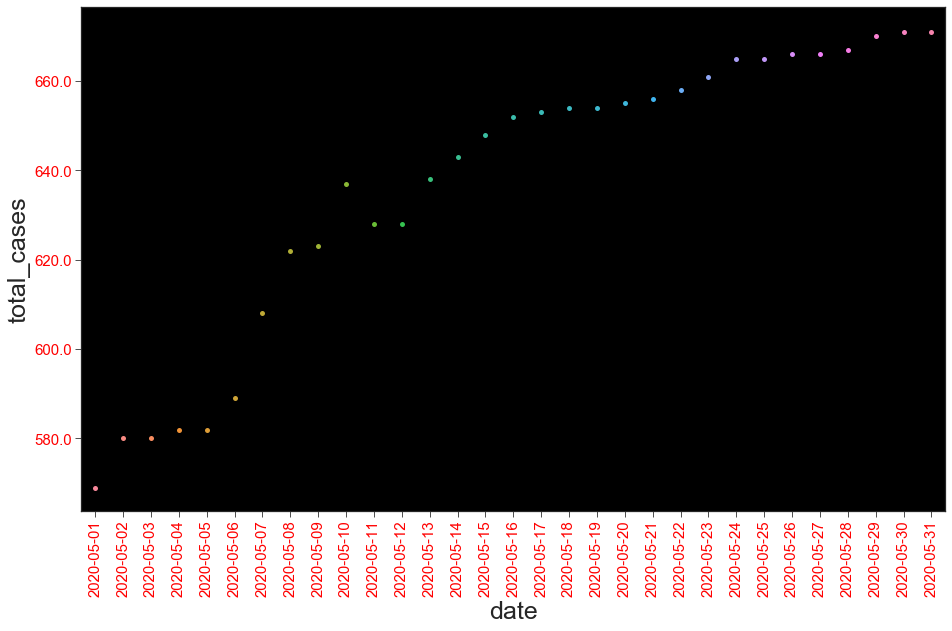

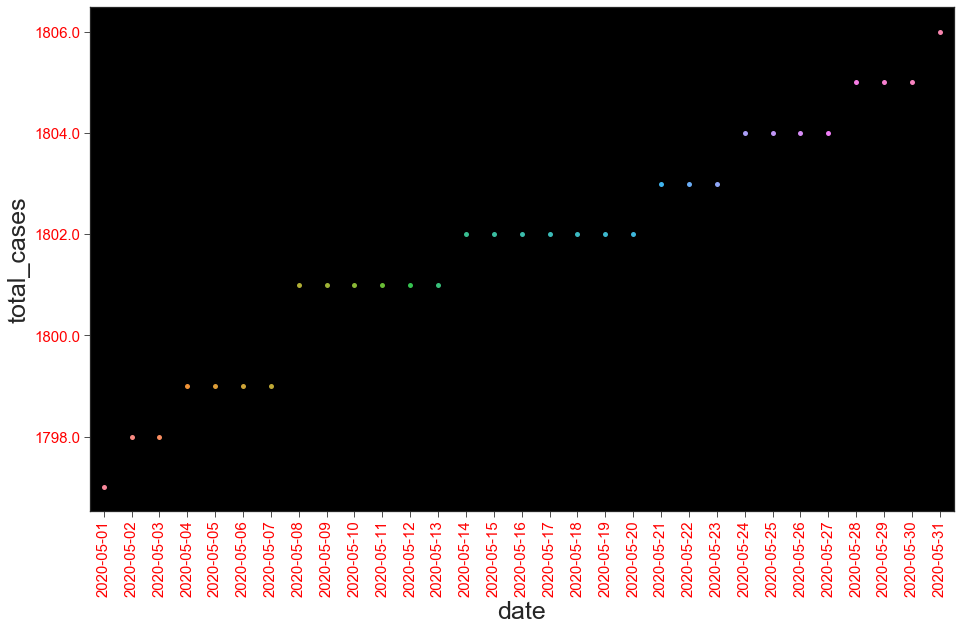

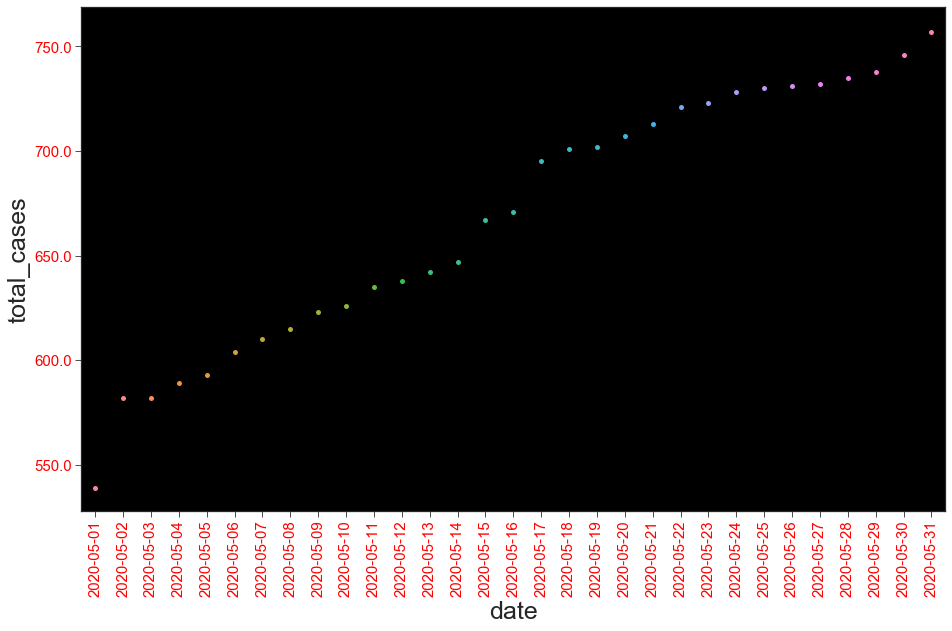

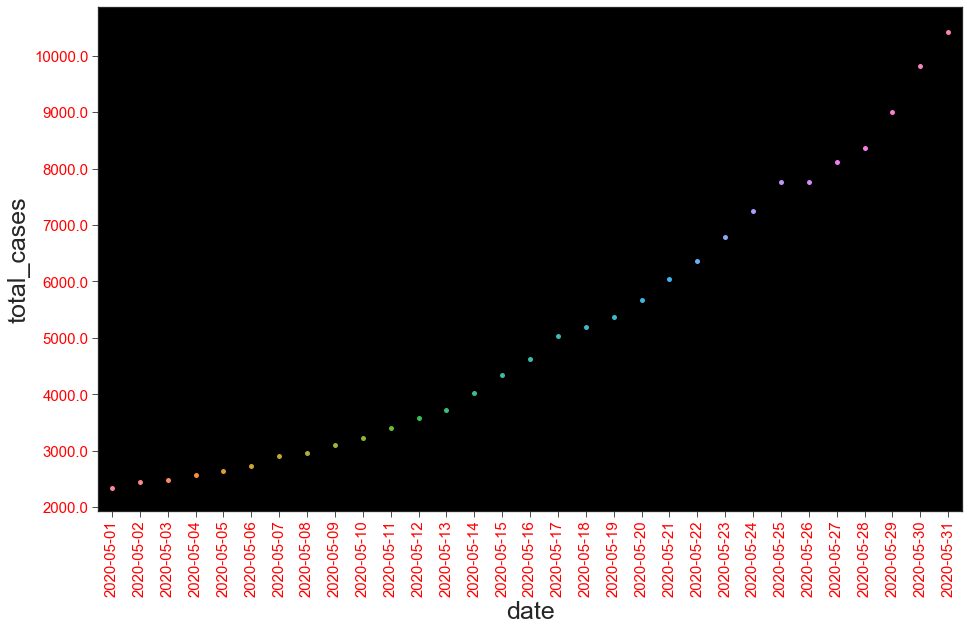

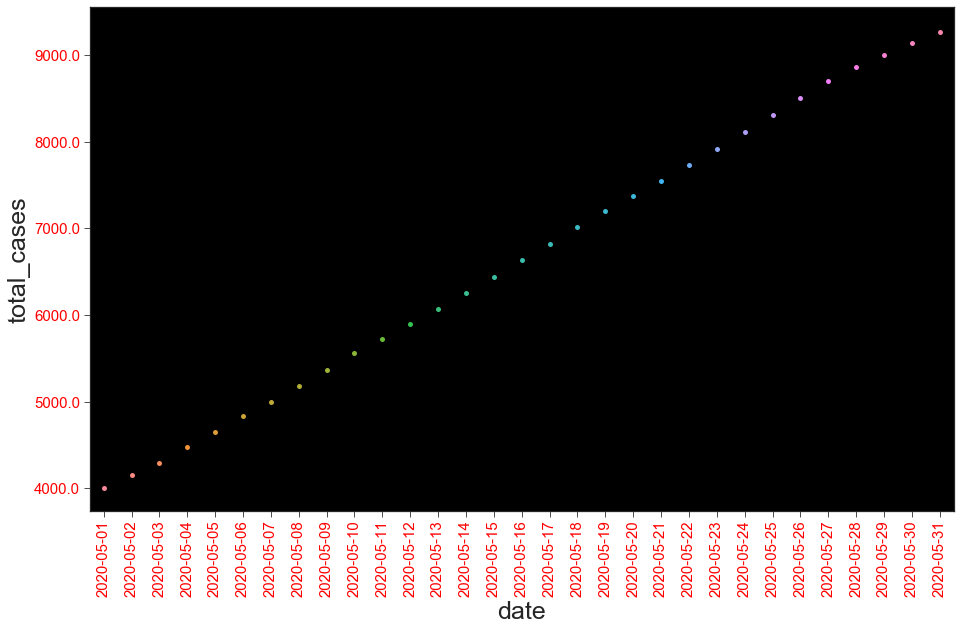

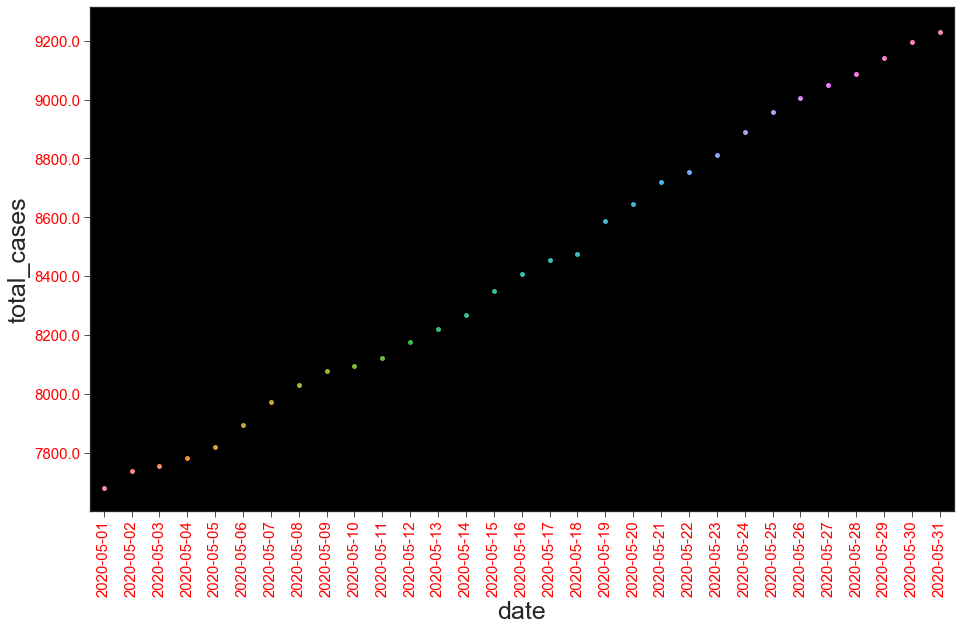

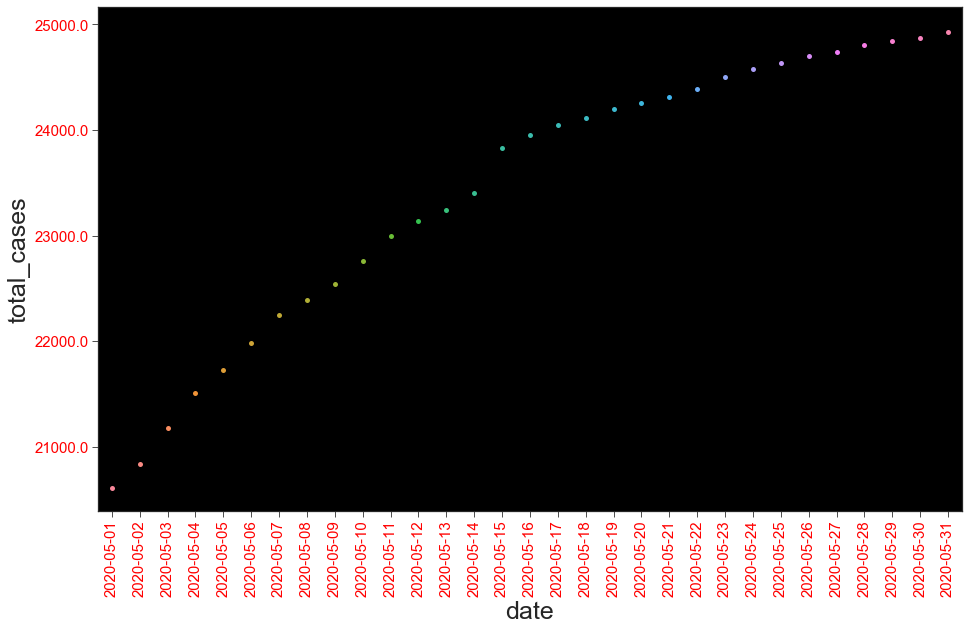

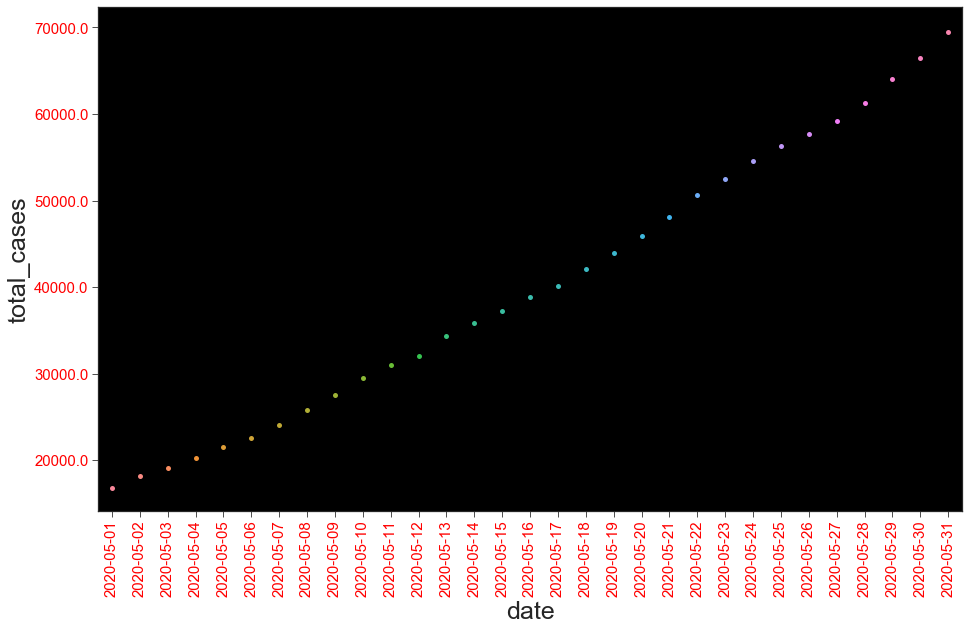

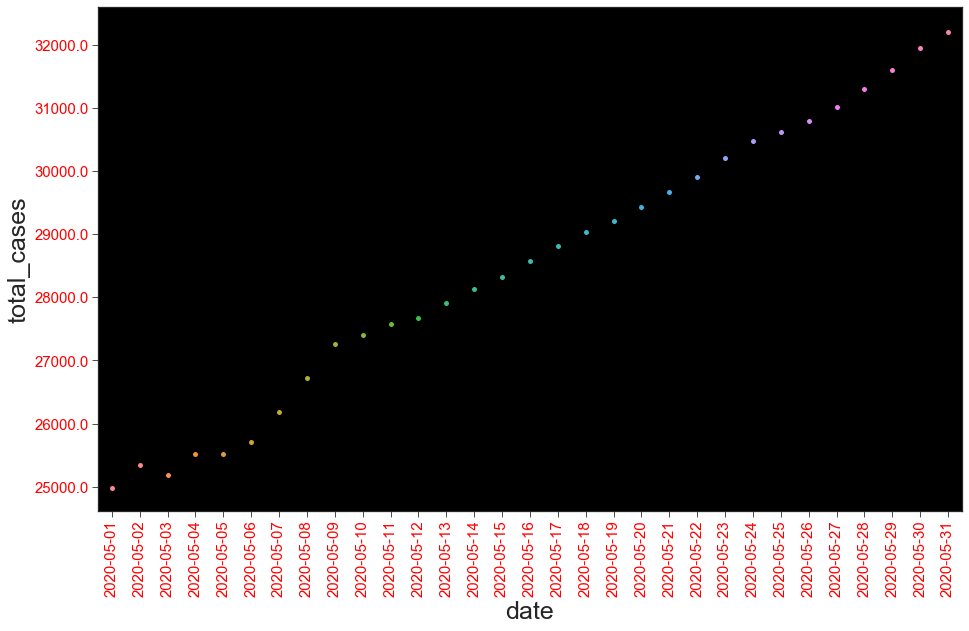

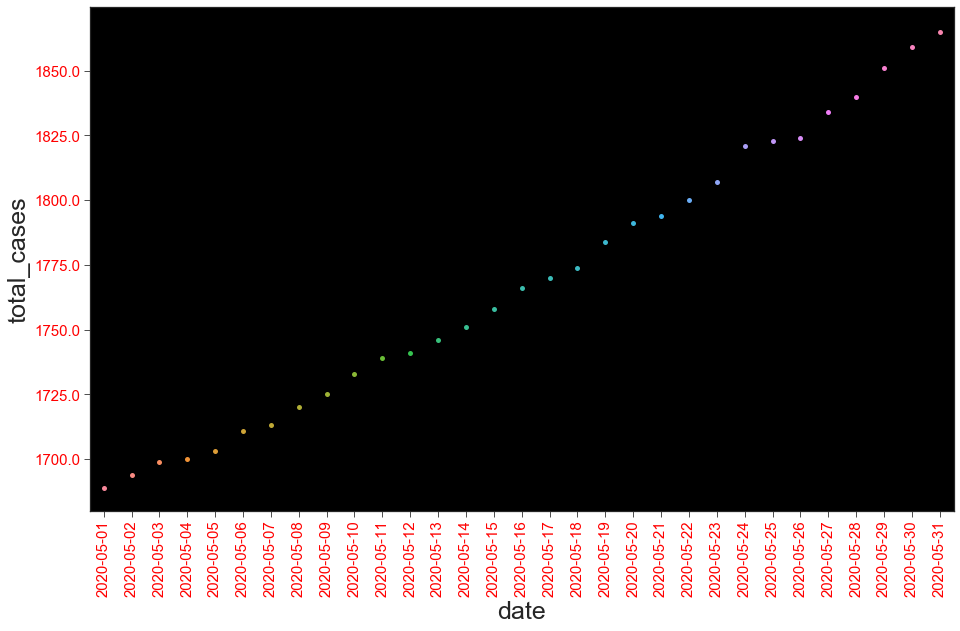

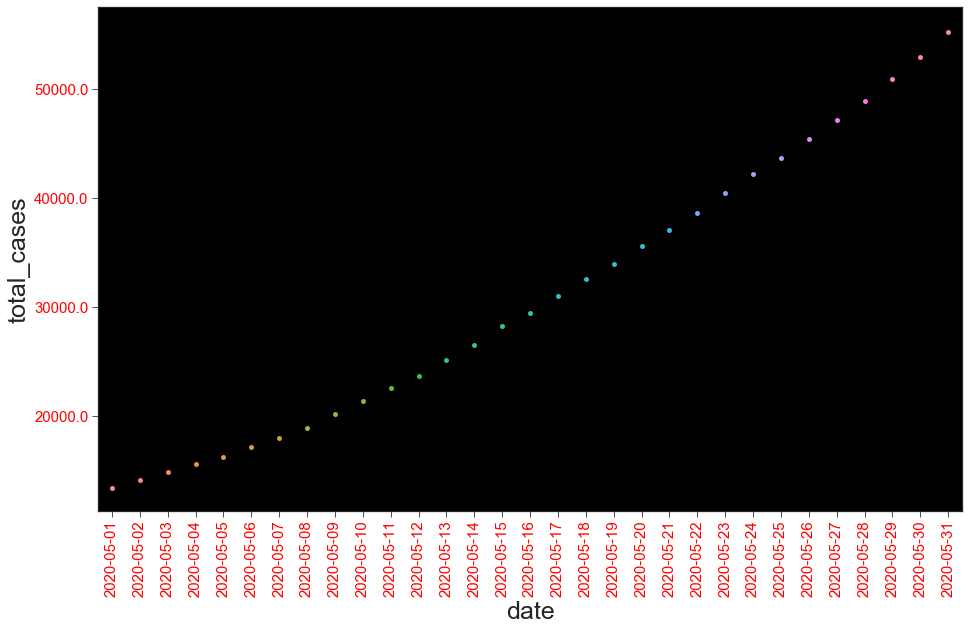

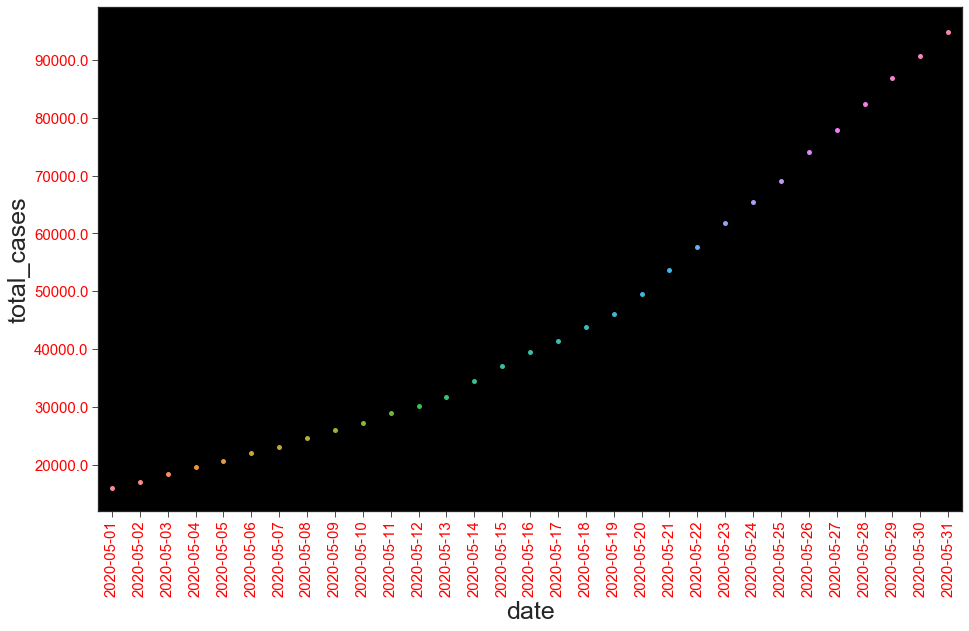

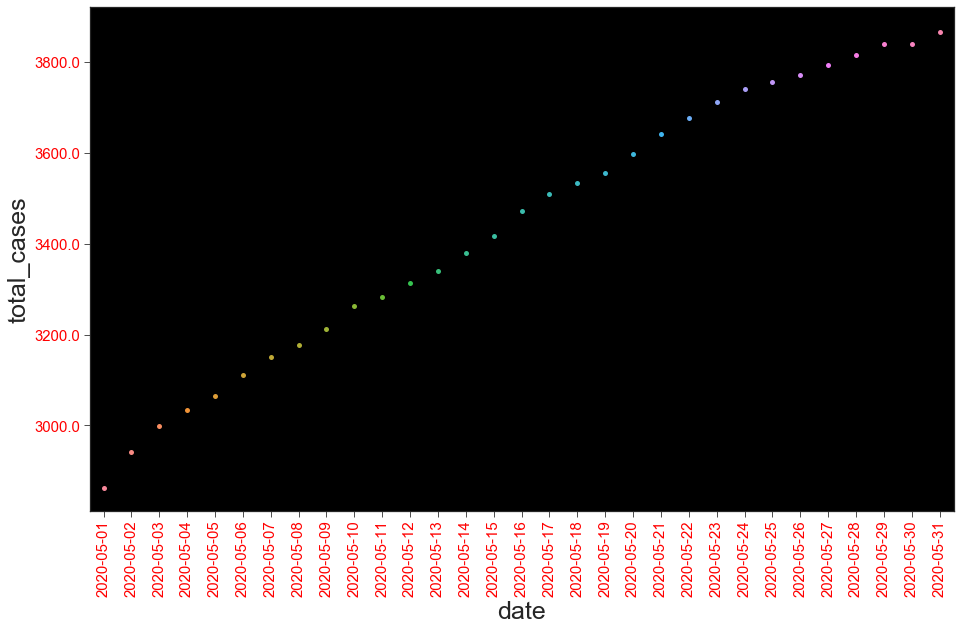

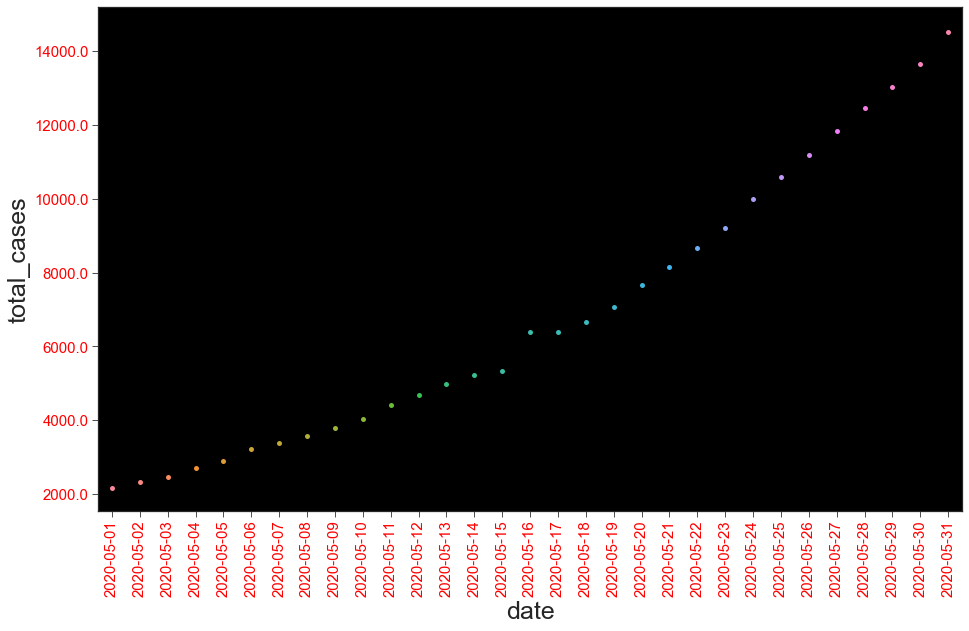

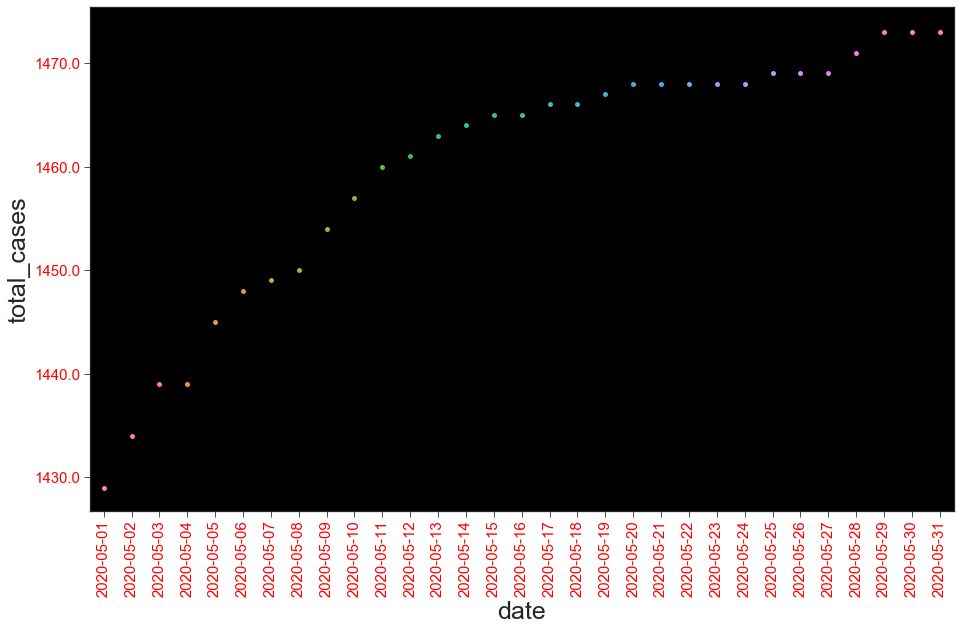

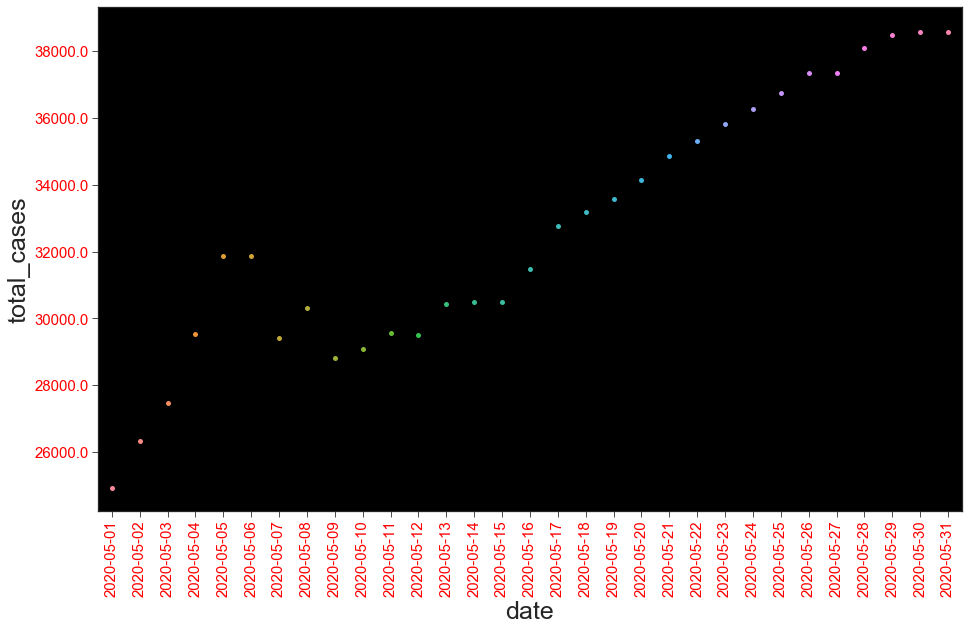

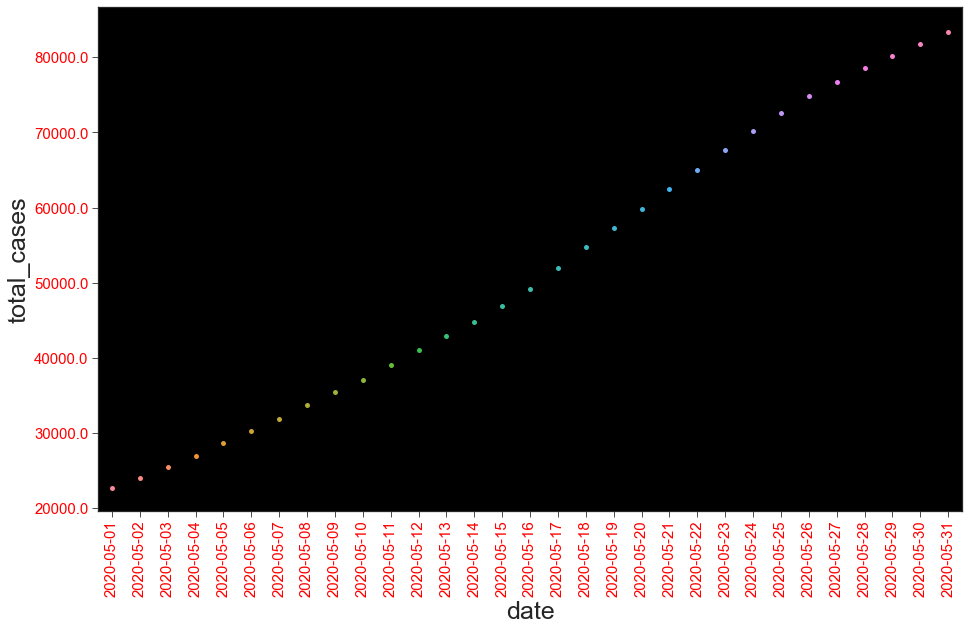

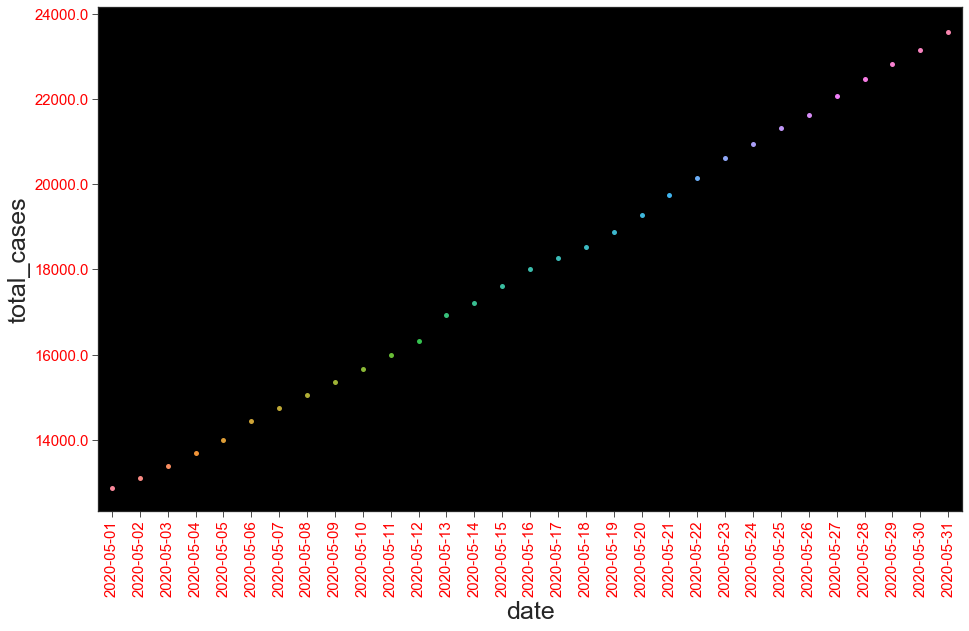

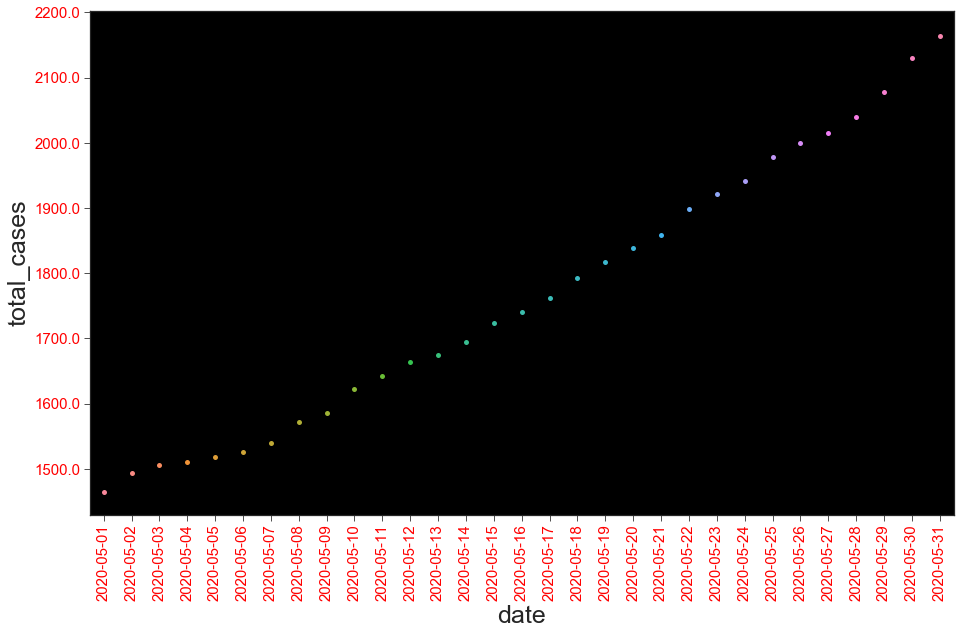

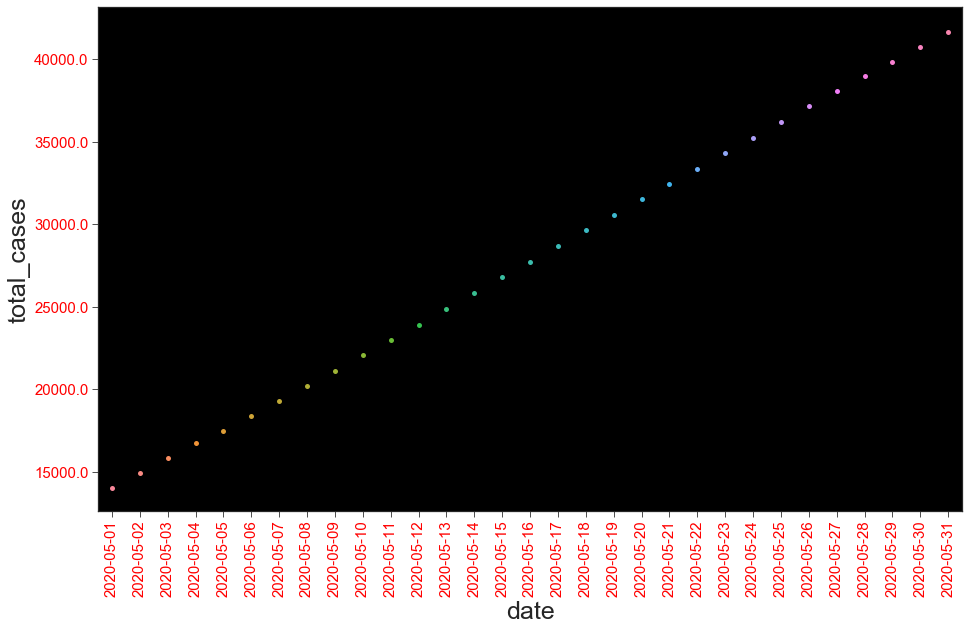

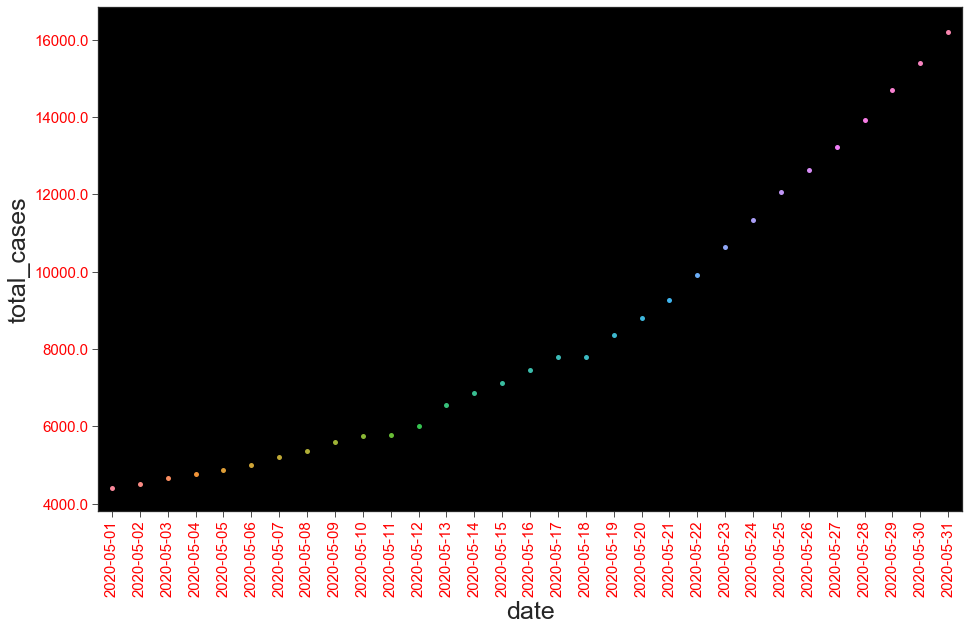

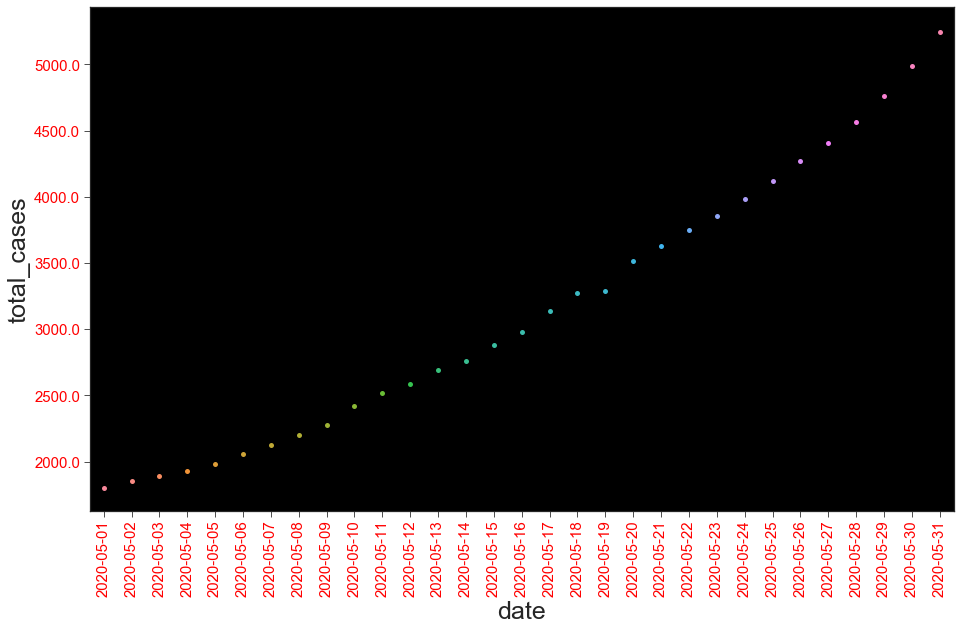

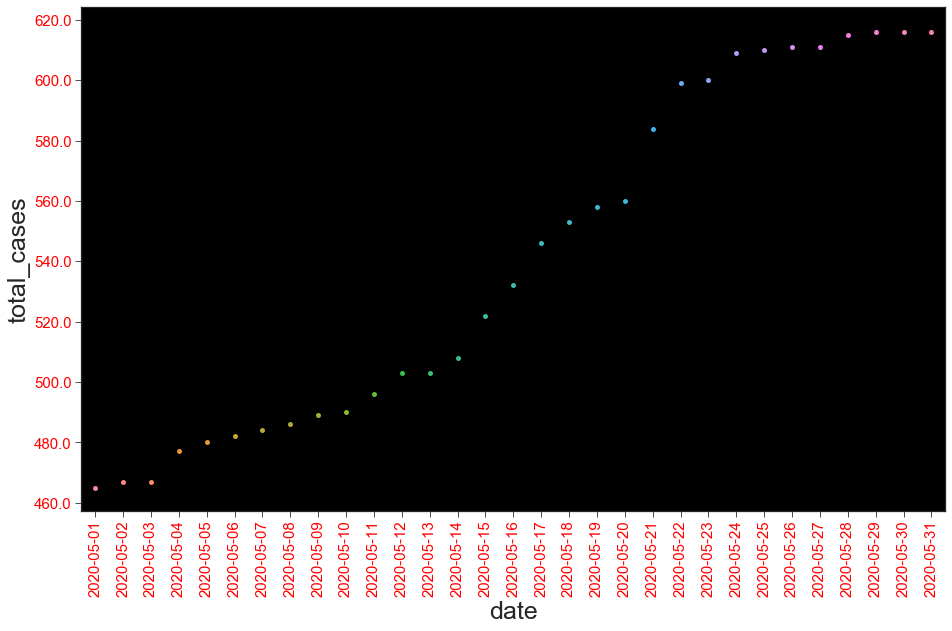

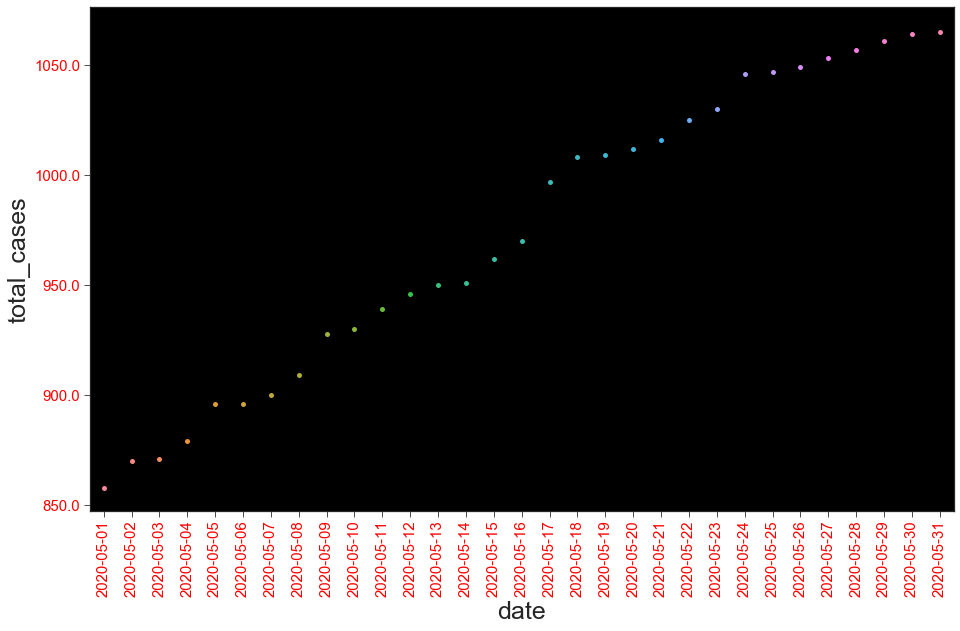

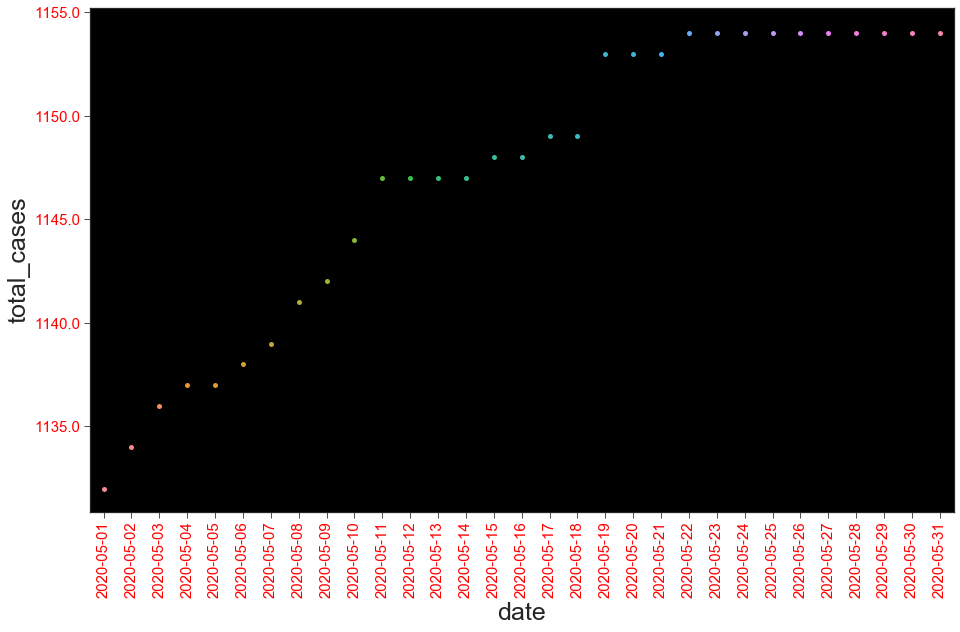

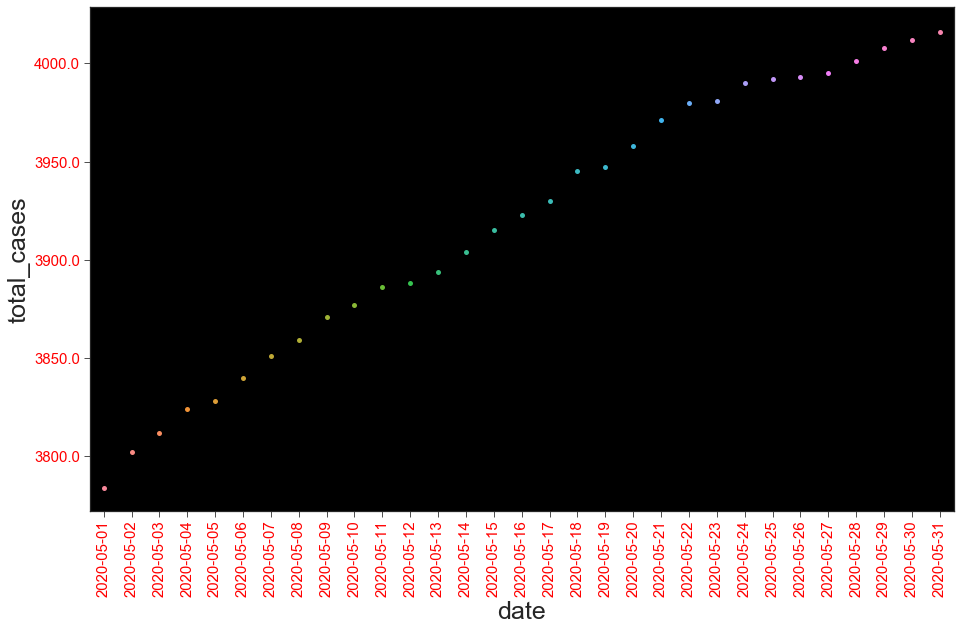

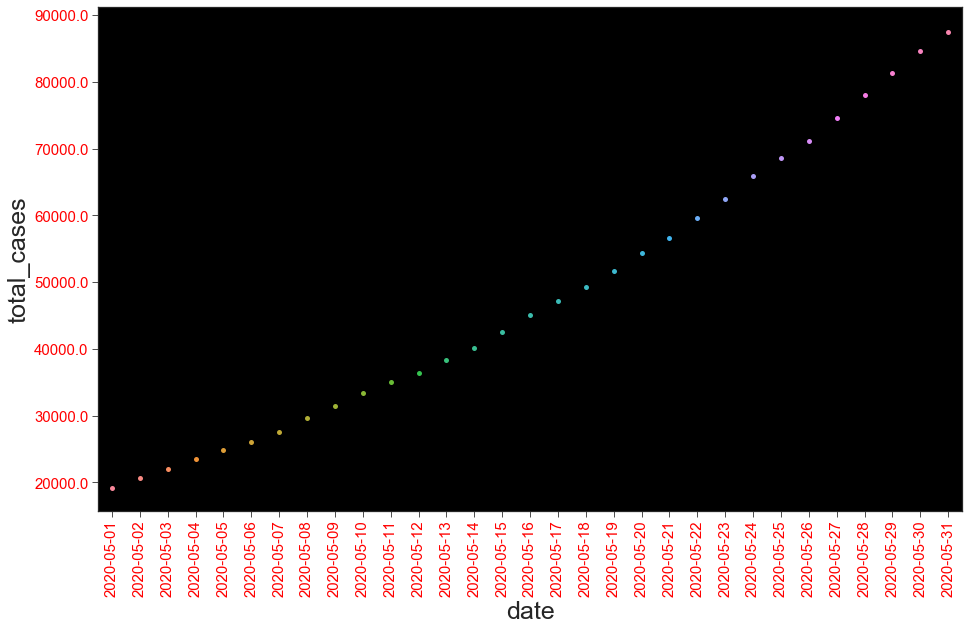

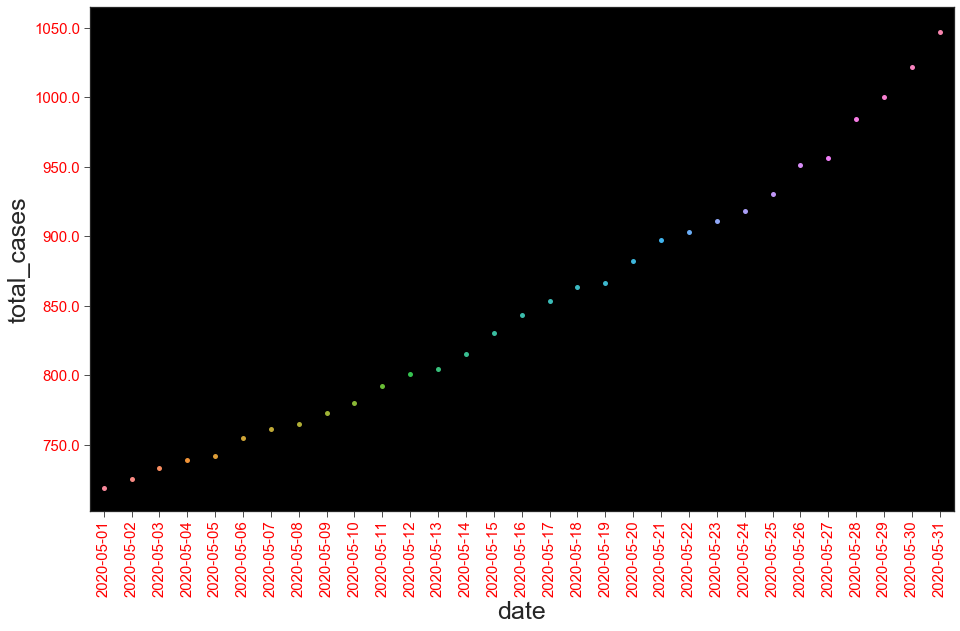

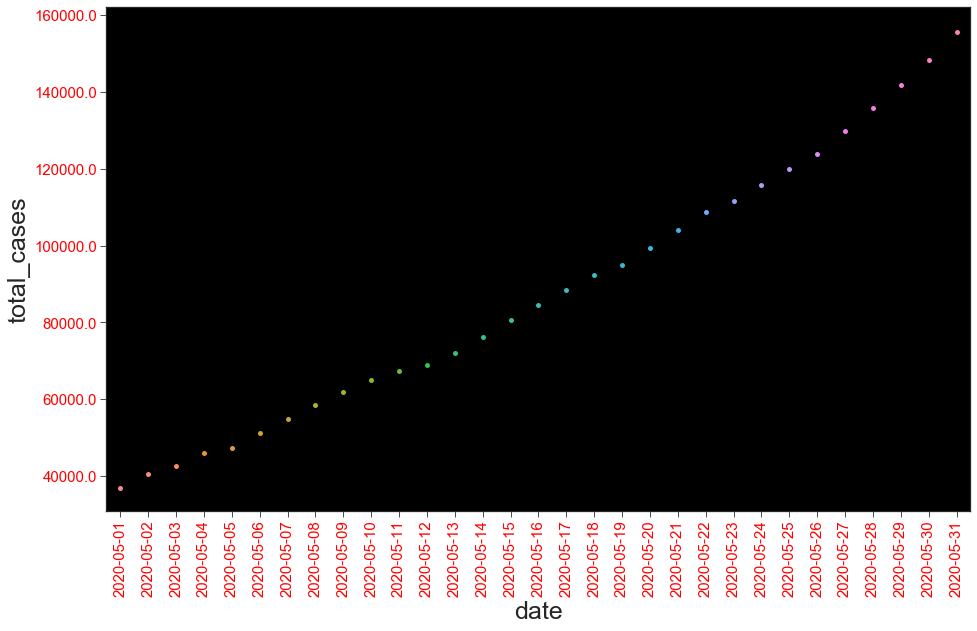

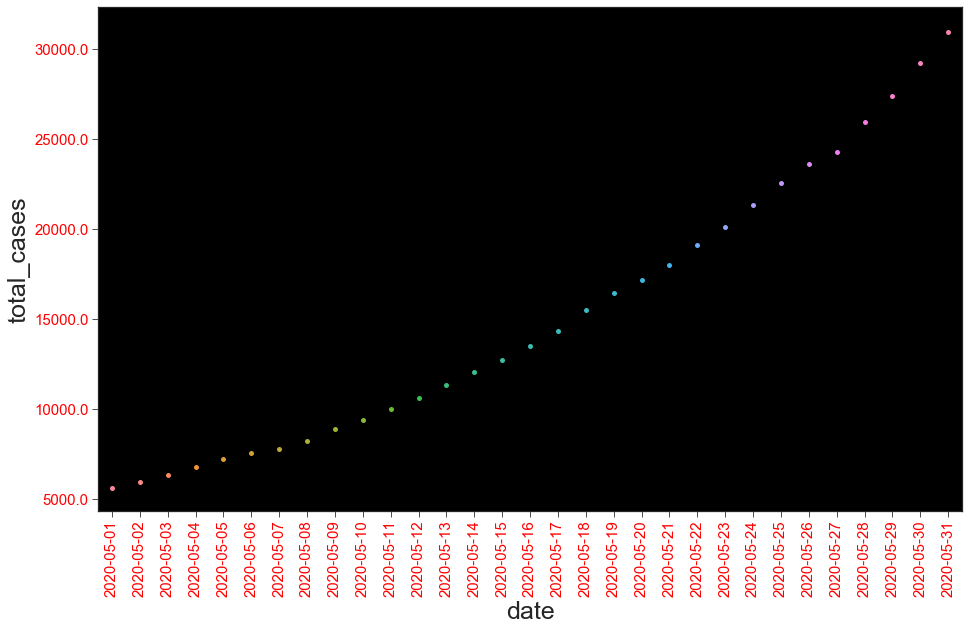

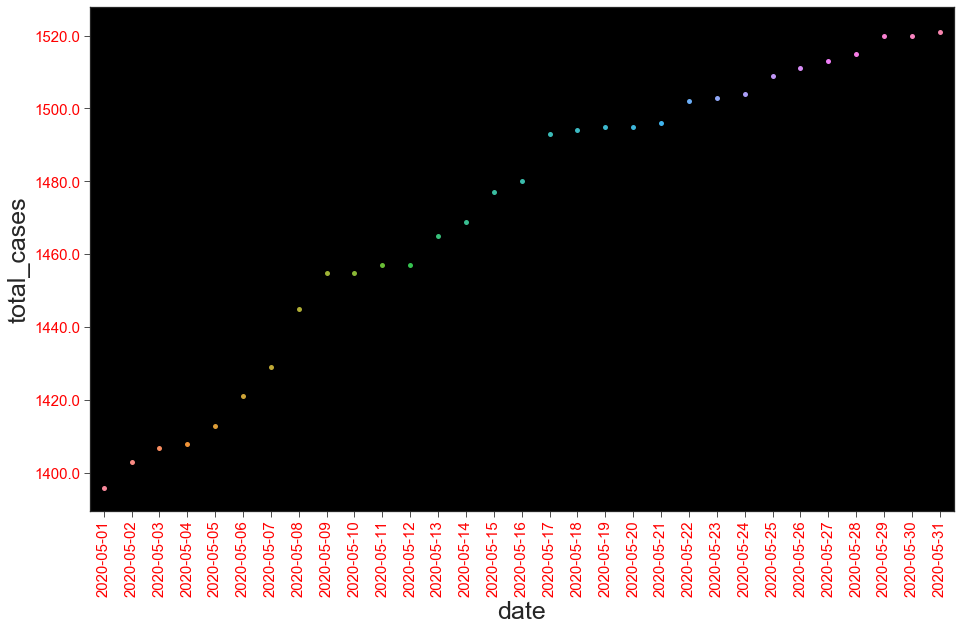

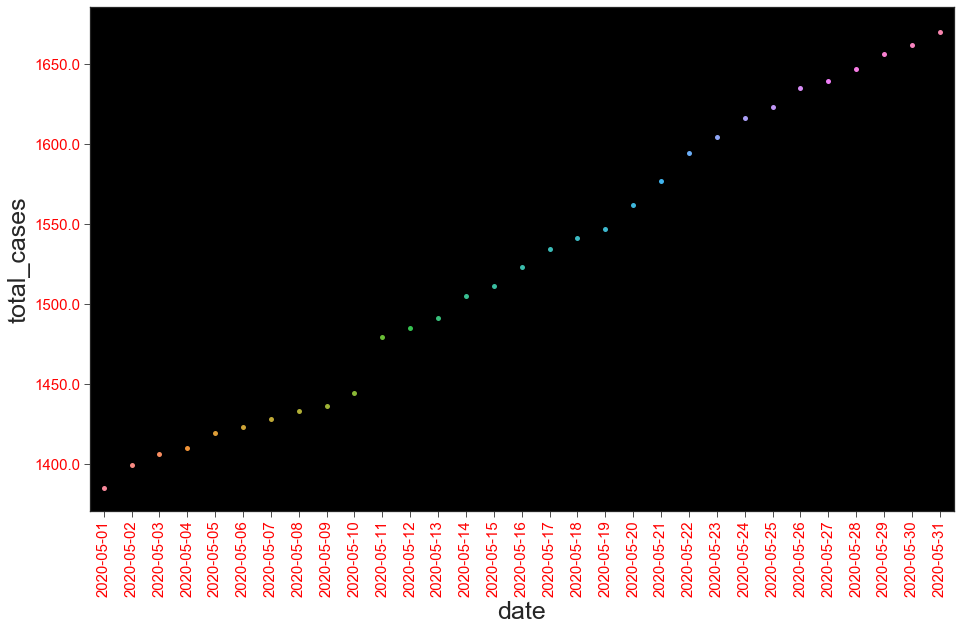

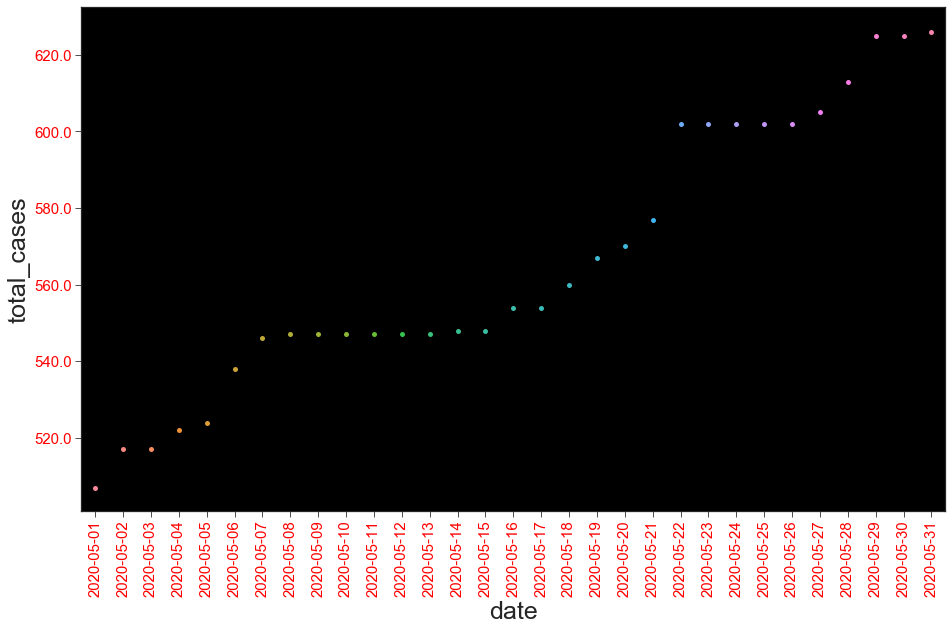

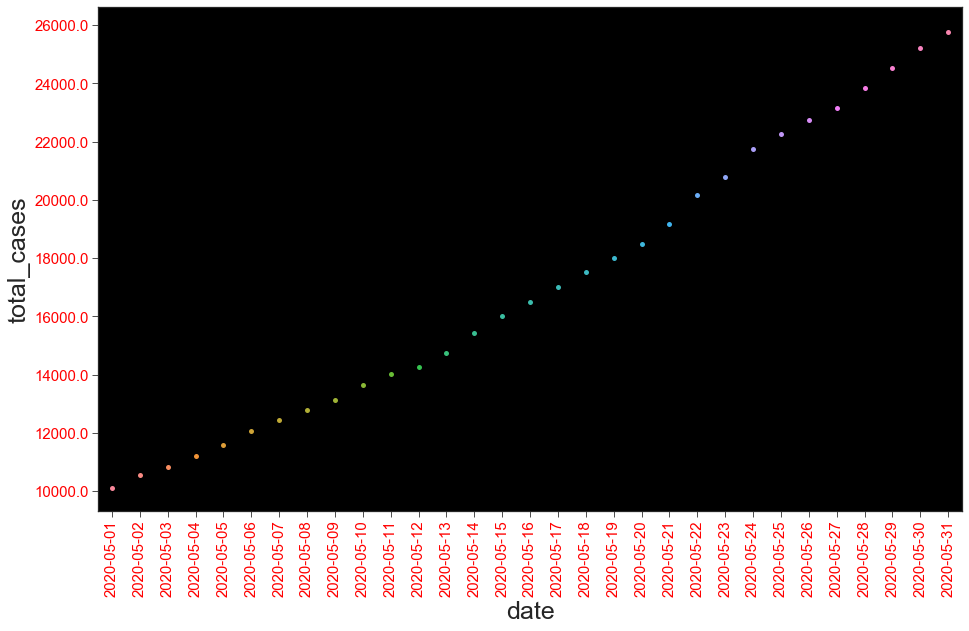

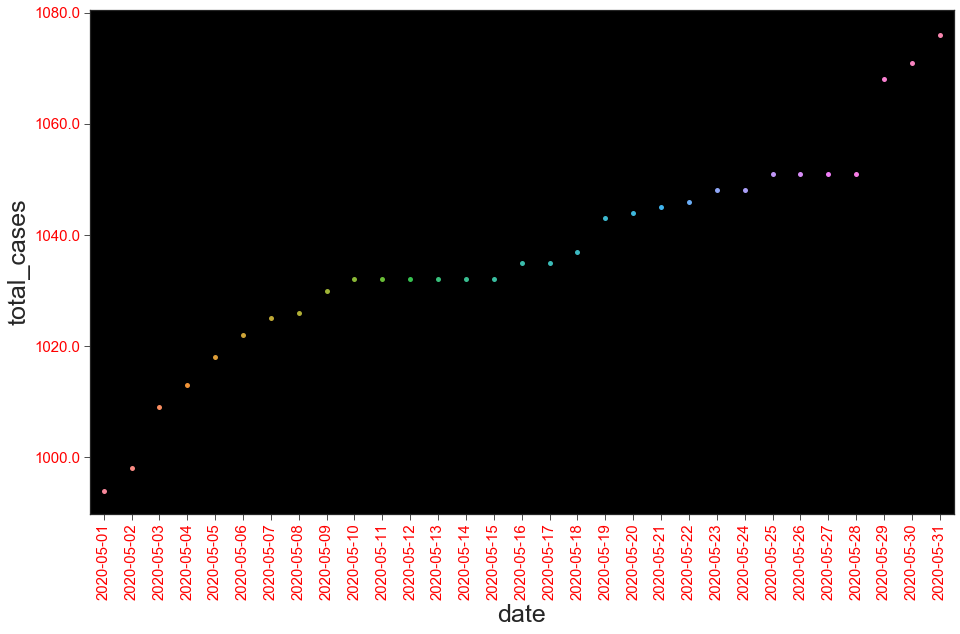

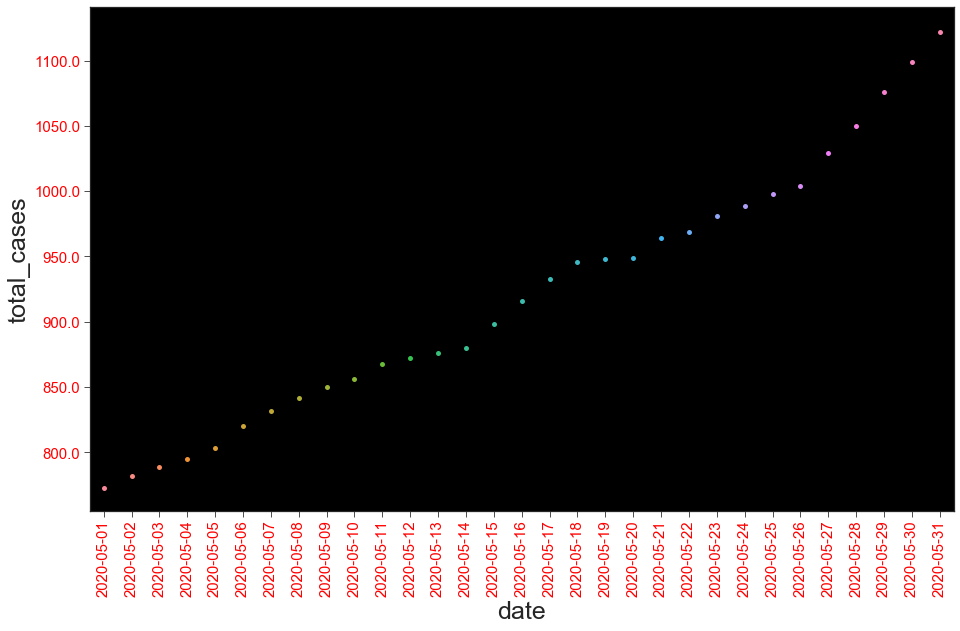

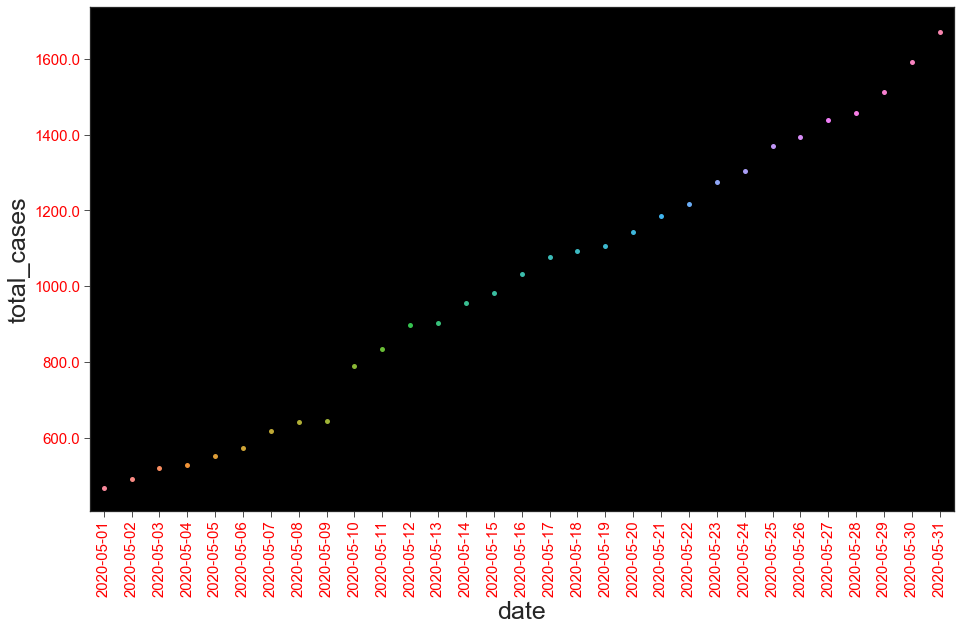

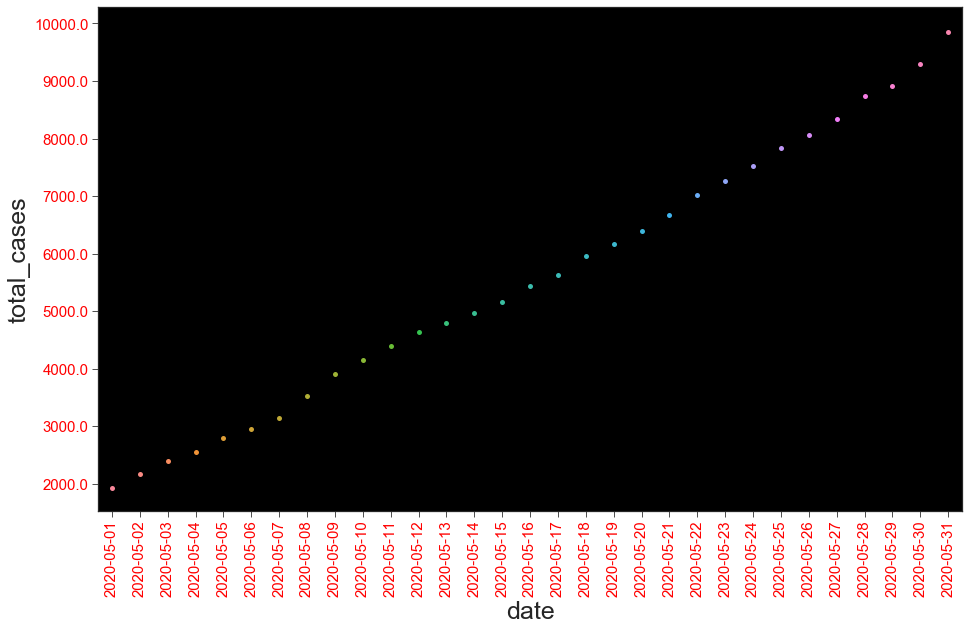

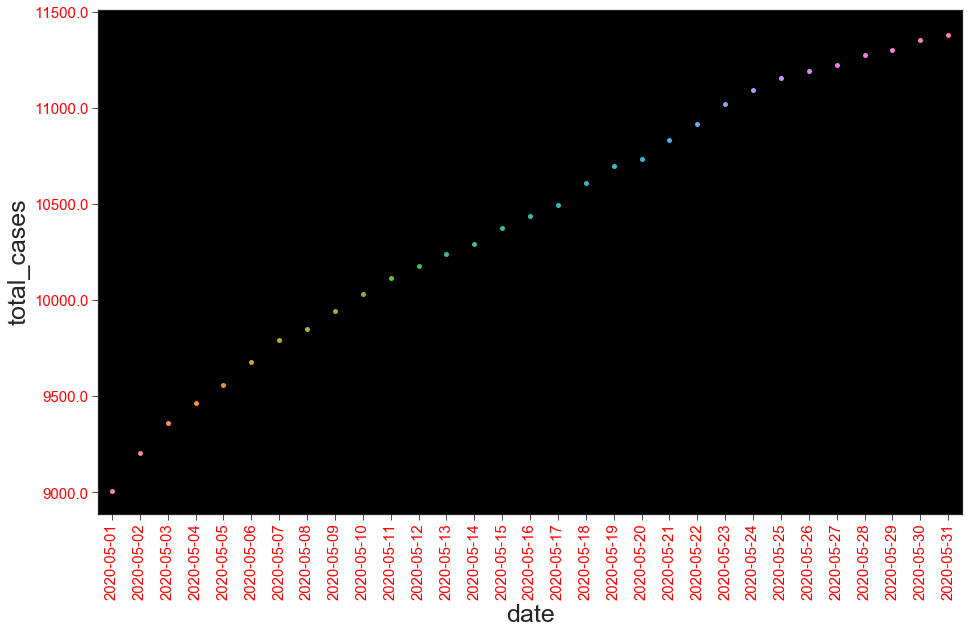

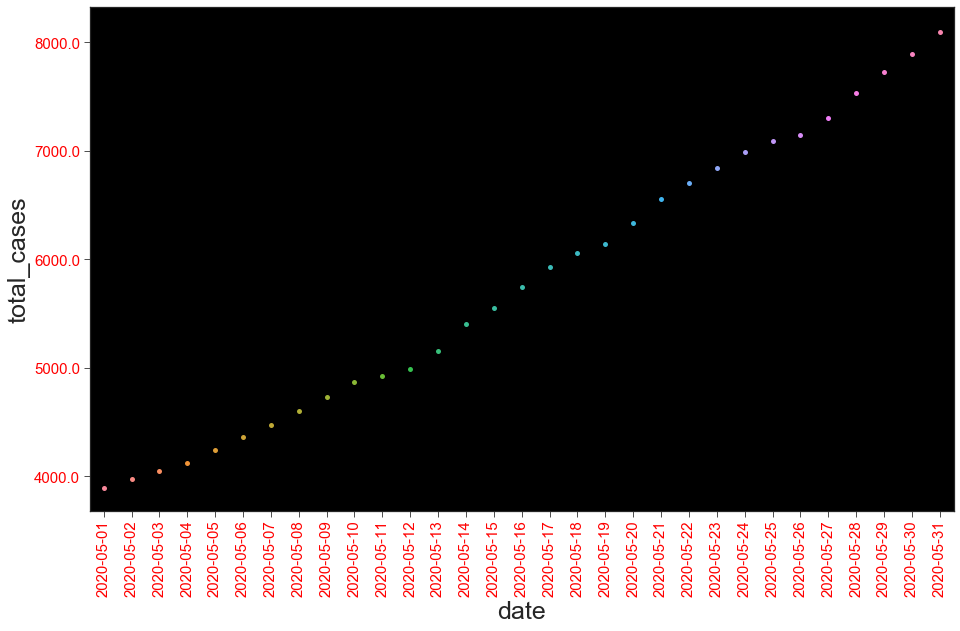

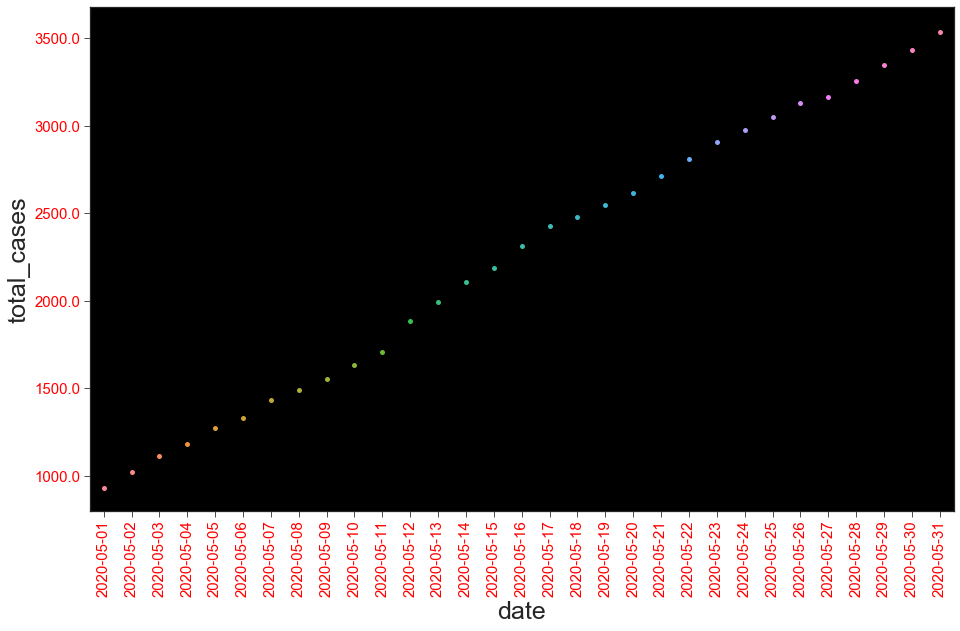

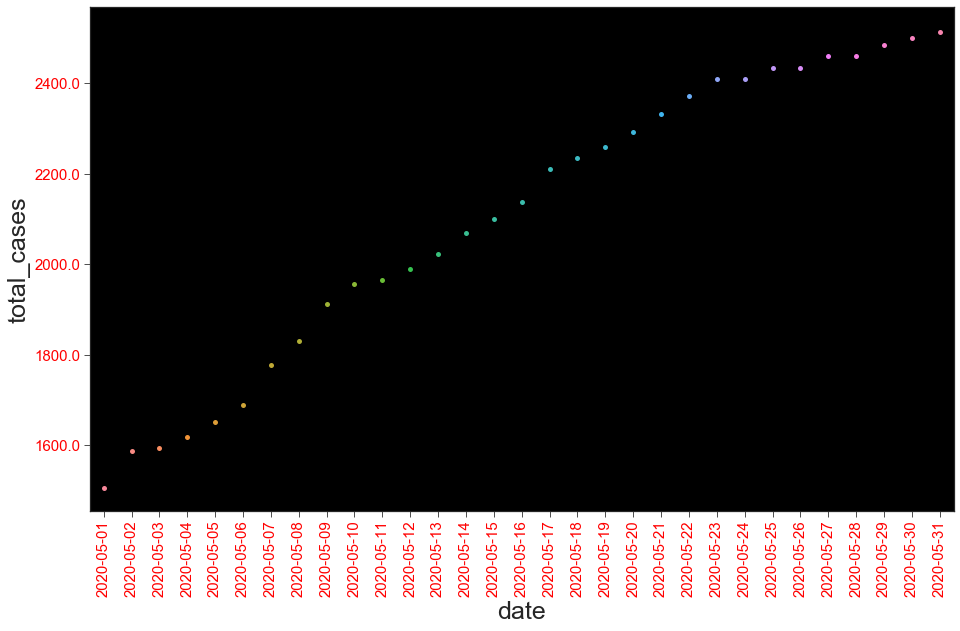

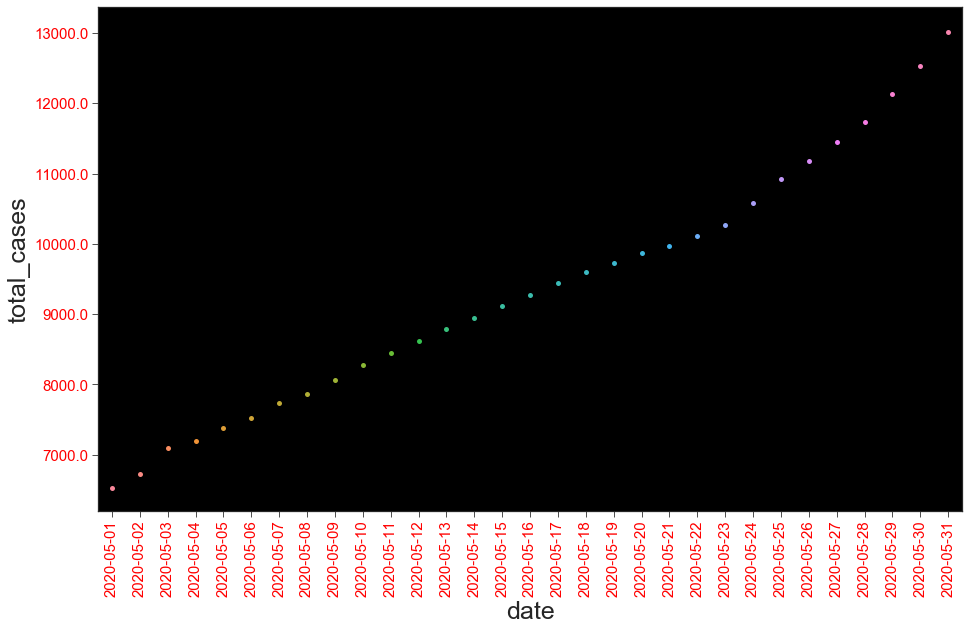

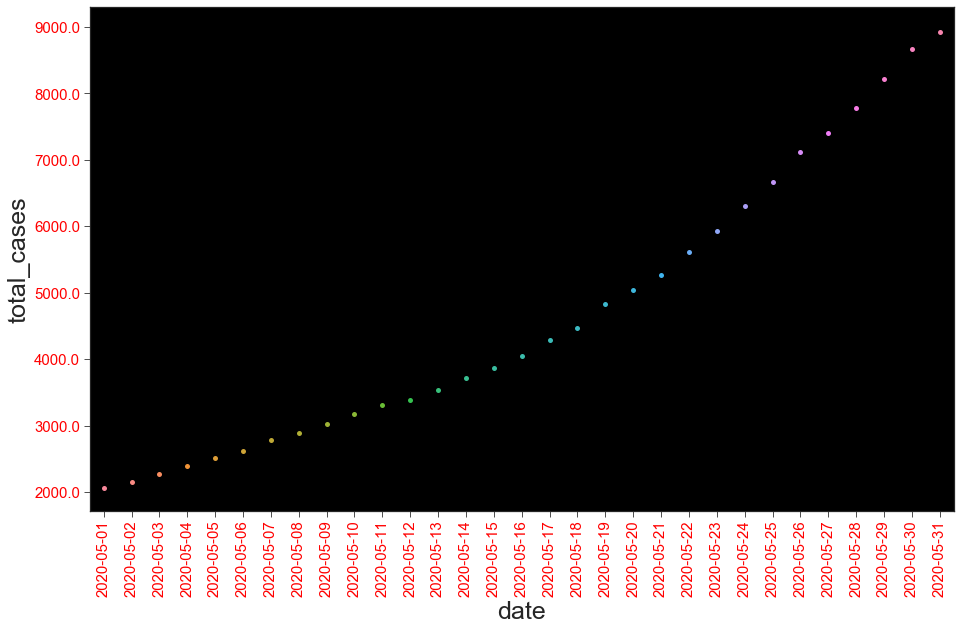

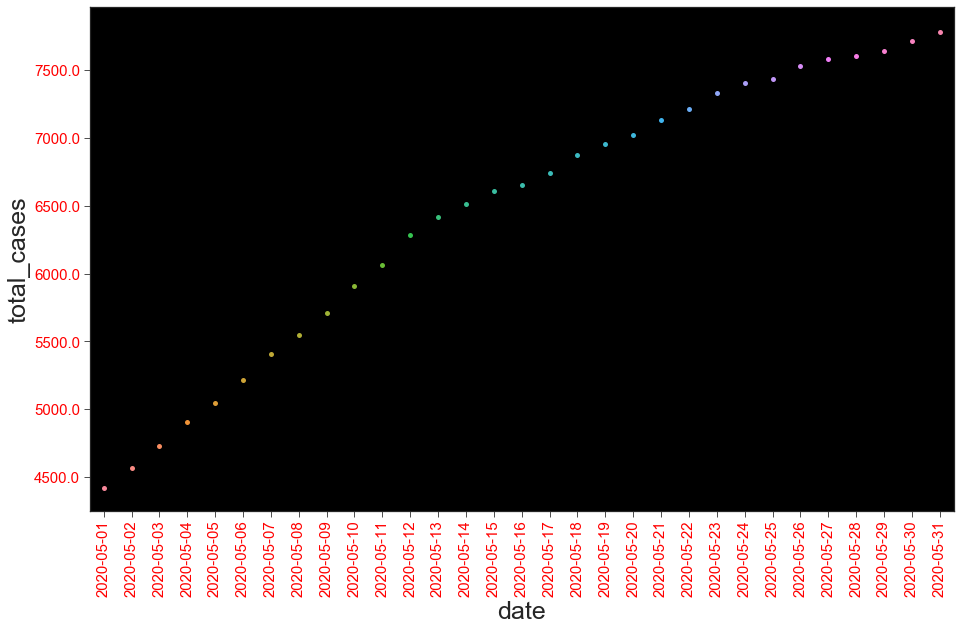

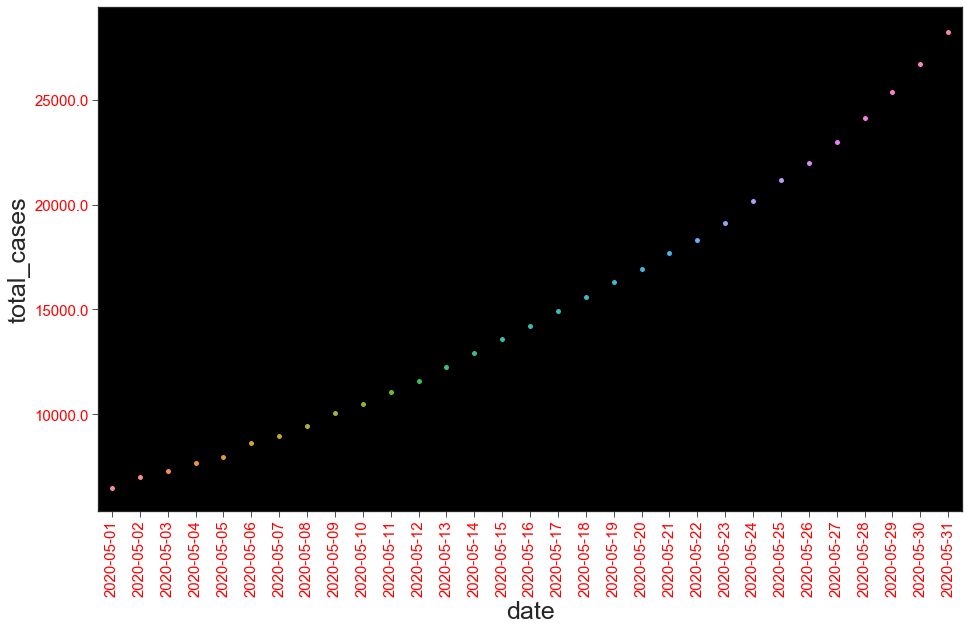

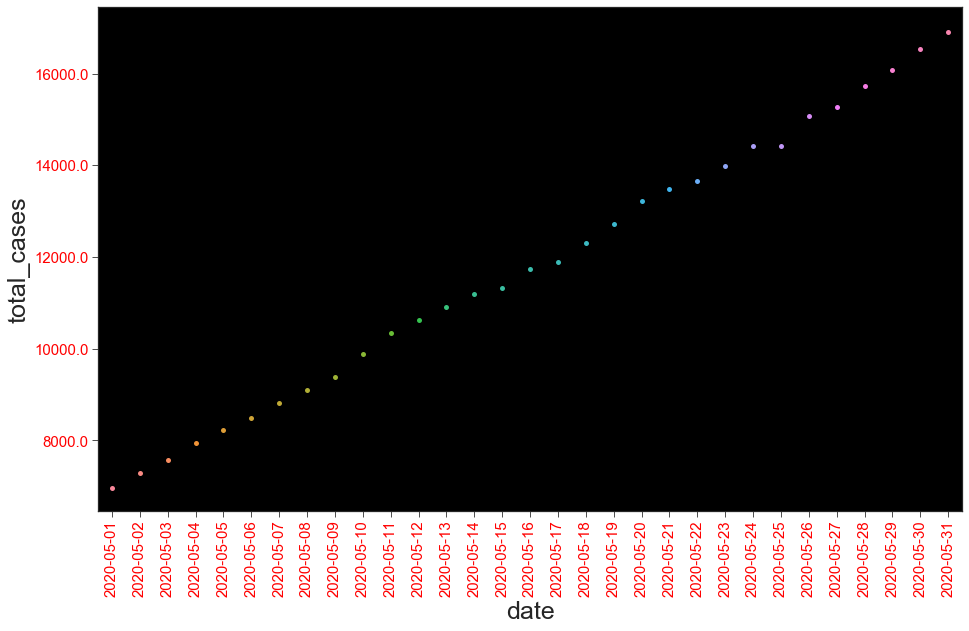

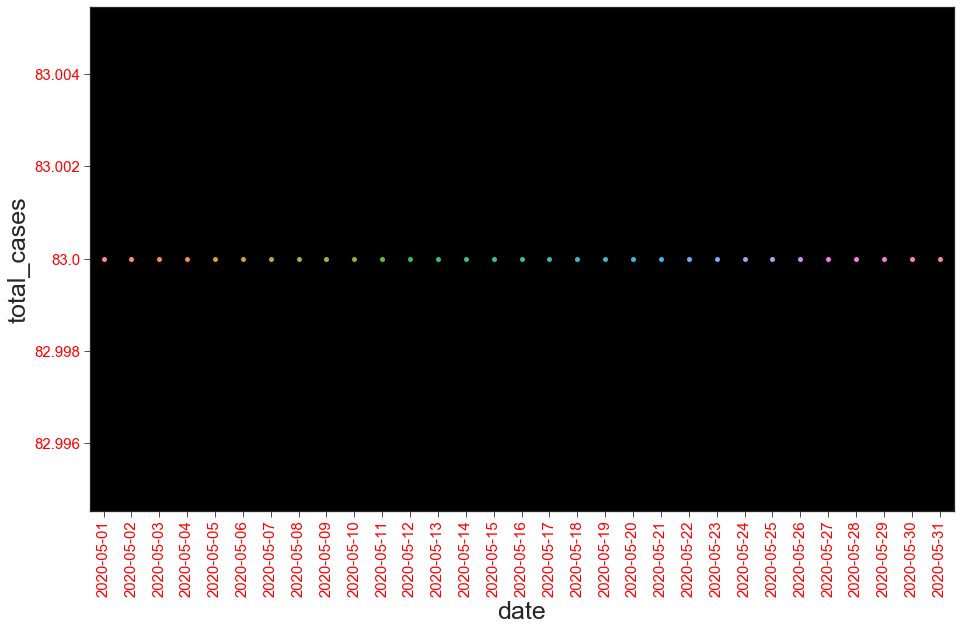

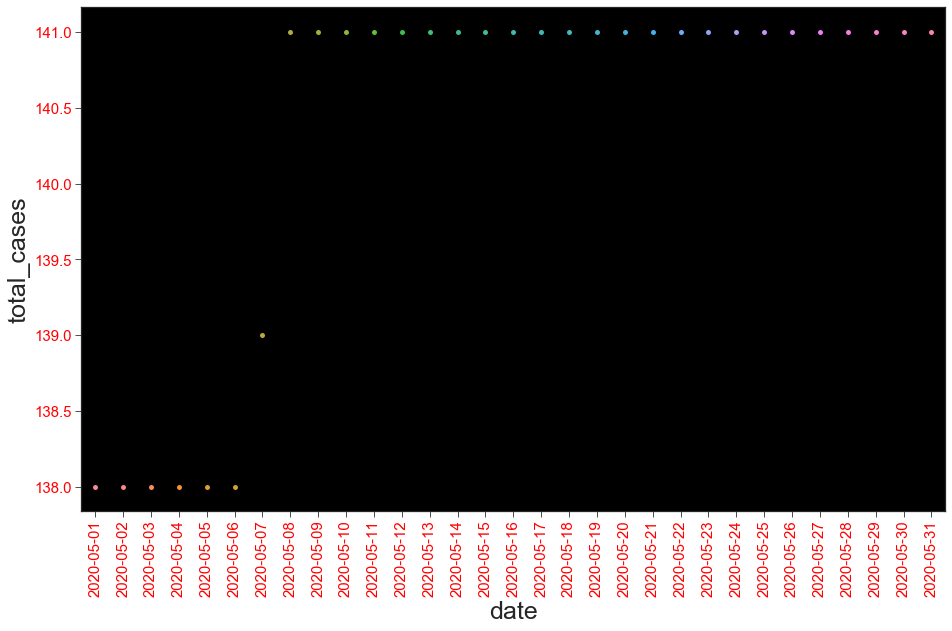

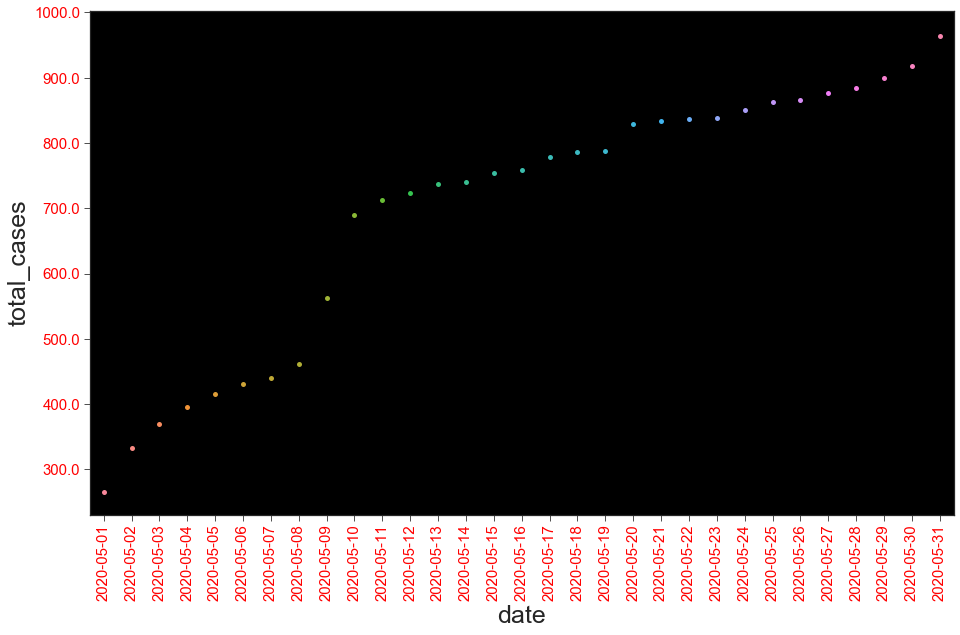

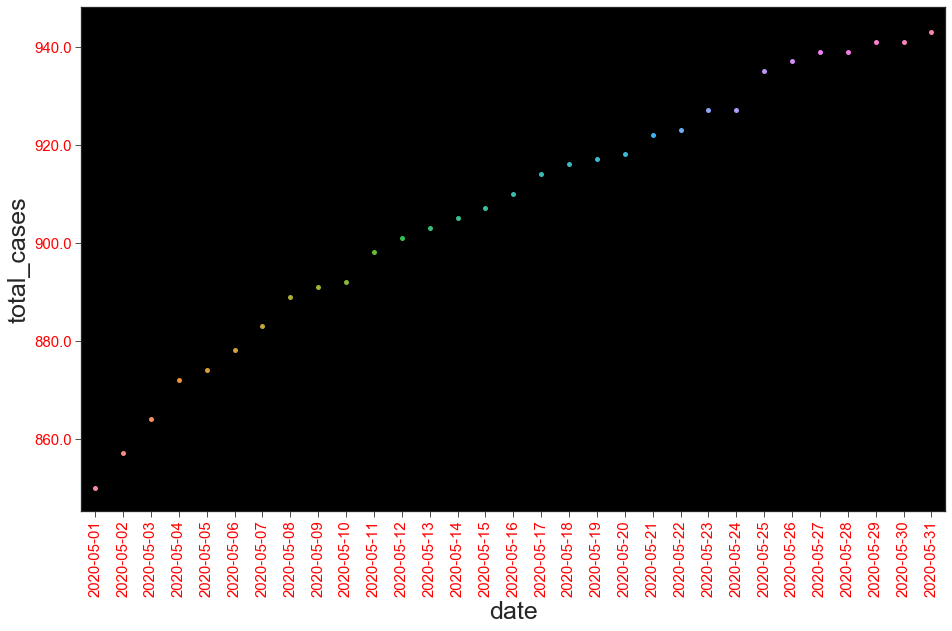

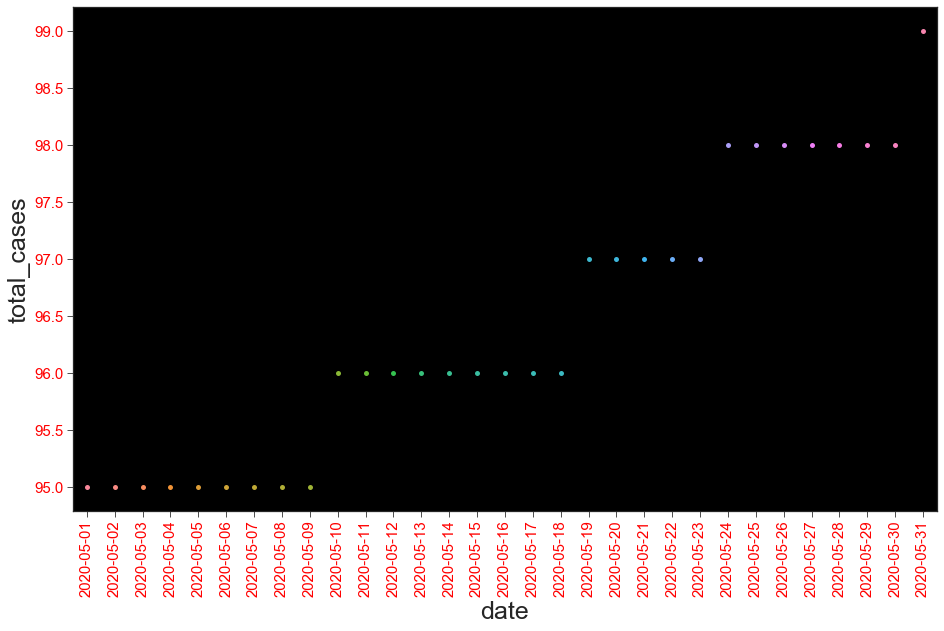

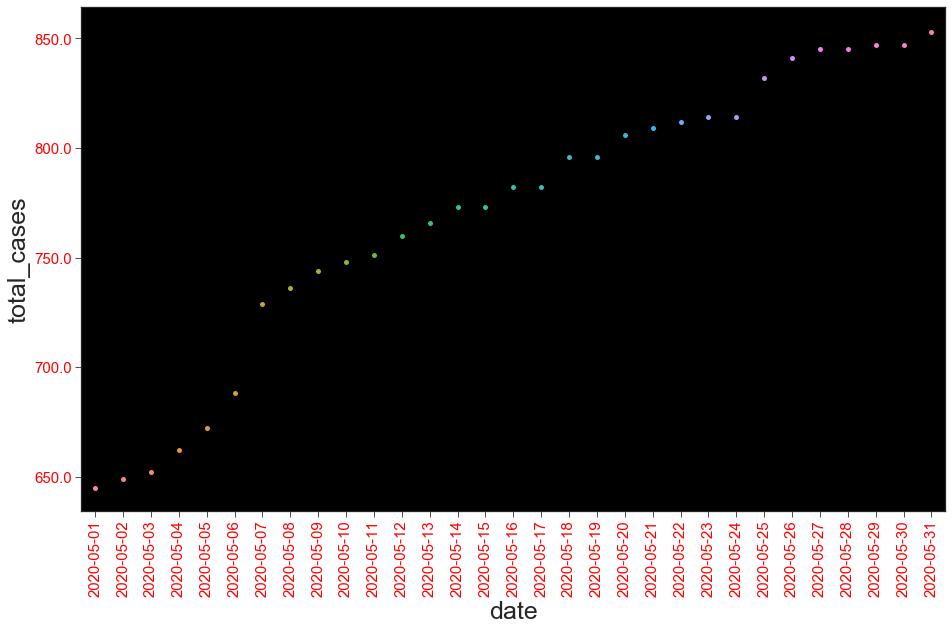

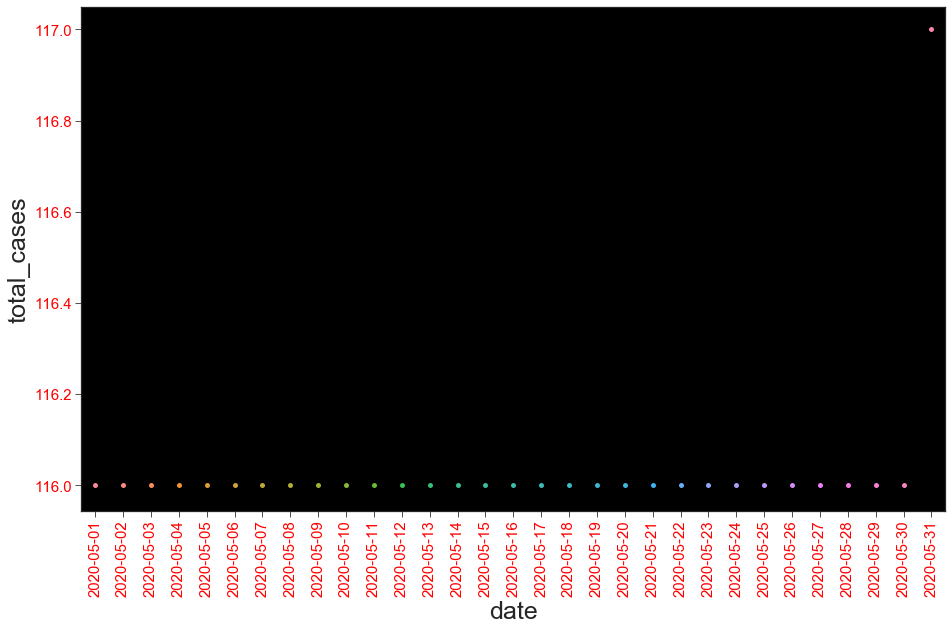

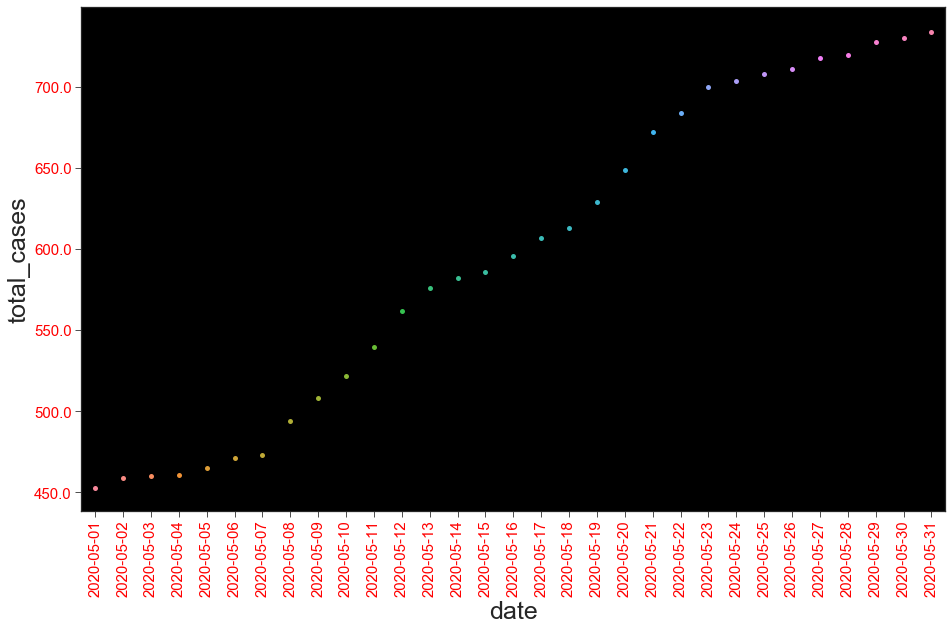

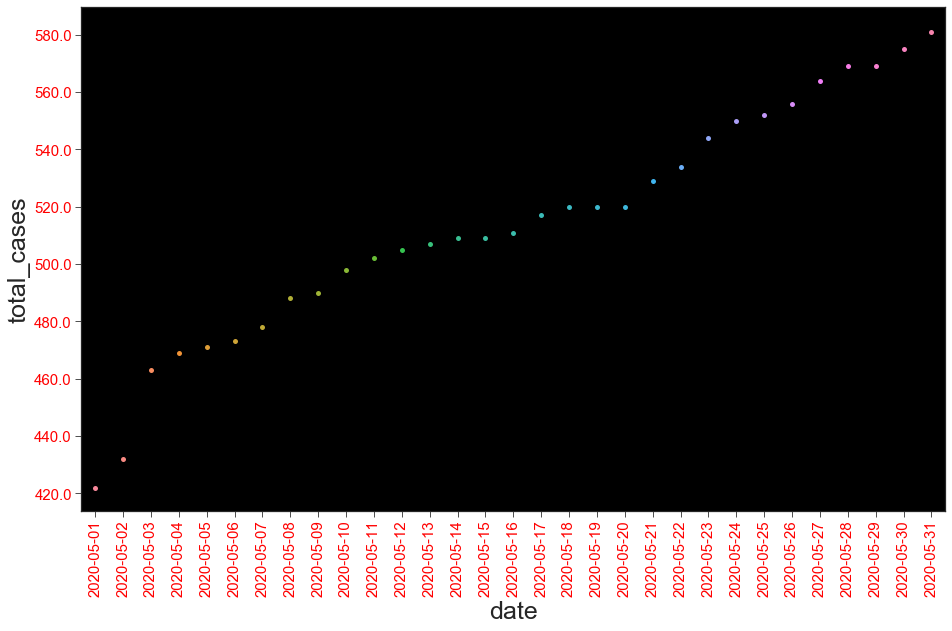

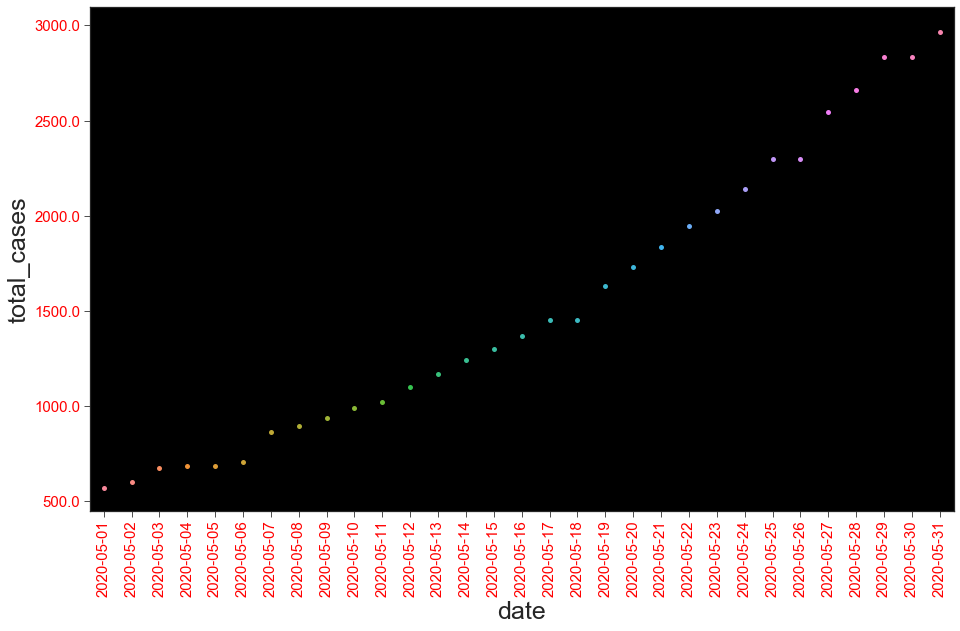

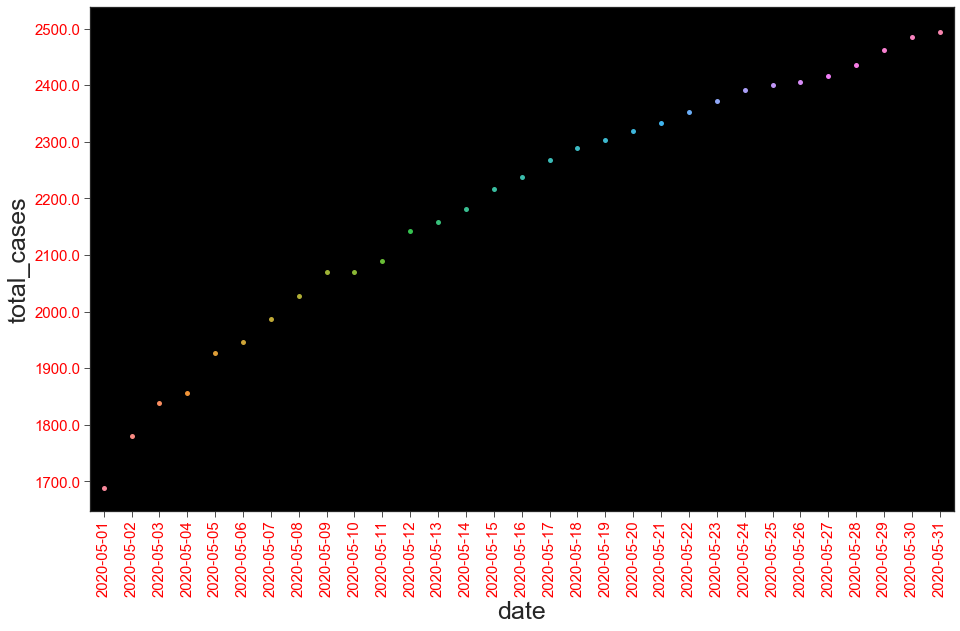

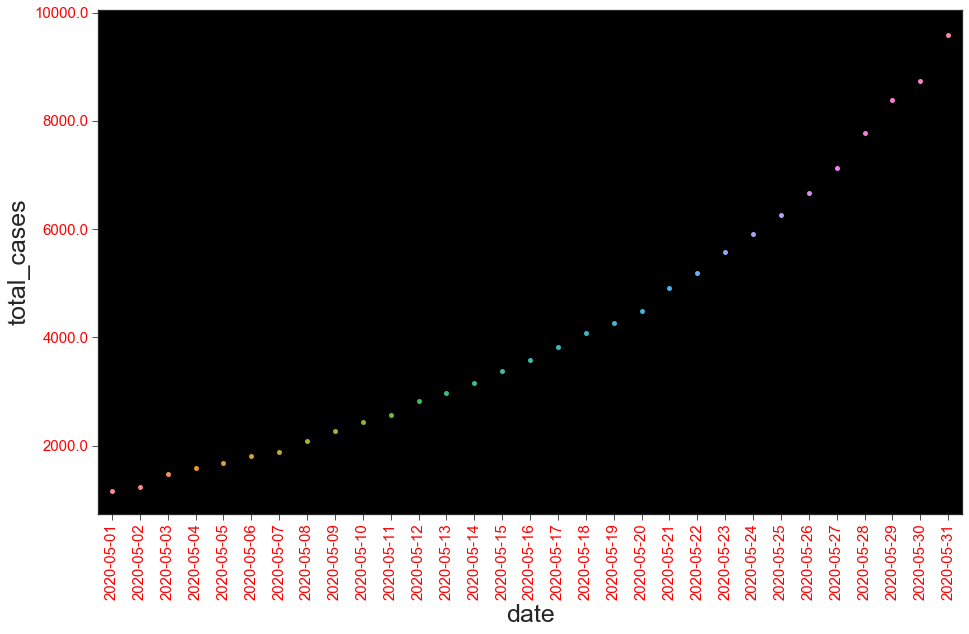

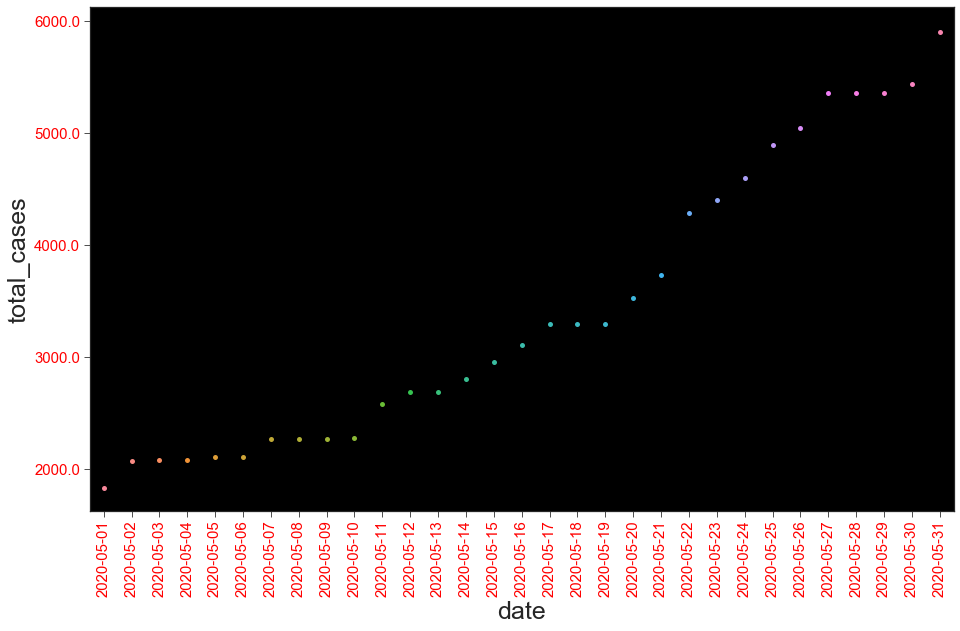

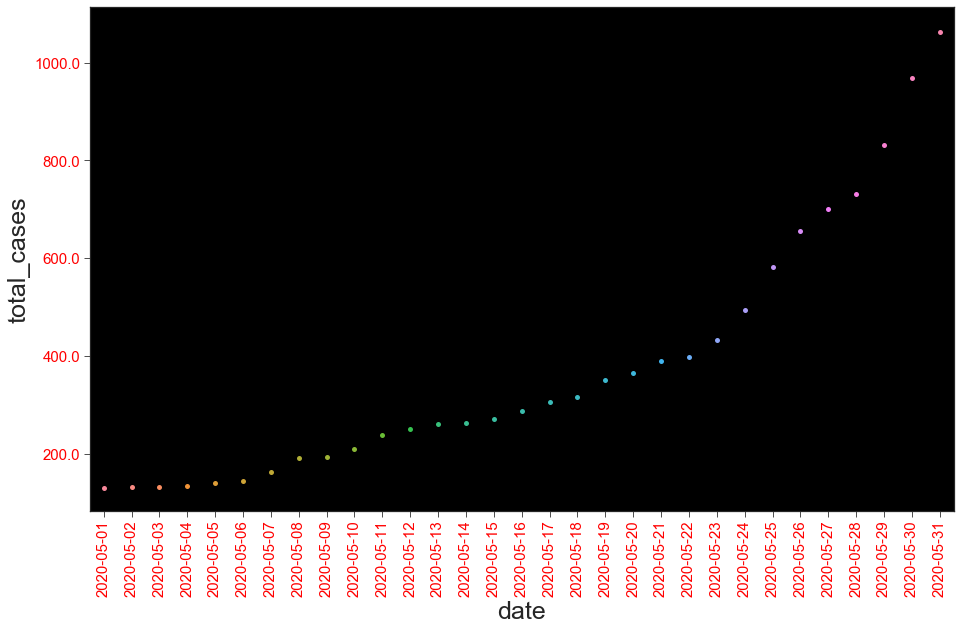

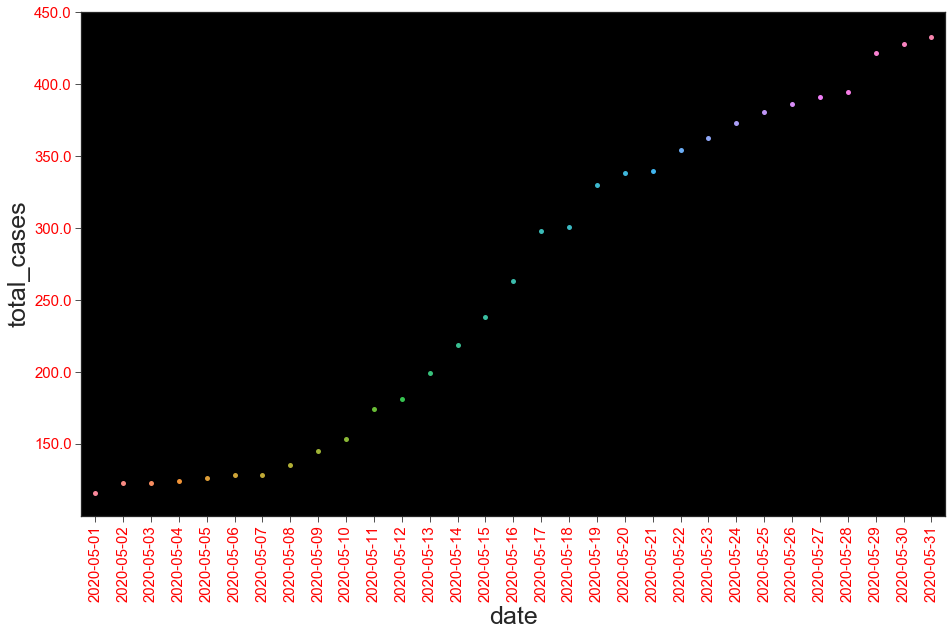

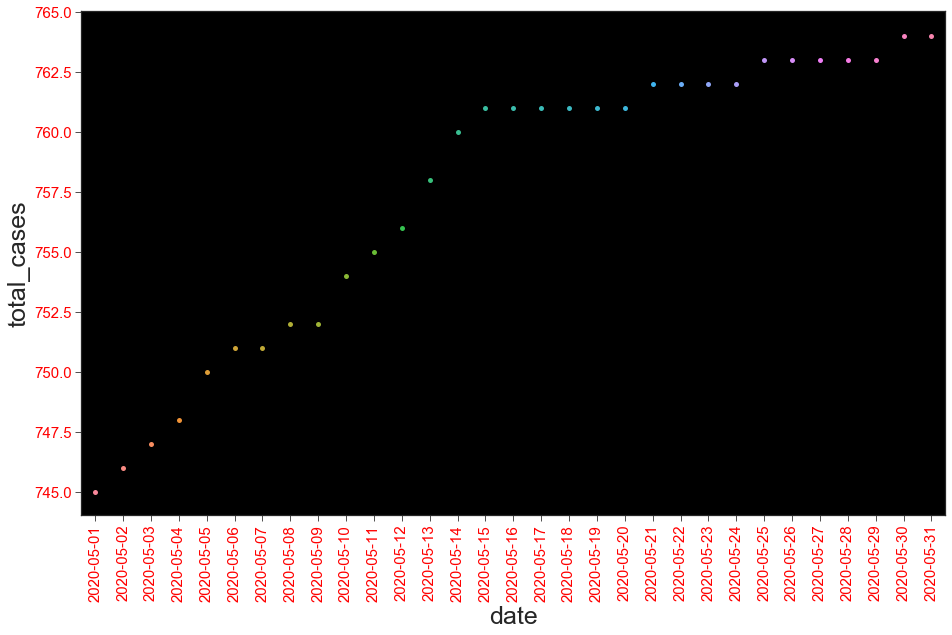

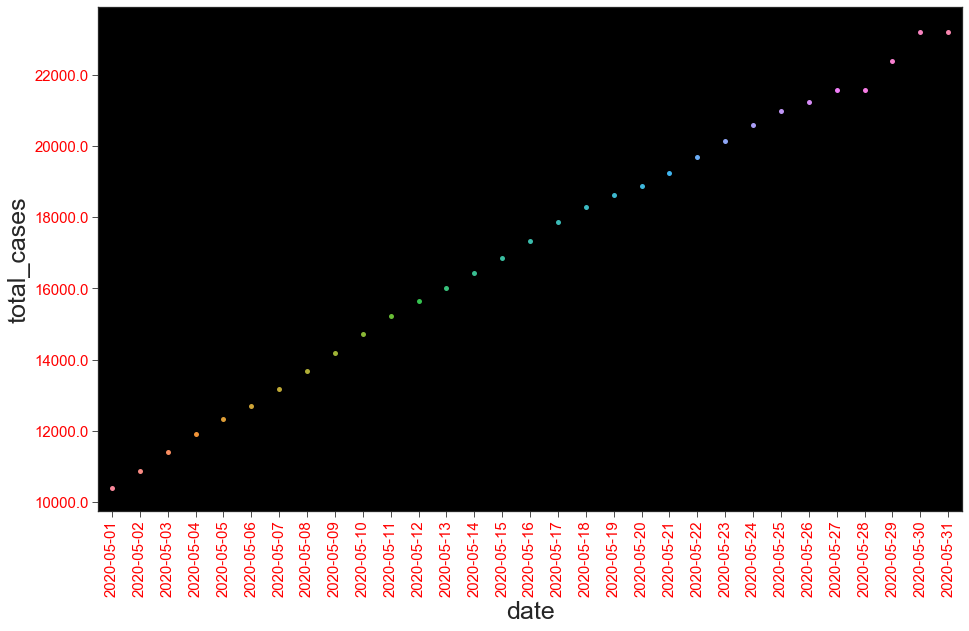

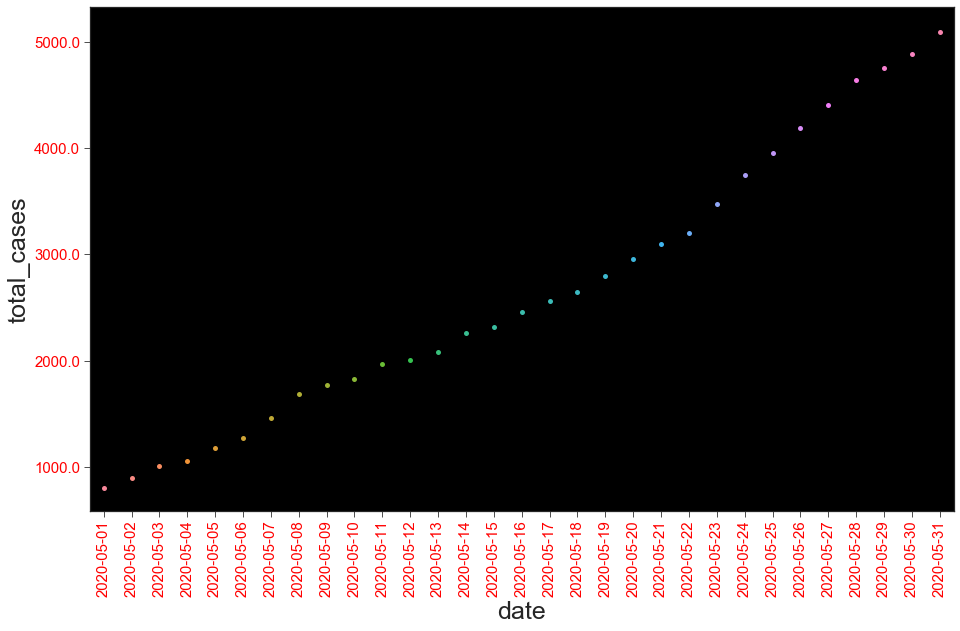

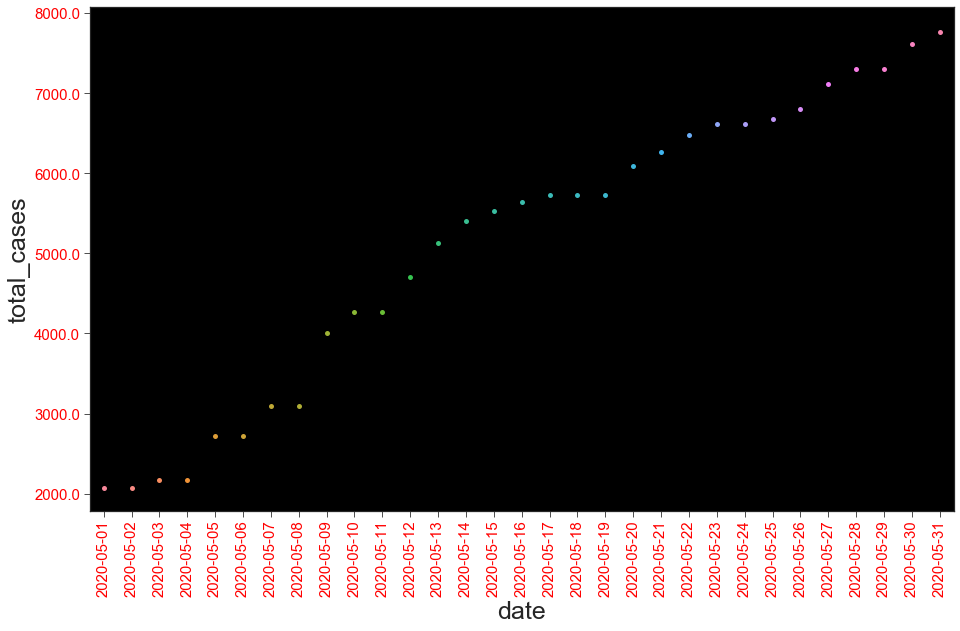

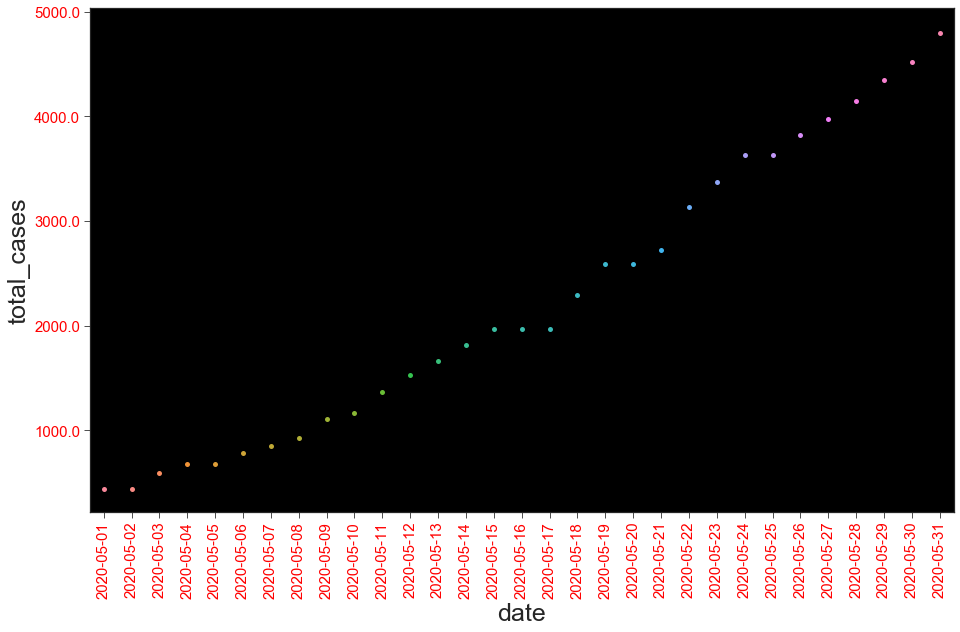

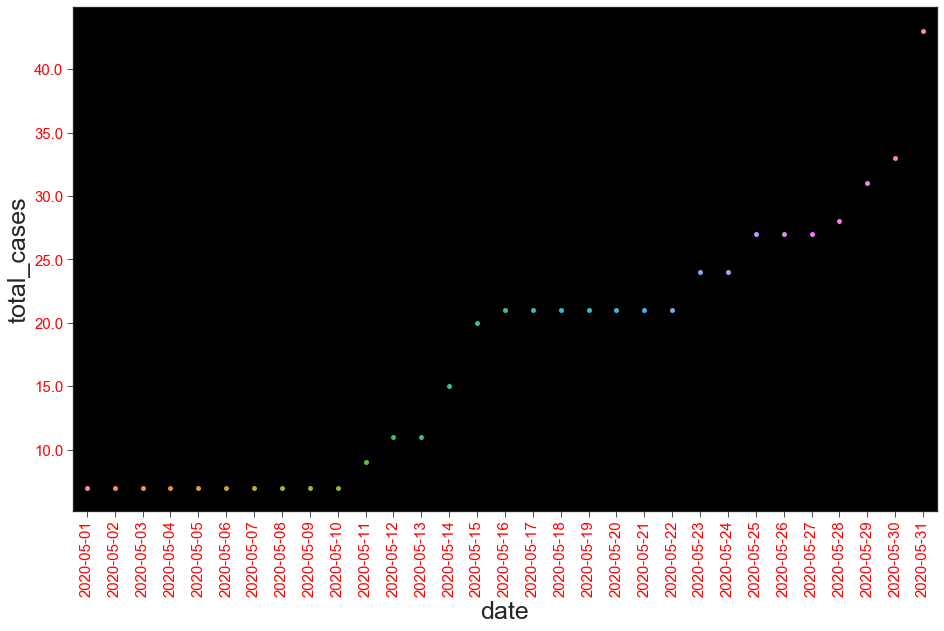

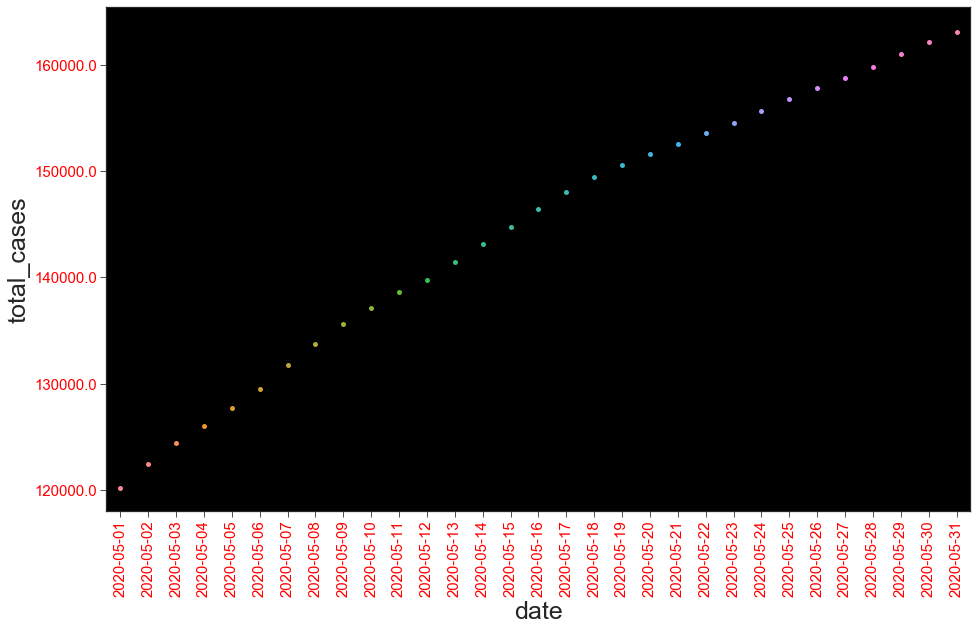

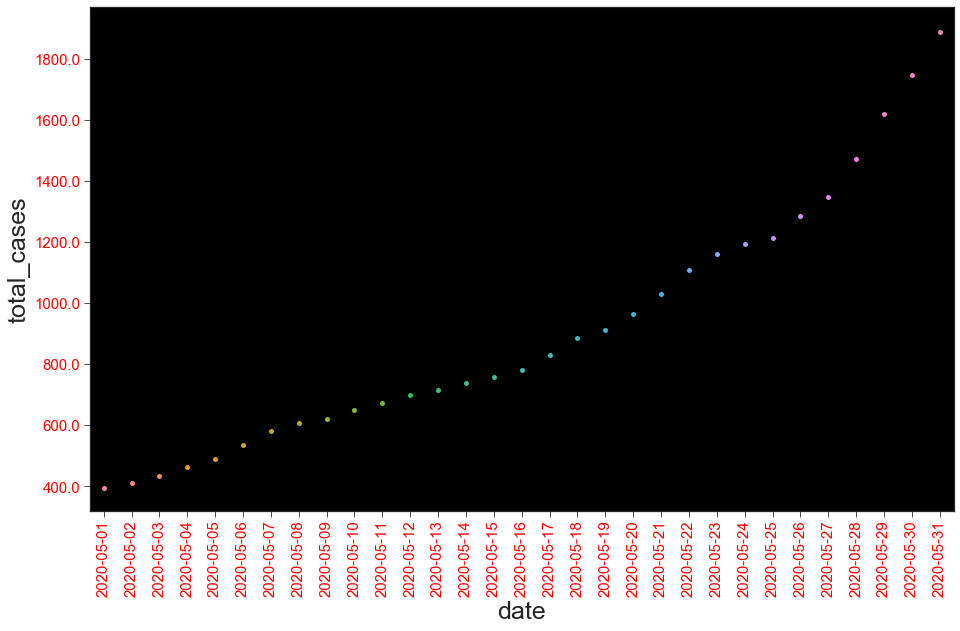

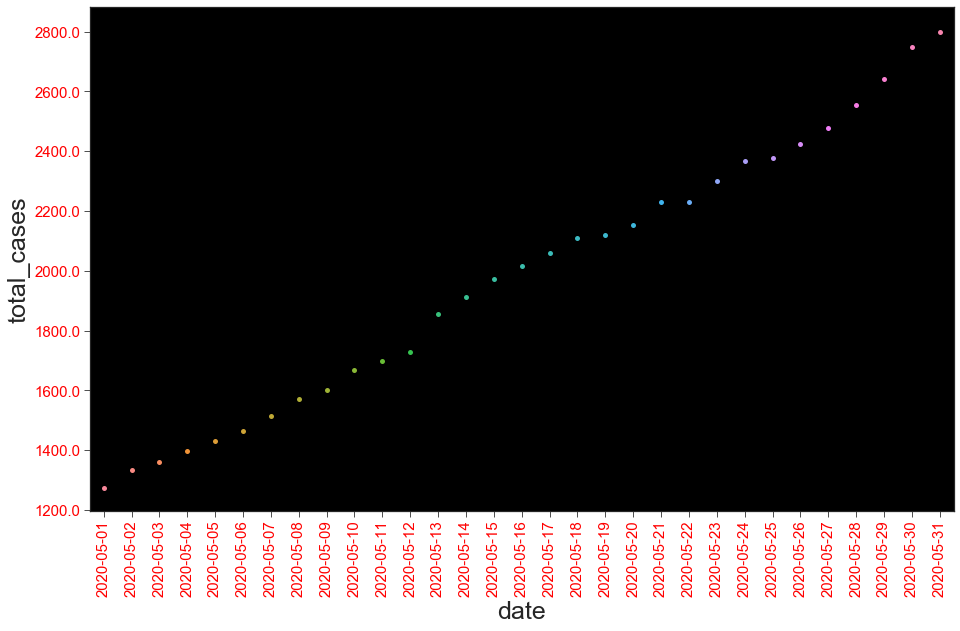

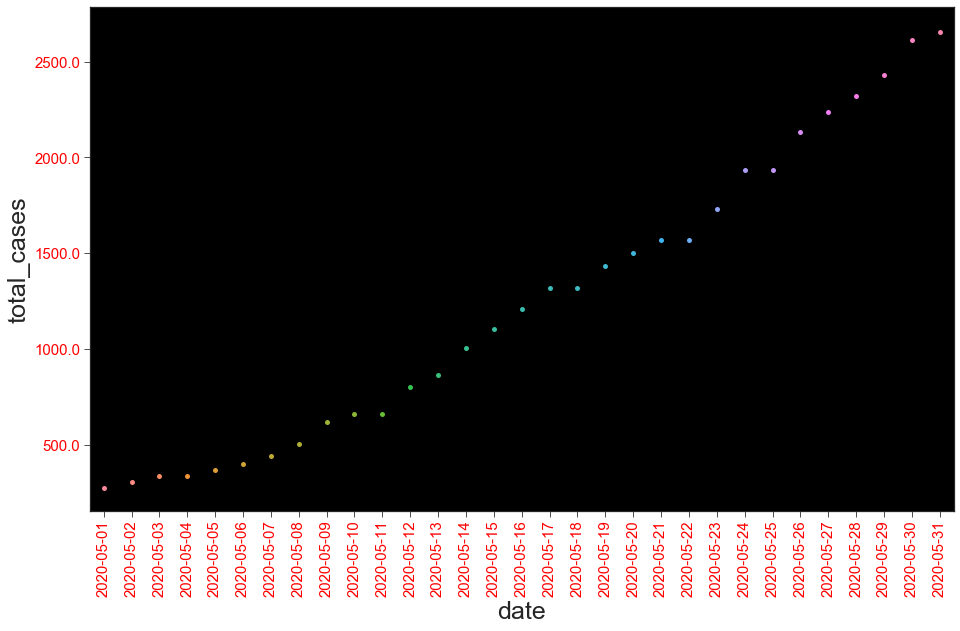

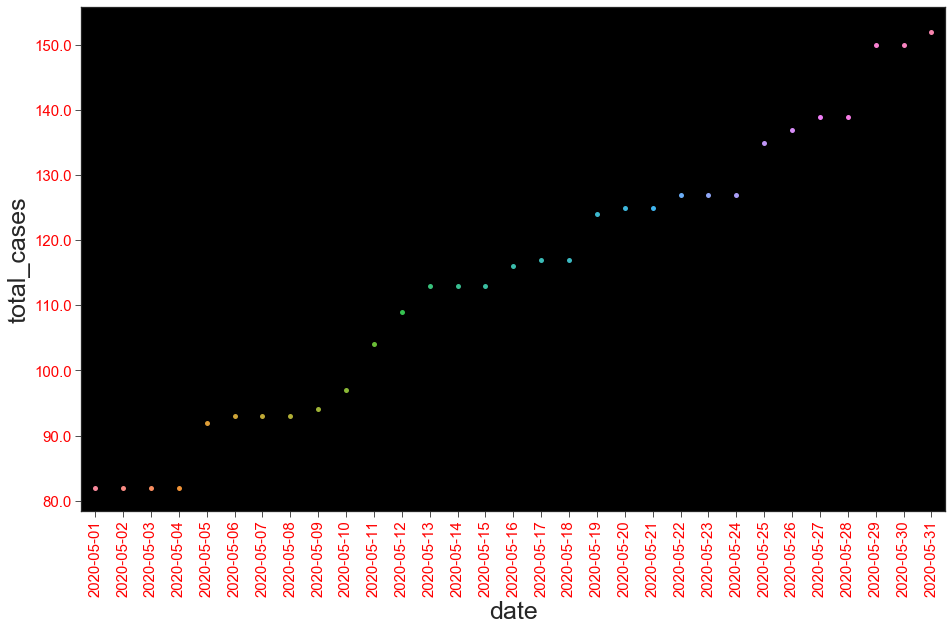

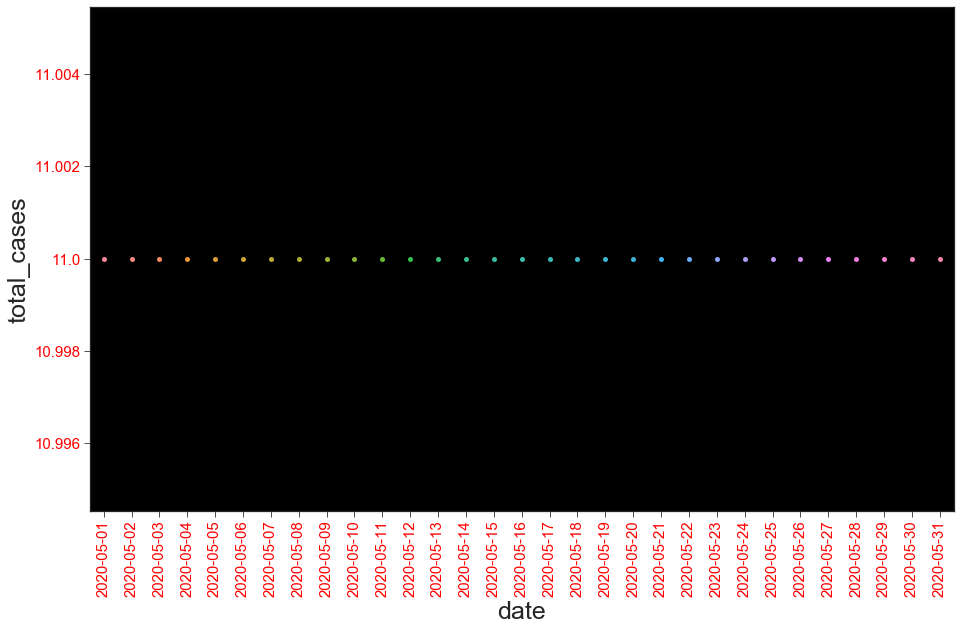

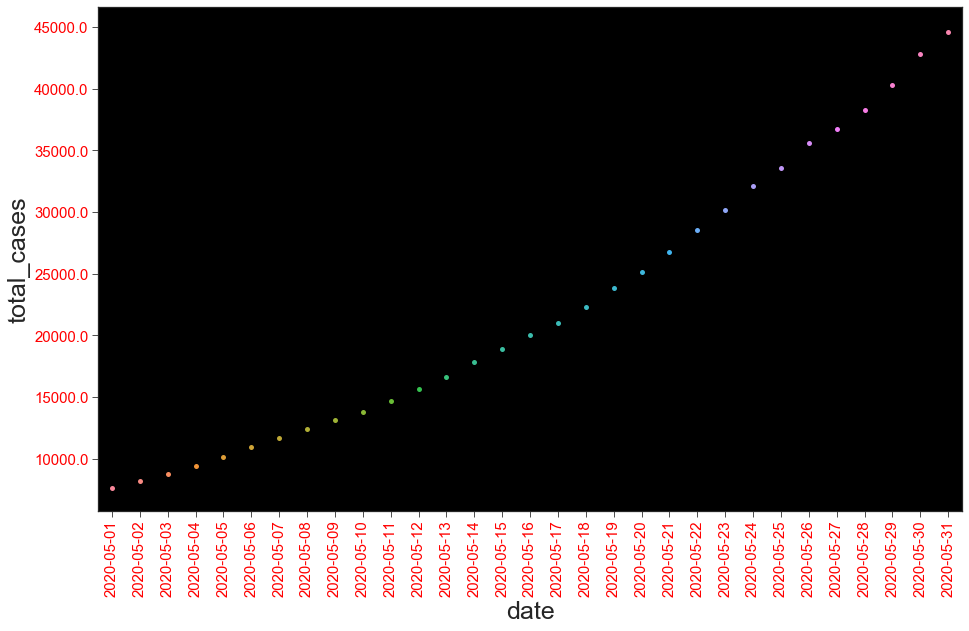

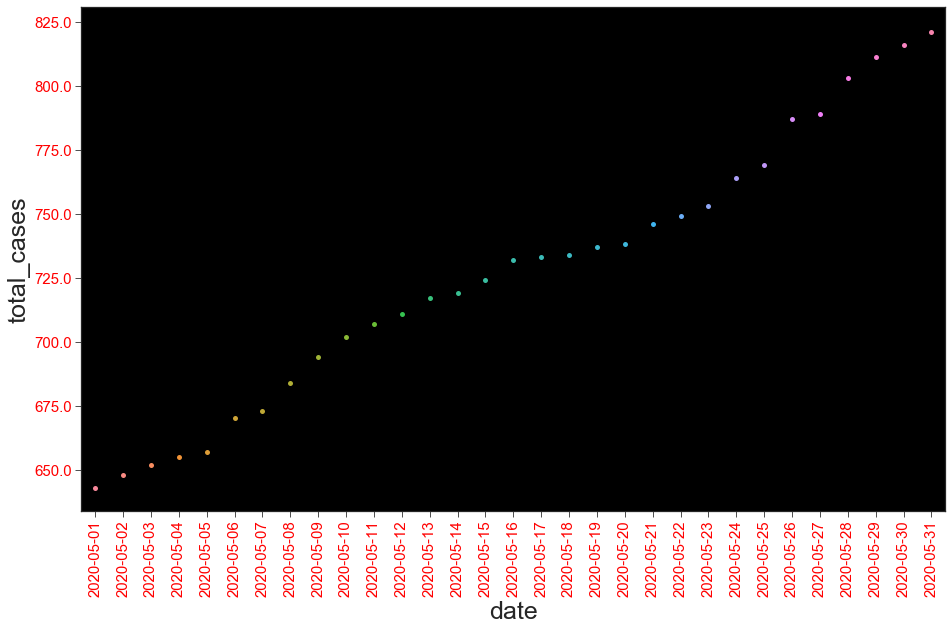

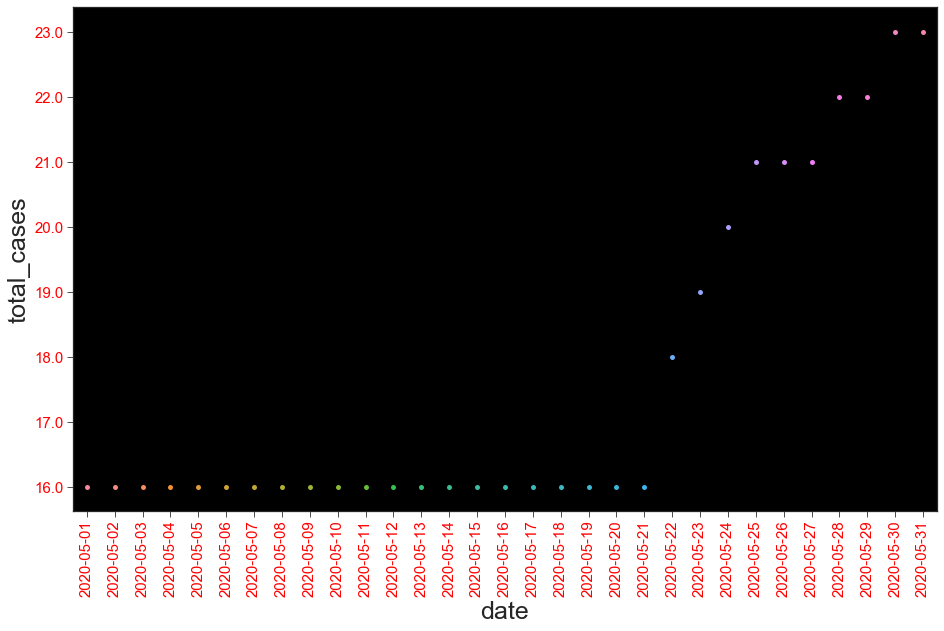

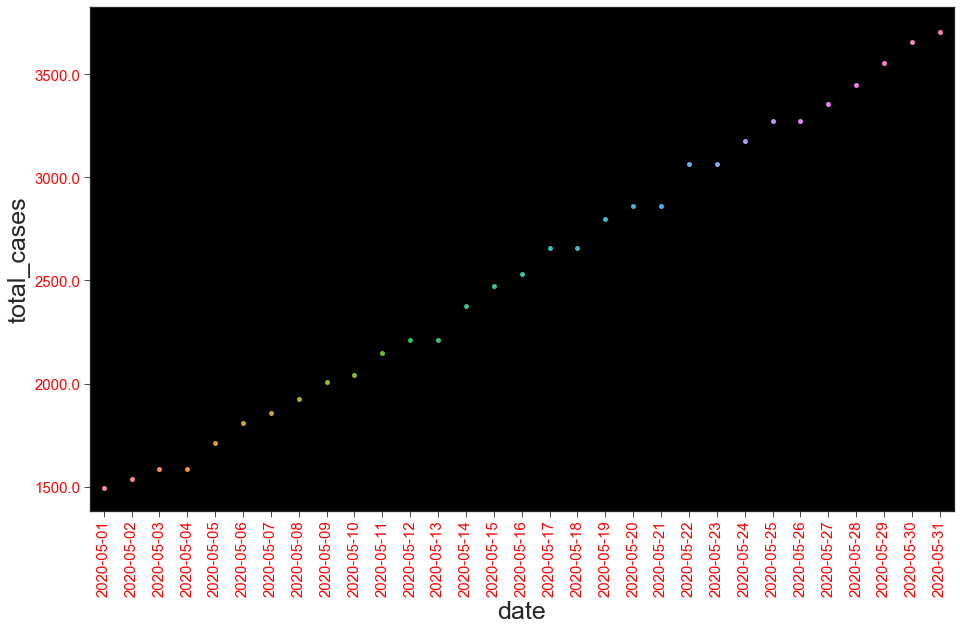

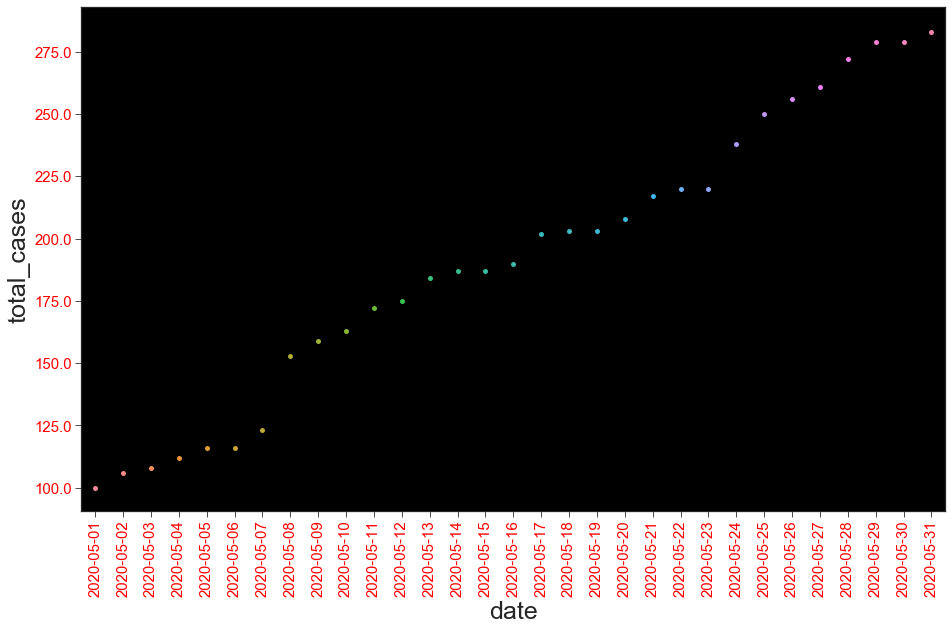

KeyboardInterrupt: 

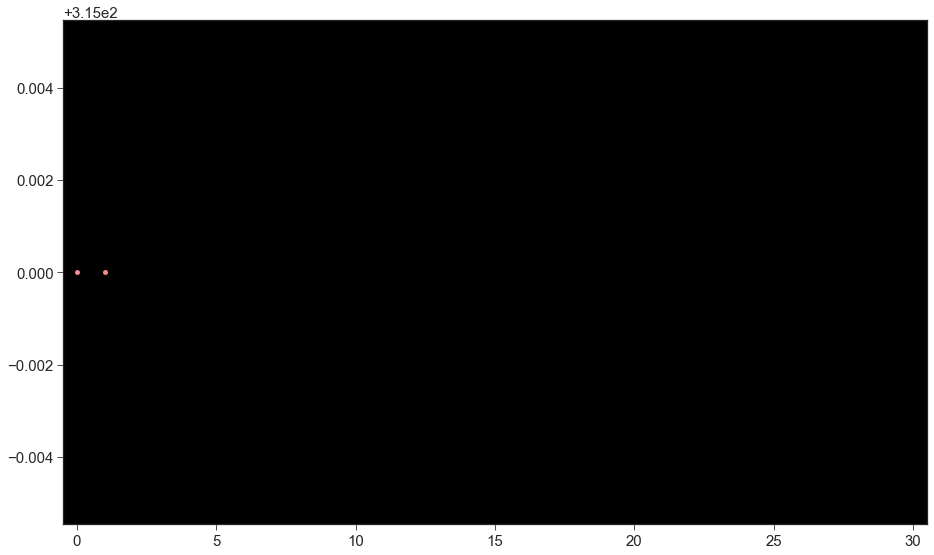

In [112]:
for i in data["location"].value_counts().index:
    new = data[(data["location"] == i)]
    n = new[new['date'].apply(lambda x : True if x.split("-")[1] == "05" else False)]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1],facecolor="black")
    sns.swarmplot(n['date'],n['total_cases'])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,color="red")
    ax.set_yticklabels(ax.get_yticks(),color="red")
    plt.show()

In [113]:
data['location'].value_counts()

China             161
World             161
Japan             146
Thailand          141
South Korea       141
                 ... 
Western Sahara     44
Tajikistan         39
Comoros            38
International      28
Lesotho            25
Name: location, Length: 211, dtype: int64

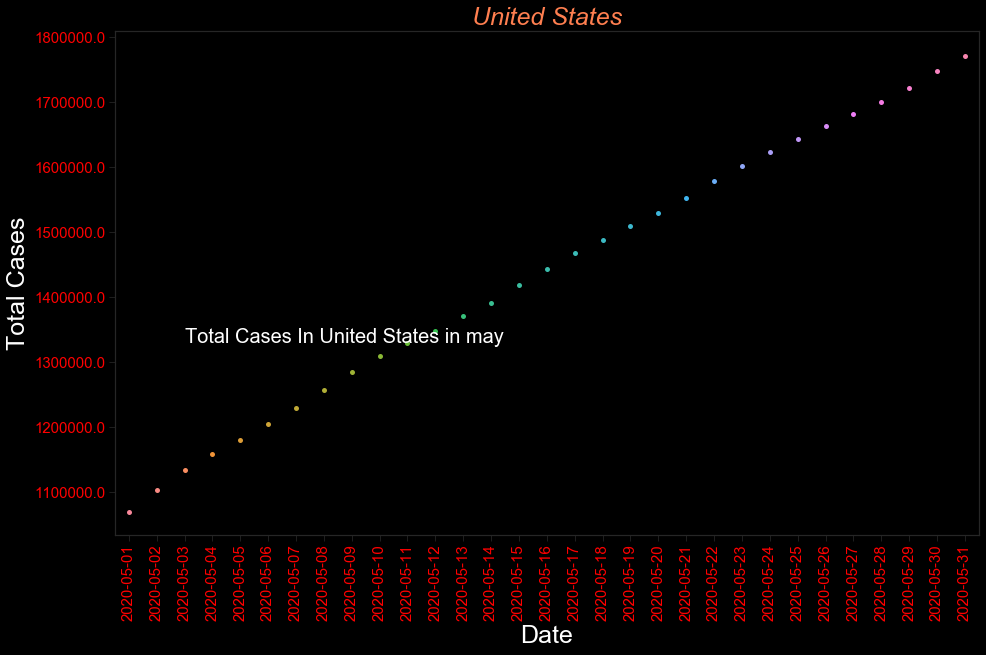

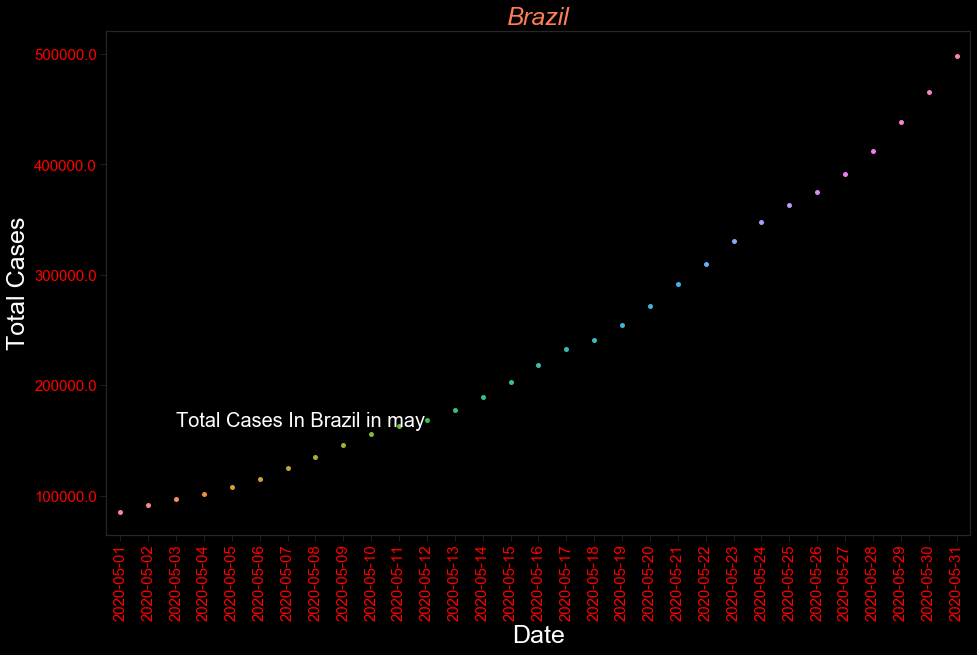

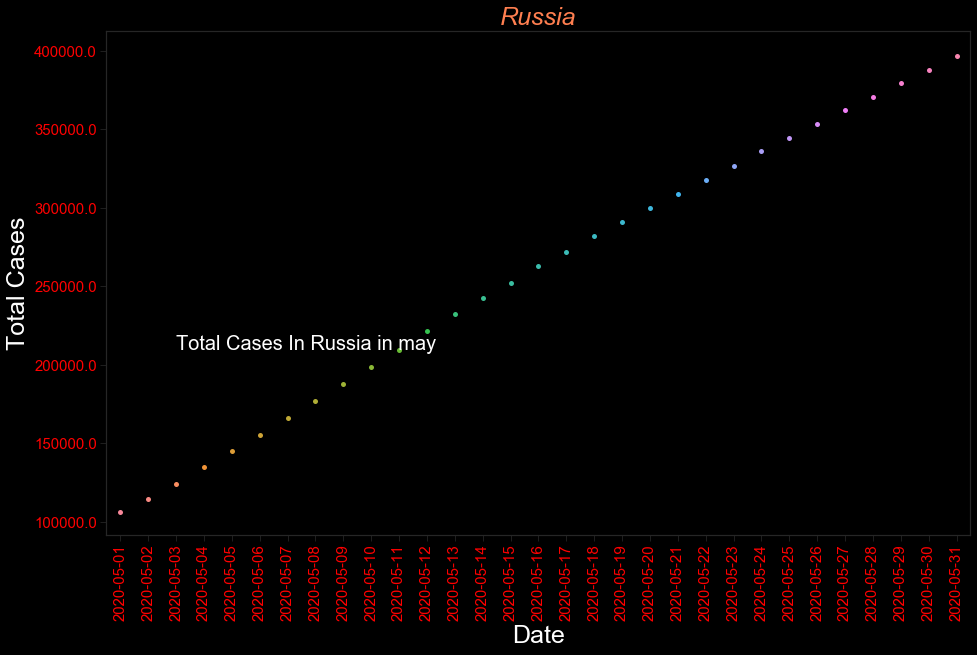

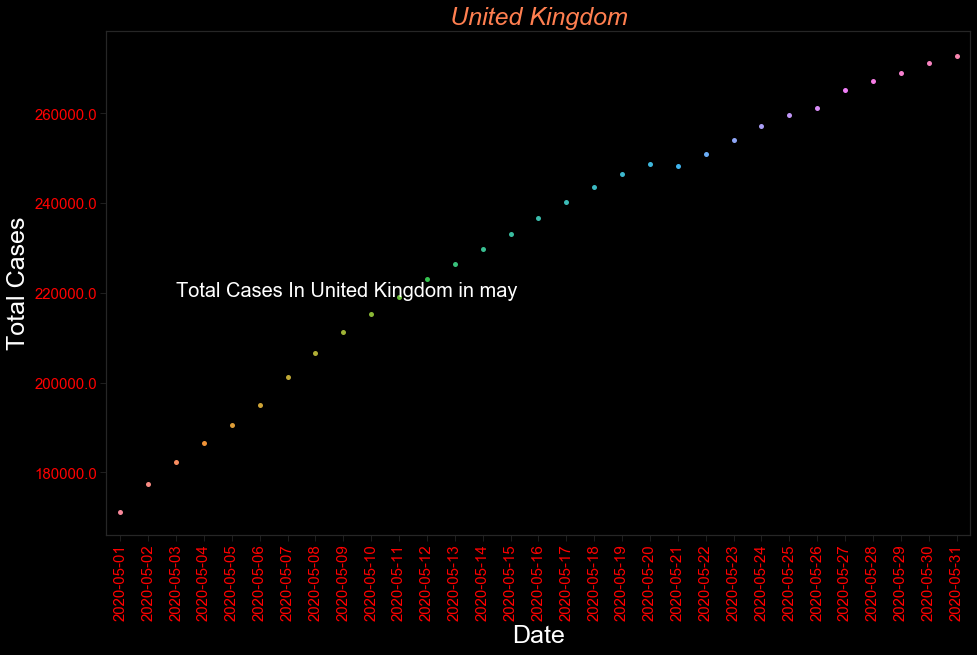

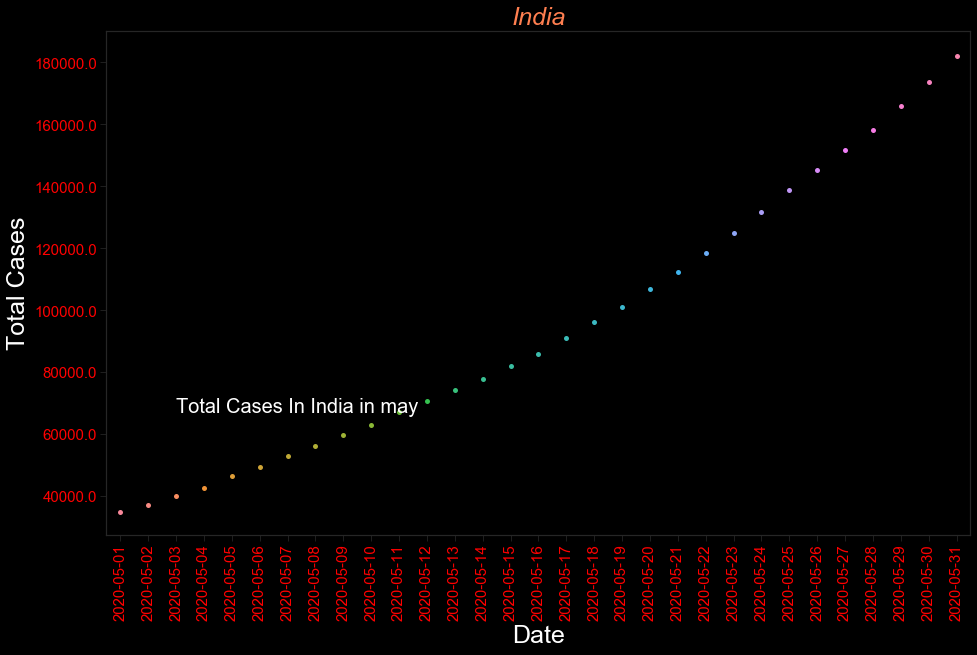

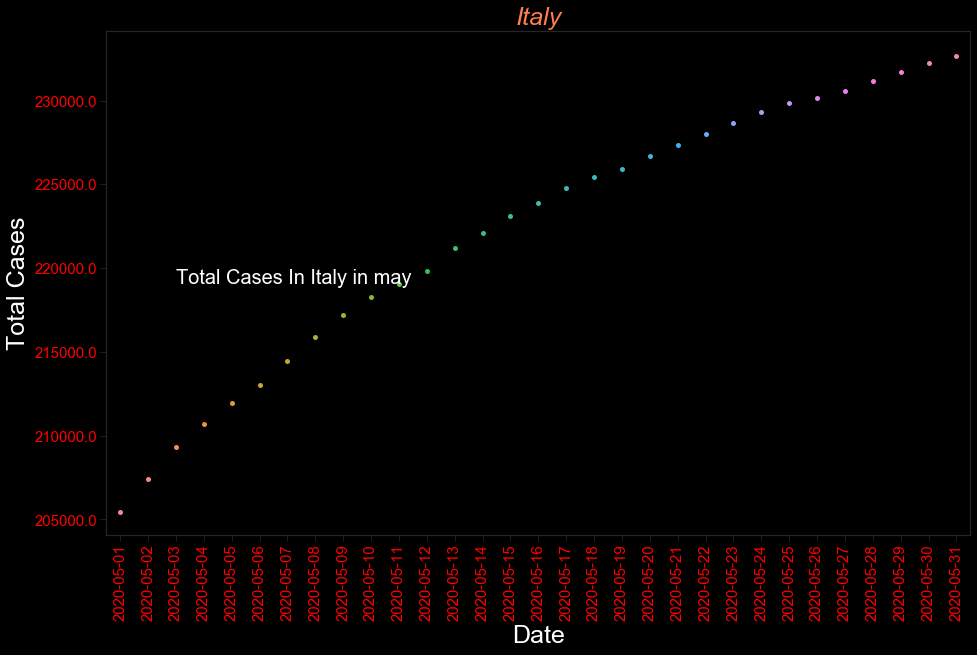

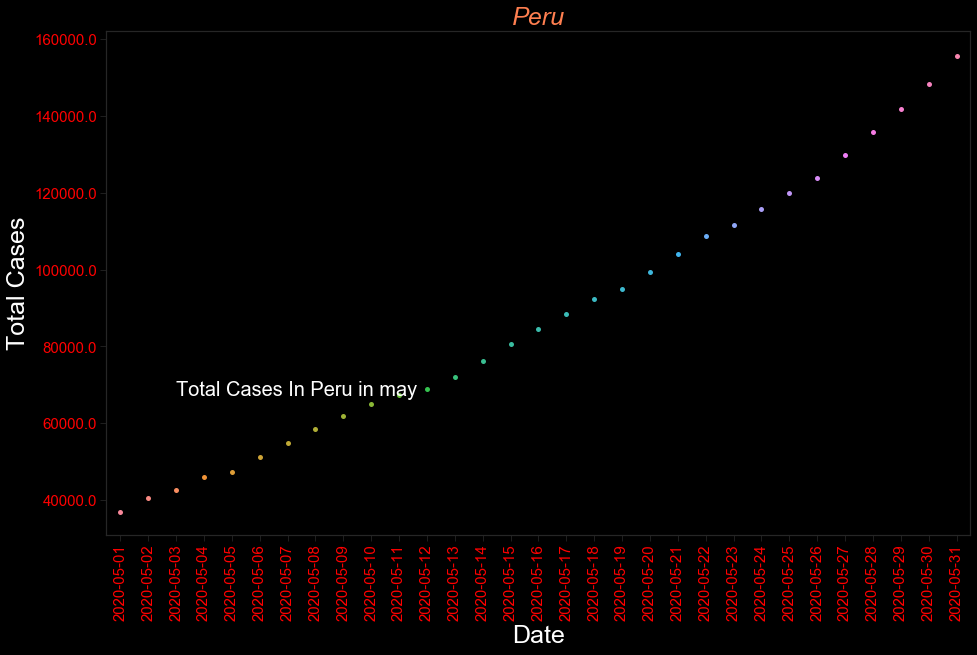

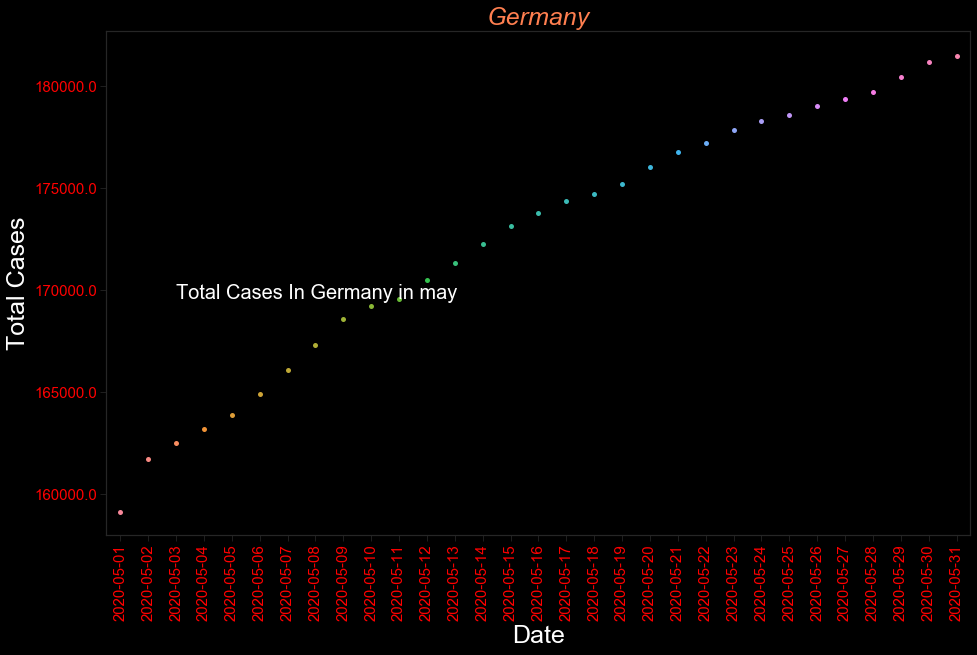

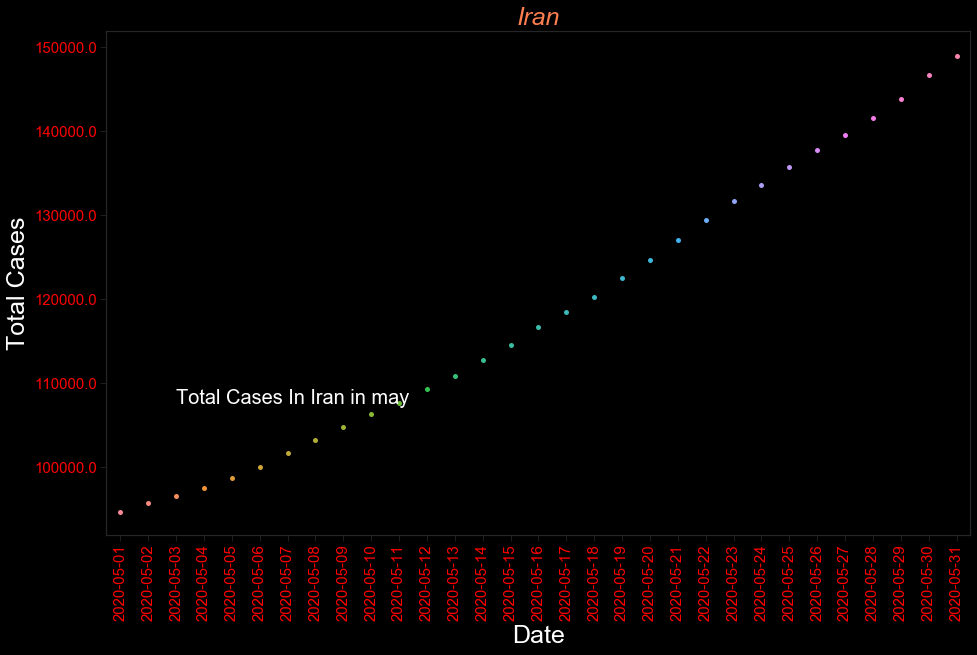

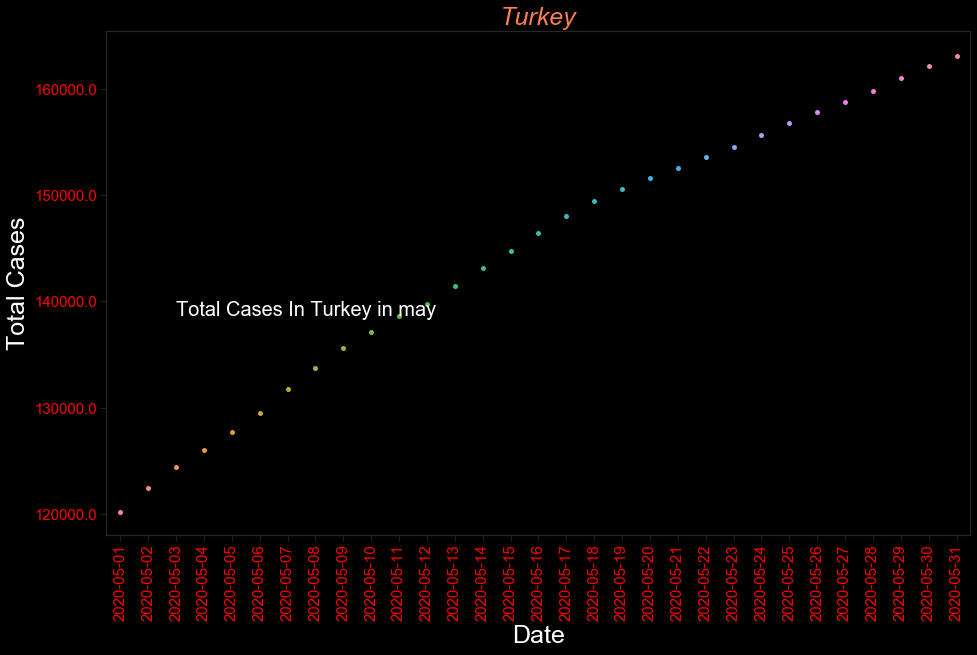

In [134]:
countries= data[data['date']=='2020-06-08'].sort_values(by='total_cases',ascending=False)[['location','total_cases']][1:11]['location']
for i in countries:
    new = data[(data["location"] == i)]
    n = new[new['date'].apply(lambda x : True if x.split("-")[1] == "05" else False)]
    fig = plt.figure(facecolor="black")
    ax = fig.add_axes([0,0,1,1],facecolor="black")
    sns.swarmplot(n['date'],n['total_cases'])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,color="red")
    ax.set_yticklabels(ax.get_yticks(),color="red")
    ax.set_title(i,color="coral",fontdict={"fontsize":25,"fontstyle":"italic"})
    ax.text(2,n.iloc[10,4],f"Total Cases In {i} in may",color="white",fontsize=20)
    ax.set_xlabel("Date",color="white")
    ax.set_ylabel("Total Cases",color="white")
    plt.show()

In [115]:
countries

21331     United States
3048             Brazil
16974            Russia
21170    United Kingdom
9455              India
10551             Italy
16074              Peru
7890            Germany
9834               Iran
20612            Turkey
Name: location, dtype: object

In [131]:
n.iloc[2,4]

124375

In [130]:
n

date location  new_cases  new_deaths  total_cases  total_deaths
20574  2020-05-01   Turkey       2615          93       120204          3174
20575  2020-05-02   Turkey       2188          84       122392          3258
20576  2020-05-03   Turkey       1983          78       124375          3336
20577  2020-05-04   Turkey       1670          61       126045          3397
20578  2020-05-05   Turkey       1614          64       127659          3461
20579  2020-05-06   Turkey       1832          59       129491          3520
20580  2020-05-07   Turkey       2253          64       131744          3584
20581  2020-05-08   Turkey       1977          57       133721          3641
20582  2020-05-09   Turkey       1848          48       135569          3689
20583  2020-05-10   Turkey       1546          50       137115          3739
20584  2020-05-11   Turkey       1542          47       138657          3786
20585  2020-05-12   Turkey       1114          55       139771          3841
20586  2020-05-13   Turkey       1704          53       141475          3894
20587  2020-05-14   Turkey       1639          58       143114          3952
20588  2020-05-15   Turkey       1635          55       144749          4007
20589  2020-05-16   Turkey       1708          48       146457          4055
20590  2020-05-17   Turkey       1610          41       148067          4096
20591  2020-05-18   Turkey       1368          44       149435          4140
20592  2020-05-19   Turkey       1158          31       150593          4171
20593  2020-05-20   Turkey       1022          28       151615          4199
20594  2020-05-21   Turkey        972          23       152587          4222
20595  2020-05-22   Turkey        961          27       153548          4249
20596  2020-05-23   Turkey        952          27       154500          4276
20597  2020-05-24   Turkey       1186          32       155686          4308
20598  2020-05-25   Turkey       1141          32       156827          4340
20599  2020-05-26   Turkey        987          29       157814          4369
20600  2020-05-27   Turkey        948          28       158762          4397
20601  2020-05-28   Turkey       1035          34       159797          4431
20602  2020-05-29   Turkey       1182          30       160979          4461
20603  2020-05-30   Turkey       1141          28       162120          4489
20604  2020-05-31   Turkey        983          26       163103          4515

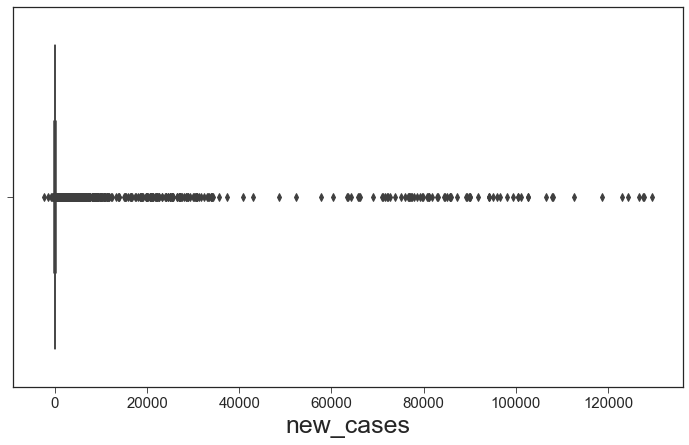

In [135]:
sns.boxplot(data['new_cases'])